In [2]:
import numpy as np, pandas as pd, pandas_read_xml as pdx
import xml.etree.ElementTree as et 



ModuleNotFoundError: No module named 'pandas_read_xml'

In [15]:
def parse_XML(xml_file, df_cols): 
    
    xtree = et.parse(xml_file)
    xroot = xtree.getroot()
    rows = []
    
    for node in xroot: 
        res = []
        res.append(node.attrib.get(df_cols[0]))
        for el in df_cols[1:]: 
            if node is not None and node.find(el) is not None:
                res.append(node.find(el).text)
            else: 
                res.append(None)
        rows.append({df_cols[i]: res[i] 
                     for i, _ in enumerate(df_cols)})
    
    out_df = pd.DataFrame(rows, columns=df_cols)
        
    return out_df

In [20]:
AndroidBadges = pd.read_csv("AndroidBadges.csv")
AndroidComments = pd.read_csv("AndroidComments.csv")
AndroidPostHistory = pd.read_csv("AndroidPostHistory.csv")
AndroidPostLinks = pd.read_csv("AndroidPostLinks.csv")
AndroidPosts = pd.read_csv("AndroidPosts.csv")
AndroidUsers = pd.read_csv("AndroidUsers.csv")
AndroidVotes = pd.read_csv("AndroidVotes.csv")

AppleBadges = pd.read_csv("AppleBadges.csv")
AppleComments = pd.read_csv("AppleComments.csv")
ApplePostHistory = pd.read_csv("ApplePostHistory.csv")
ApplePostLinks = pd.read_csv("ApplePostLinks.csv")
ApplePosts = pd.read_csv("ApplePosts.csv")
AppleUsers = pd.read_csv("AppleUsers.csv")
AppleVotes = pd.read_csv("AppleVotes.csv")

WindowsPhoneBadges = pd.read_csv("WindowsPhoneBadges.csv")
WindowsPhoneComments = pd.read_csv("WindowsPhoneComments.csv")
WindowsPhonePostHistory = pd.read_csv("WindowsPhonePostHistory.csv")
WindowsPhonePostLinks = pd.read_csv("WindowsPhonePostLinks.csv")
WindowsPhonePosts = pd.read_csv("WindowsPhonePosts.csv")
WindowsPhoneUsers = pd.read_csv("WindowsPhoneUsers.csv")
WindowsPhoneVotes = pd.read_csv("WindowsPhoneVotes.csv")

AndroidPyt1 = pd.read_csv("AndroidPyt1.csv")
AndroidPyt2 = pd.read_csv("AndroidPyt2.csv")
AndroidPyt3 = pd.read_csv("AndroidPyt3.csv")
AndroidPyt4 = pd.read_csv("AndroidPyt4Model.csv")

ApplePyt1 = pd.read_csv("ApplePyt1.csv")
ApplePyt2 = pd.read_csv("ApplePyt2.csv")
ApplePyt3 = pd.read_csv("ApplePyt3.csv")
ApplePyt4 = pd.read_csv("ApplePyt4Model.csv")

WindowsPhonePyt1 = pd.read_csv("WindowsPhonePyt1.csv")
WindowsPhonePyt2 = pd.read_csv("WindowsPhonePyt2.csv")
WindowsPhonePyt3 = pd.read_csv("WindowsPhonePyt3.csv")
WindowsPhonePyt4 = pd.read_csv("WindowsPhonePyt4Model.csv")

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import seaborn as sns
import glob
from pathlib import Path
import re
from skimage import color, exposure
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [3]:
WindowsPhonePyt4 = pd.read_csv("WindowsPhonePyt4Model.csv")
ApplePyt4 = pd.read_csv("ApplePyt4Model.csv")
AndroidPyt4 = pd.read_csv("AndroidPyt4Model.csv")

In [4]:
def check_if_na_present(df):
    print(df.shape)
    tab = []
    for it in df.index:
        tab.append(df.loc[it].isna().sum().sum())
    np.unique(np.array(tab),return_counts = True)
    plt.hist(tab, bins=100)

(16660, 5)


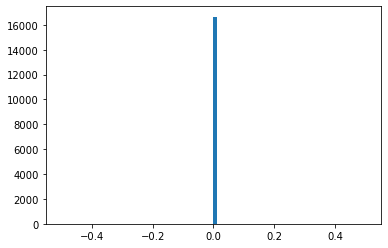

In [5]:
check_if_na_present(WindowsPhonePyt4)

(315088, 5)


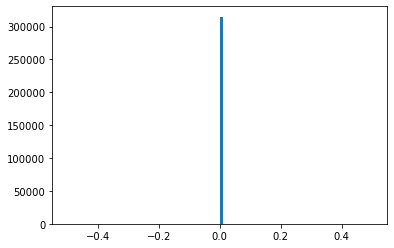

In [6]:
check_if_na_present(ApplePyt4)


(240379, 5)


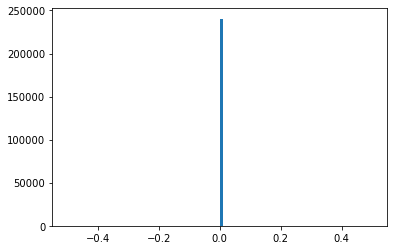

In [7]:
check_if_na_present(AndroidPyt4)

In [8]:
AndroidPyt4["UpVotes"].dtypes

dtype('int64')

In [9]:
AndroidPyt4["UpVotes"].max()

4626

In [10]:
ApplePyt4["UpVotes"].max()

23559

In [11]:
WindowsPhonePyt4["UpVotes"].max()

1837

In [12]:
print(AndroidPyt4["Reputation"].max())
print(ApplePyt4["Reputation"].max())
print(WindowsPhonePyt4["Reputation"].max())

86514
202751
9839


In [13]:
def switch_to_int32(df):
    for col in df.columns:
        if df[col].dtypes == 'int64':
            df[col] = df[col].astype('int32')

In [14]:
switch_to_int32(AndroidPyt4)
switch_to_int32(ApplePyt4)
switch_to_int32(WindowsPhonePyt4)
AndroidPyt4.info()
ApplePyt4.info()
WindowsPhonePyt4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240379 entries, 0 to 240378
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   month       240379 non-null  int32
 1   year        240379 non-null  int32
 2   Id          240379 non-null  int32
 3   UpVotes     240379 non-null  int32
 4   Reputation  240379 non-null  int32
dtypes: int32(5)
memory usage: 4.6 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315088 entries, 0 to 315087
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   month       315088 non-null  int32
 1   year        315088 non-null  int32
 2   Id          315088 non-null  int32
 3   UpVotes     315088 non-null  int32
 4   Reputation  315088 non-null  int32
dtypes: int32(5)
memory usage: 6.0 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16660 entries, 0 to 16659
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dty

In [15]:
AndroidPyt4.isna().sum()

month         0
year          0
Id            0
UpVotes       0
Reputation    0
dtype: int64

In [16]:
ApplePyt4.isna().sum()

month         0
year          0
Id            0
UpVotes       0
Reputation    0
dtype: int64

In [17]:
WindowsPhonePyt4.isna().sum()

month         0
year          0
Id            0
UpVotes       0
Reputation    0
dtype: int64

In [18]:
AndroidPyt4.drop_duplicates(inplace = True)
ApplePyt4.drop_duplicates(inplace = True)
WindowsPhonePyt4.drop_duplicates(inplace = True)

In [19]:
!pip install scikit-plot
!pip install catboost
!pip install eli5
!pip install xgboost

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=2b84ad54ea7cbecd09f564897e2613a201b4f7c07b1e9493bf39b67a21d0ac46
  Stored in directory: c:\users\alex\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [20]:
!pip install lightgbm

In [21]:
!pip install hyperopt

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

import scikitplot as skplt
from scikitplot.estimators import plot_learning_curve
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score, r2_score
from sklearn.metrics import  roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit

import xgboost as xgb
import lightgbm as lgb
import catboost as ctb

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import seaborn as sns
import glob

from skimage import color, exposure


from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform
from scipy.stats import uniform

from functools import partial
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

import re
import eli5
from eli5.sklearn import PermutationImportance

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVC


In [24]:
from sklearn.ensemble import AdaBoostRegressor

In [26]:
metrics = {
    'accuracy': accuracy_score,
    'recall': recall_score,
    'precision': precision_score,
    'f1_score': f1_score,
    'roc_auc': roc_auc_score,
}

models = {
    'LGR': LogisticRegression(solver = 'lbfgs', random_state=42, verbose=0),
    'DTR': DecisionTreeRegressor(random_state=42),
    'RFR': RandomForestRegressor(random_state=42),
    'ETR': ExtraTreesRegressor(random_state=42),
    'XGB': xgb.XGBRegressor(random_state=42),
    'LGBM': lgb.LGBMRegressor(random_state=42),
    'KNR': KNeighborsRegressor(),
    'GBR': GradientBoostingRegressor(random_state=42),
    'LSVC': LinearSVC(random_state=42)
}


In [27]:
def train_model(model,X,y):
    model.fit(X,y)
    return model

In [28]:
def predict_model(model,X):
    y_pred = model.predict(X)
    return y_pred

In [29]:
def score_model(y_test,y_pred,scoring):
    score = scoring(y_test,y_pred,average = 'micro')
    return score

In [30]:
def train_and_predict(model,X,y,scoring):
    scores = cross_val_score(model,X,y,cv = 3, scoring = scoring)
    return np.mean(scores),np.std(scores)

In [35]:
def split_data(df):
    features = [feature for feature in df.columns if feature != 'Reputation' and feature != 'Id']
    X = df[features]
    y = df['Reputation']
    return X,y


       month  year  UpVotes
0          4  2012      193
1          4  2012       12
2          4  2012        4
3          4  2012        0
4          4  2012        0
...      ...   ...      ...
16655      2  2021        0
16656      2  2021        0
16657      2  2021        0
16658      2  2021        0
16659      2  2021        0

[16660 rows x 3 columns]
0          1
1        100
2        283
3          1
4          1
        ... 
16655      1
16656      1
16657      1
16658      1
16659      1
Name: Reputation, Length: 16660, dtype: int32


In [68]:
def run_model(model, df, scoring):
    df = df.sample(frac = 0.1)
    X,y = split_data(df)
    
    print(y.factorize()[0])
    y = y.factorize()[0]
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
    model = train_model(model,X_train,y_train)
    y_pred = predict_model(model,X_test)
    # accuracy = accuracy_score(y_test, y_pred)
    # recall = recall_score(y_test,y_pred,average = 'weighted')
    # precision = precision_score(y_test,y_pred,average = 'weighted')
    # f1 = f1_score(y_test,y_pred,average = 'weighted')
    r2 = r2_score(y_test,y_pred)
    print(y_pred,'\n')
    # print('accuracy: ', accuracy)
    # print('recall: ',recall)
    # print('precision: ', precision)
    # print('f1_micro: ', f1)
    print('r2_score: ',r2)
    # plot_confusion_matrix(model,X_test,y_test,cmap='Blues')
    # plt.show()
    plot_learning_curve(model,X_test,y_test,scoring = 'f1_micro')
    plt.show()
    # imp = PermutationImportance(model, random_state = 42).fit(X_train, y_train)
    # eli5.show_weights(imp, feature_names = X_train.columns.values, top = 50)
    indexes = []
    res = []
    for i in range(10000):
        res.append((abs(y_pred/y_test - 1)*100 <= i/10000*100).mean()*100)
        indexes.append(i/10000*100)
    plt.figure(dpi=500)
    s = (str(model))[:99]
    plt.plot(indexes,res)
    plt.title(s)
    plt.xlabel('Error margin')
    plt.ylabel('Percentage')
    print("\n\n\n\n\n\n\n")

In [69]:
import warnings
warnings.filterwarnings("ignore")

LGR
<class 'str'>
[ 0  0  0 ...  0  2 35]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  2  0  0  0  0  0  0 57  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  6  0  0  0  0  0  0 72
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  2  0  0  0  0  0  2  0  0  0  0  2  0  0  0  2  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0

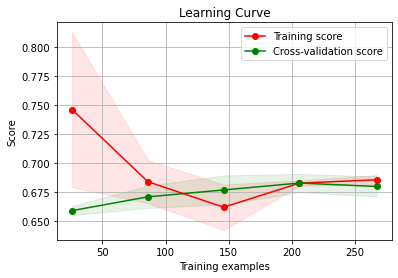









DTR
<class 'str'>
[0 0 0 ... 3 0 0]
[ 0.          2.88888889  0.375       0.          0.53125    13.85714286
  0.85714286  4.2         0.          0.11538462  3.          0.
  0.53125     2.5         0.44444444  0.4         0.          9.46153846
  0.          0.375       0.          0.          0.11111111 13.85714286
  3.77777778  8.21428571  8.33333333  0.          8.21428571  0.09375
  0.53125     0.11111111  4.2         4.61538462  0.          0.
  0.11111111  0.11111111  0.         14.          0.1875      0.85714286
  0.53125     1.5         0.375       3.          8.21428571  9.3
  8.          4.33333333  3.          2.11764706  0.11538462  0.17647059
  0.53125     4.61538462  3.25        0.53125     9.3         0.
  0.         26.          2.55555556  0.76470588  7.53846154  2.55555556
  2.64705882  4.33333333  0.          3.875       0.          4.5
  0.          3.25        2.55555556  0.375       0.          0.375
  2.11764706  0.375       2.11764706  1.09090909  3. 

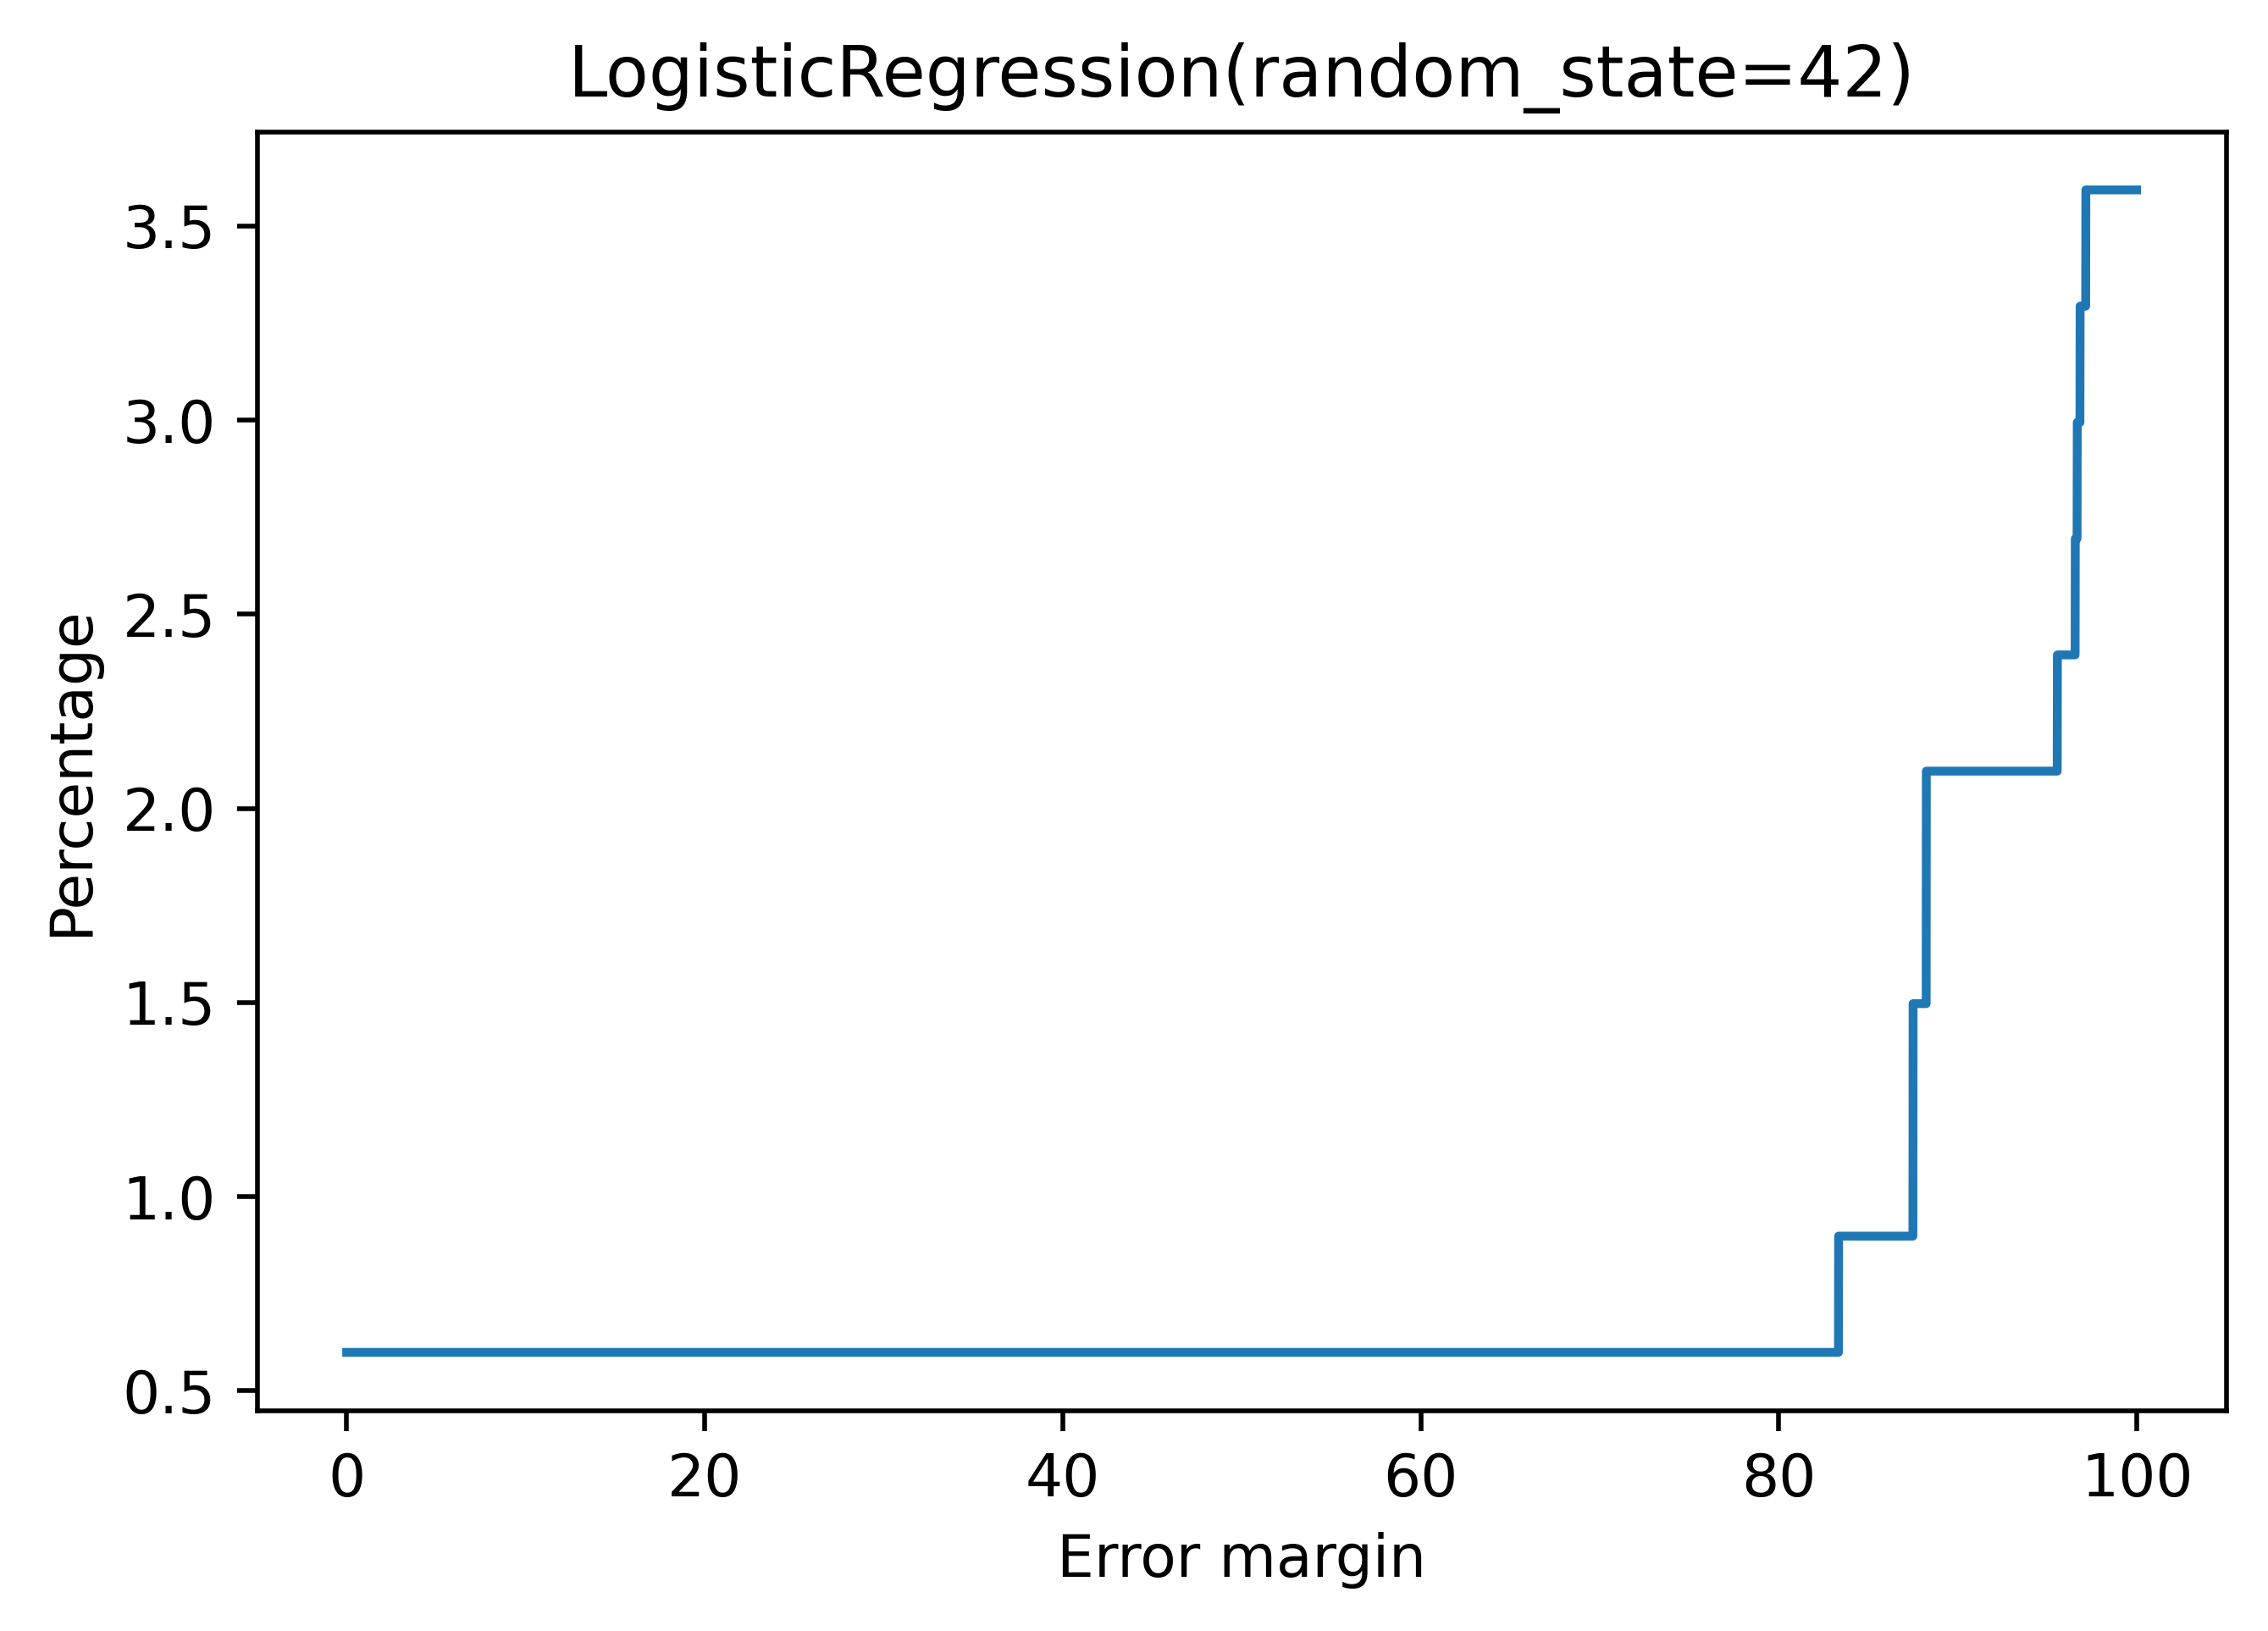

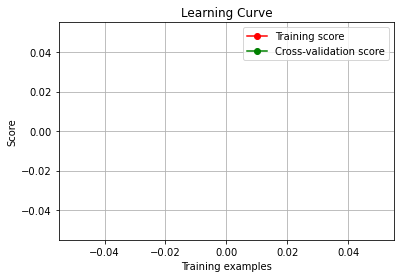









RFR
<class 'str'>
[0 1 1 ... 1 1 1]
[ 7.33115067  0.66796941  1.86703283  8.96258789  1.05716012  1.29417255
  0.93914805  3.36803183  1.          0.92811337  2.972       1.20049513
  2.57646501 11.19602256  0.92811337  3.717       1.05716012  0.77169048
  0.94026478  0.97019156  0.97019156  1.22244057  1.46535928  0.84380741
  1.          1.          1.48230556 10.8242051   1.52999315 40.12
  1.46535928  1.39895405  0.94026478  1.          2.80643346 11.94262988
  1.          0.94561832  0.91413808  3.93863636  6.49937274  3.717
  1.83555733  3.36803183 19.66411742 29.31        1.          1.
  4.35421084  0.92811337  1.22244057  1.          4.2168687  48.15
  1.47310814  0.84380741  1.29417255  1.          1.          0.91413808
  2.13390561  2.13390561  3.717       1.42119016  1.          0.6574246
  0.7945119   1.          0.66796941  1.46535928  1.83555733  1.39895405
  1.42119016 29.16       21.72666667  8.59329237  0.97019156  2.80805461
 13.758       2.57646501  1.     

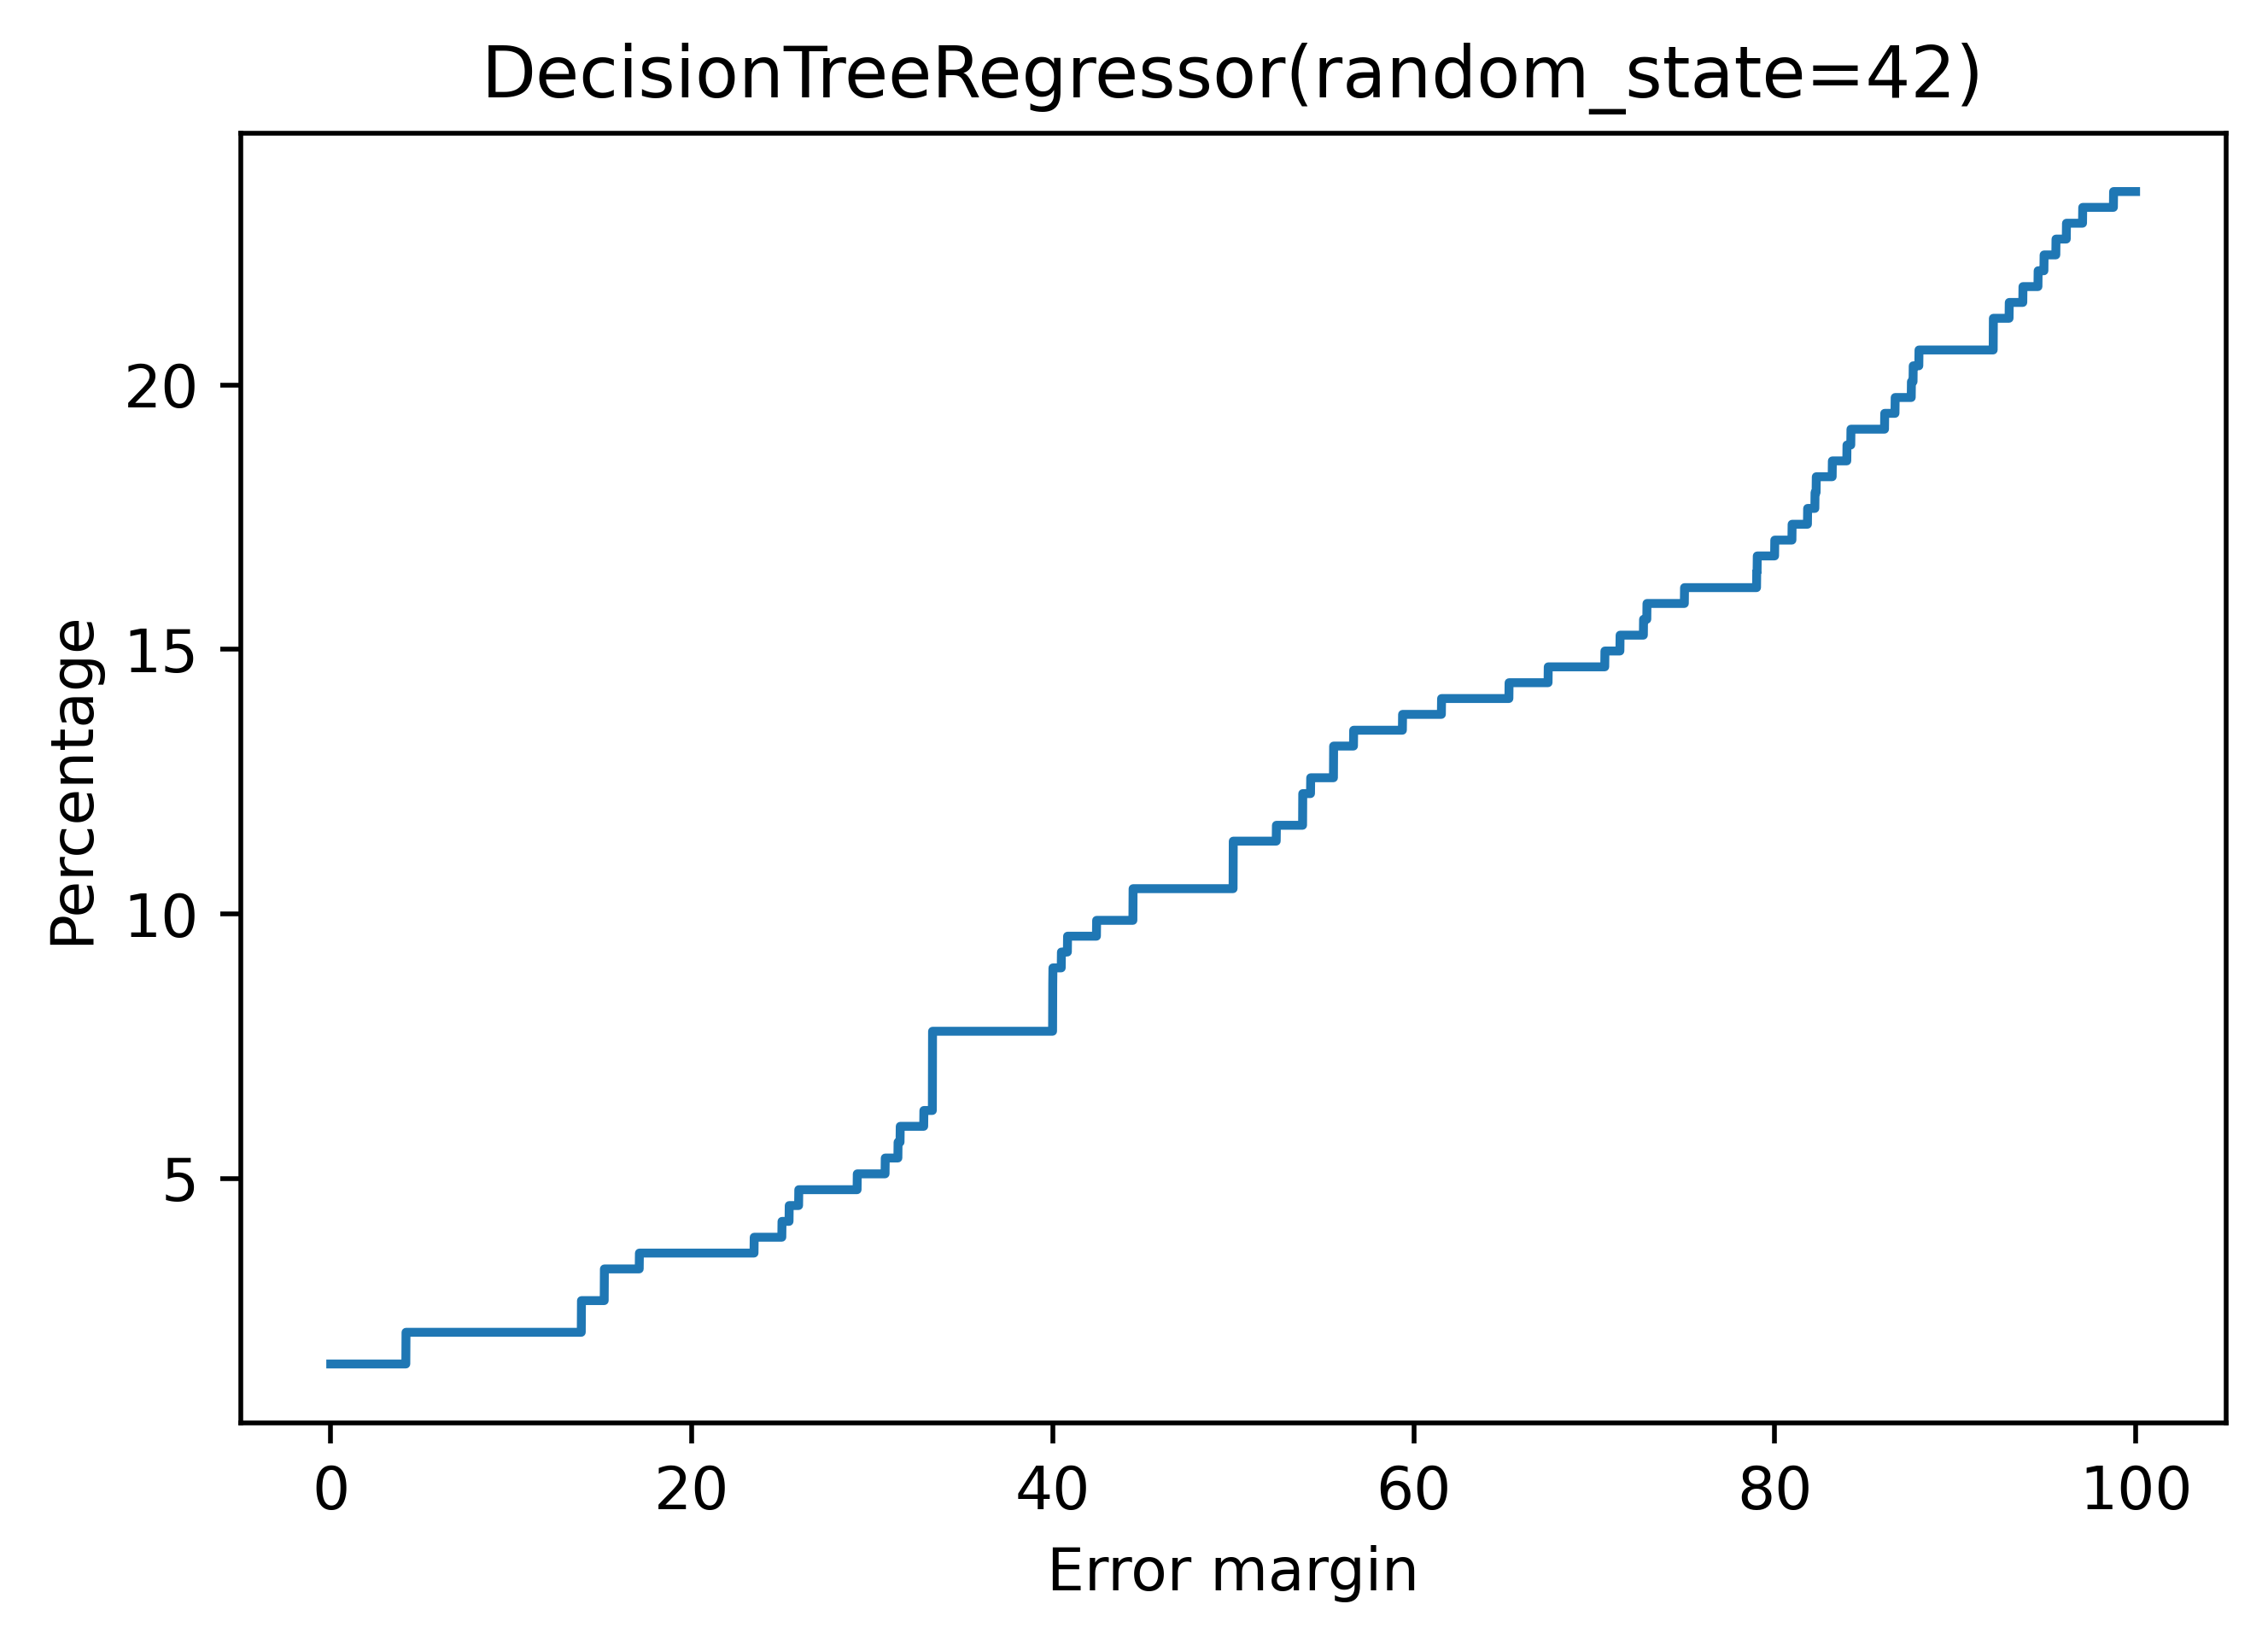

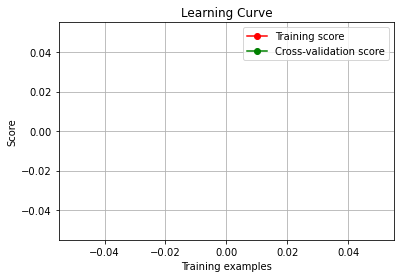









ETR
<class 'str'>
[0 0 0 ... 0 0 2]
[ 0.41025641  0.27272727  0.          2.          4.14285714  0.
  0.          0.27272727  1.14285714  4.44444444  0.          0.
  0.2         3.17142857  0.23255814  8.6         4.14285714  0.
  2.3         0.2         0.          2.66666667  0.0952381   0.0952381
  1.84210526  0.0952381   0.32352941  0.20588235  6.09090909  0.32352941
  0.91666667  4.44444444 20.          0.16666667  2.3         6.09090909
  1.32457143  2.6         2.09677419  0.          0.91666667  3.07692308
  0.          0.4         2.3         2.6        16.66666667  1.88888889
  4.14285714  4.44444444  1.2         0.          2.          0.46153846
  3.36363636  4.          0.          1.30769231  0.          0.2
  9.          1.72727273  2.09677419  2.3         0.91666667  0.20689655
  0.20689655  0.55555556  0.32352941 20.          0.20588235  1.88888889
  0.          3.07692308  1.78787879  0.         36.8         0.13333333
  0.0952381   0.5         0.20588235  0

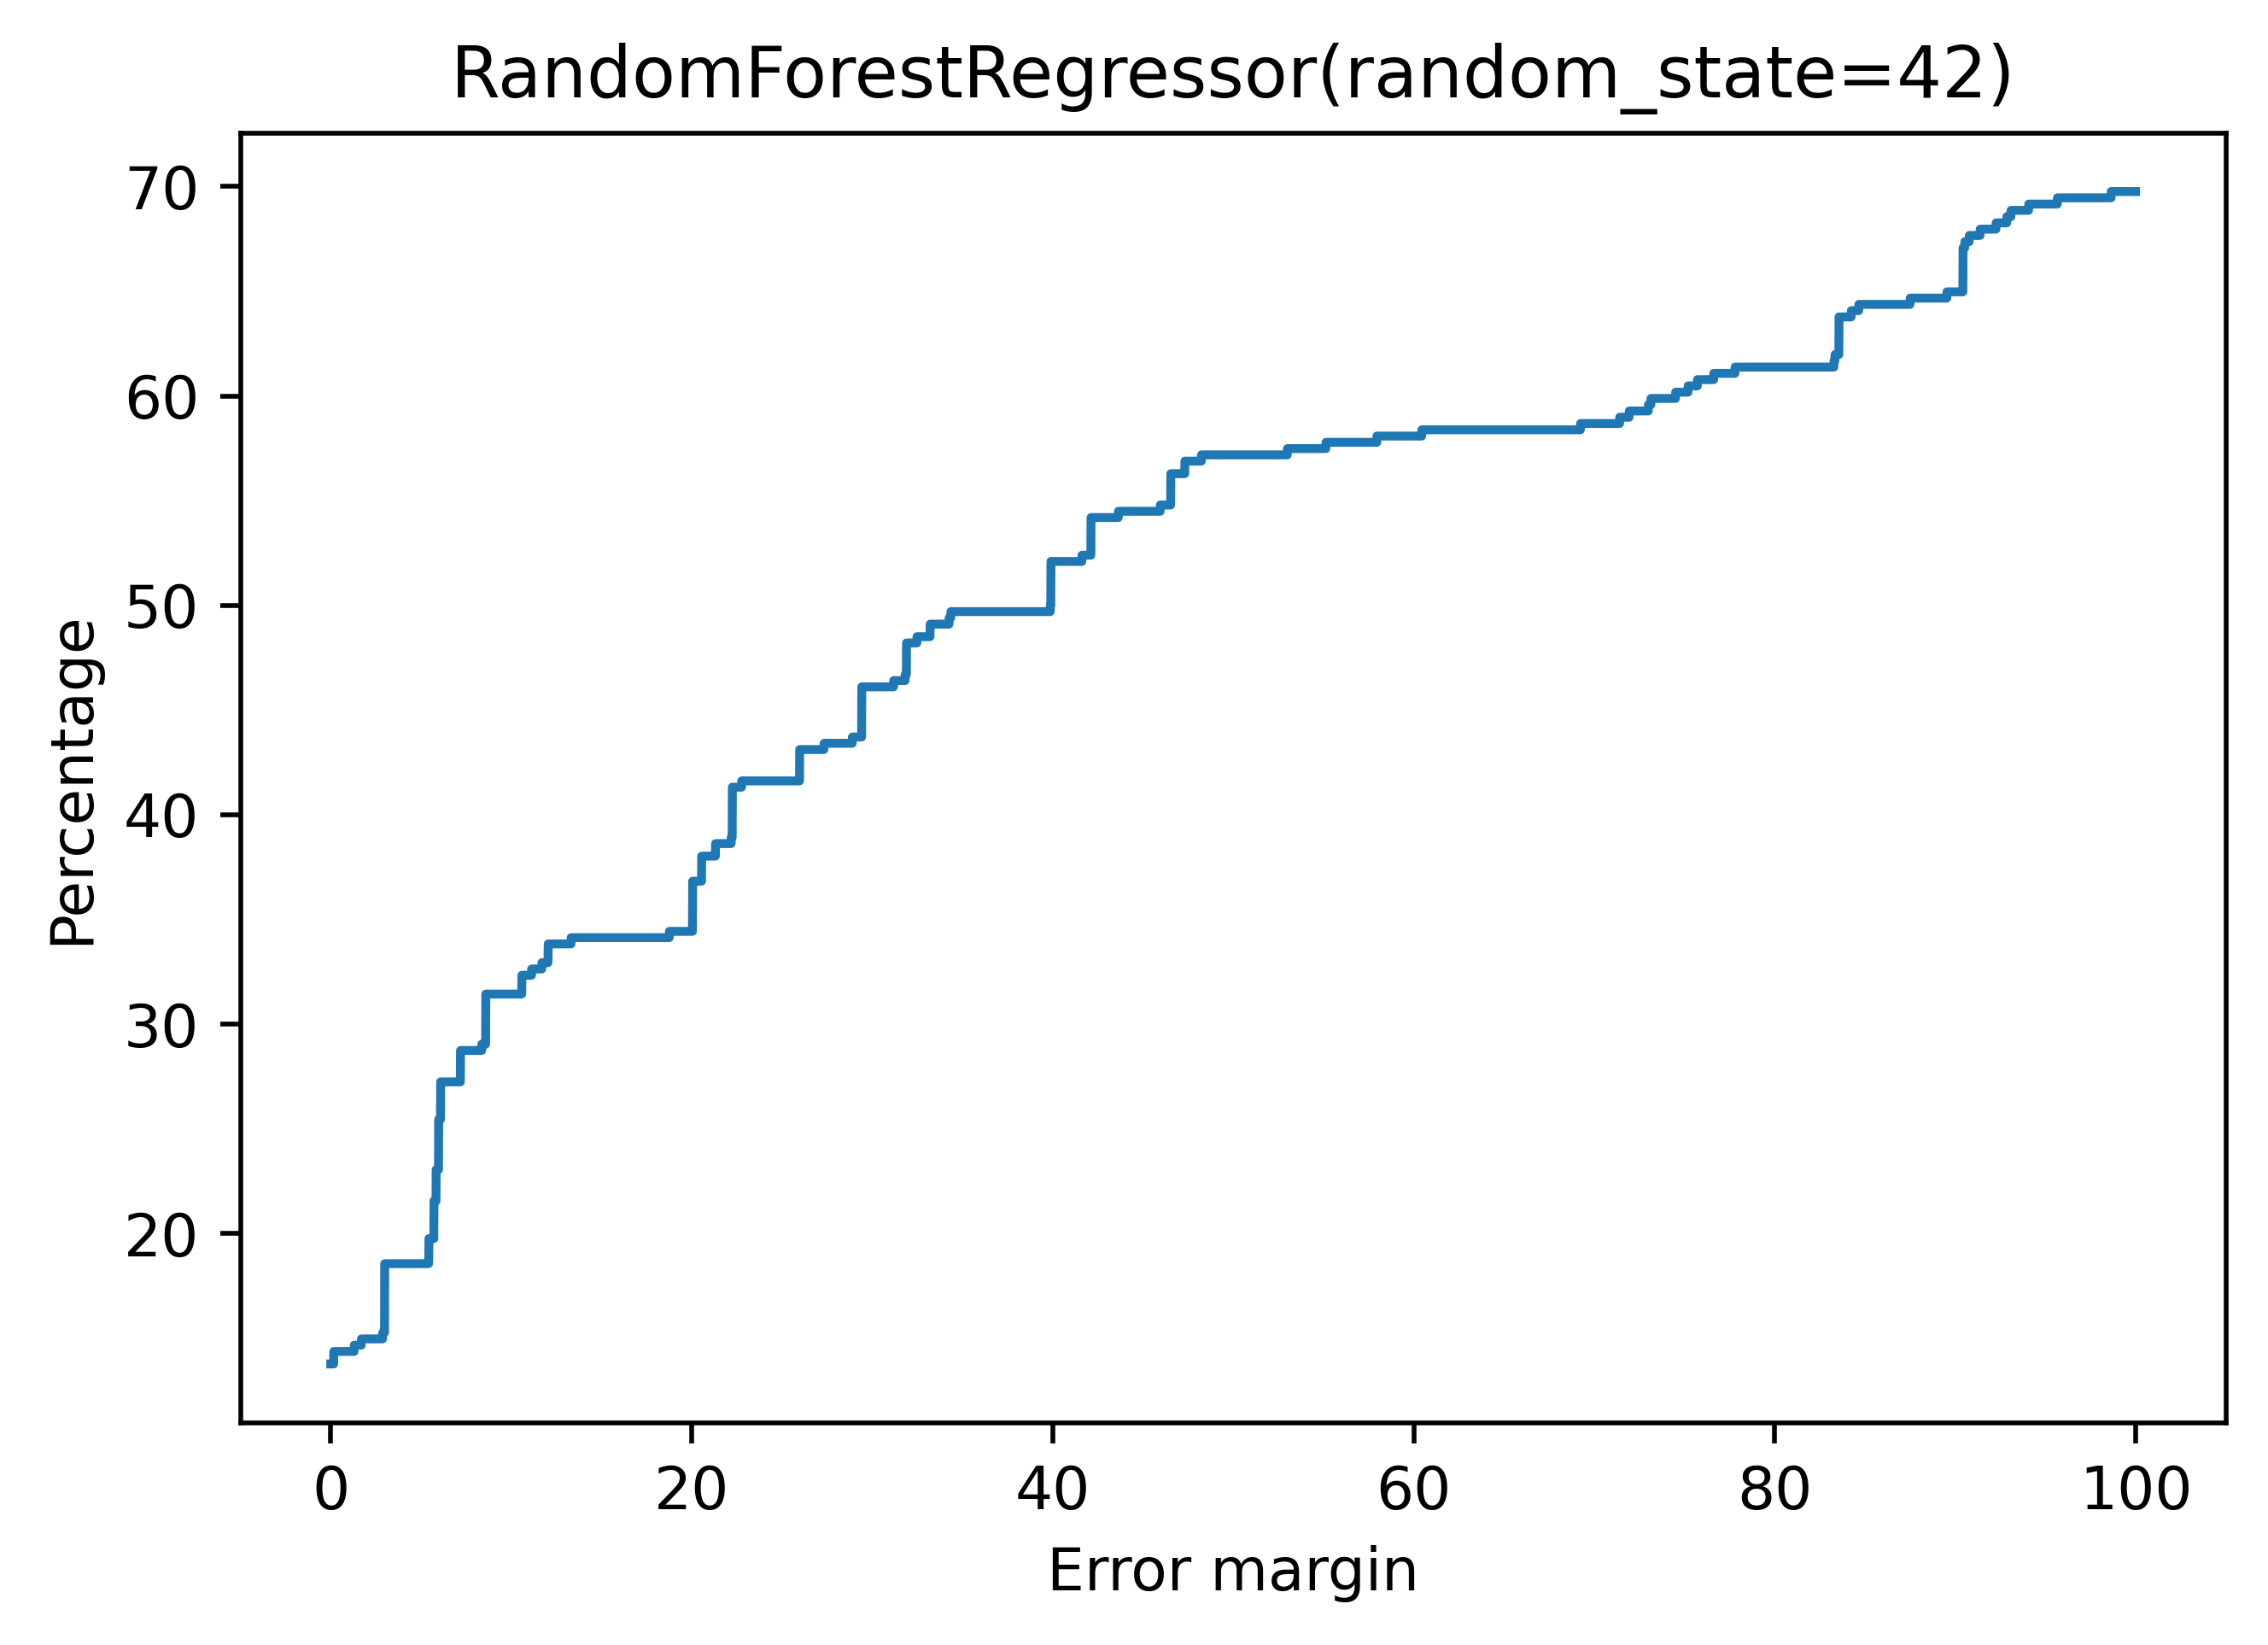

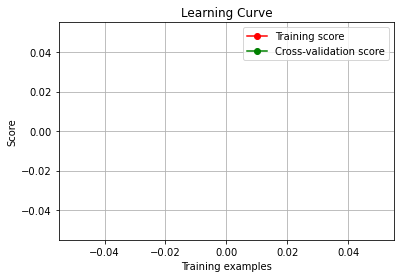









XGB
<class 'str'>
[ 0  1  1 ...  1 42  2]
[ 9.132705   -3.6501992   1.0873225   2.4478226   1.0181241   0.99790305
  2.538427    5.622991    0.99550825  0.93947965  0.18688323  0.9119343
  0.94649684  0.99272317 43.830853    0.9122975   1.0016155   1.0012112
  1.2536794   2.6741037   0.9279428   1.016427    5.7705216   1.7491267
  0.7138304   1.4354678   1.016427    5.570116    1.2028353   2.4478226
  5.7705216   0.90034217  2.538427    0.9930717   1.5276977   0.9677521
  5.7705216   1.0502663   0.90407103  1.3082976   1.0127541   0.19190386
  1.0012112   6.26216     1.0056534   1.0387051   0.9930717   2.0329611
  1.0755763   6.162761    2.4478226   3.4393976   2.1659708   4.456732
  0.9493872   0.99550825  0.9493872   0.9447317   0.99272317  5.2134547
  3.4393976   0.86494005  0.9493872   6.2701135  -0.12420935  2.1659708
  0.9930717   0.90407103  0.9122975   0.9975275   1.5276977   3.951711
  6.162761    1.2536794   0.982228    1.0042688   1.0873225   0.9279428
  1.0056534   

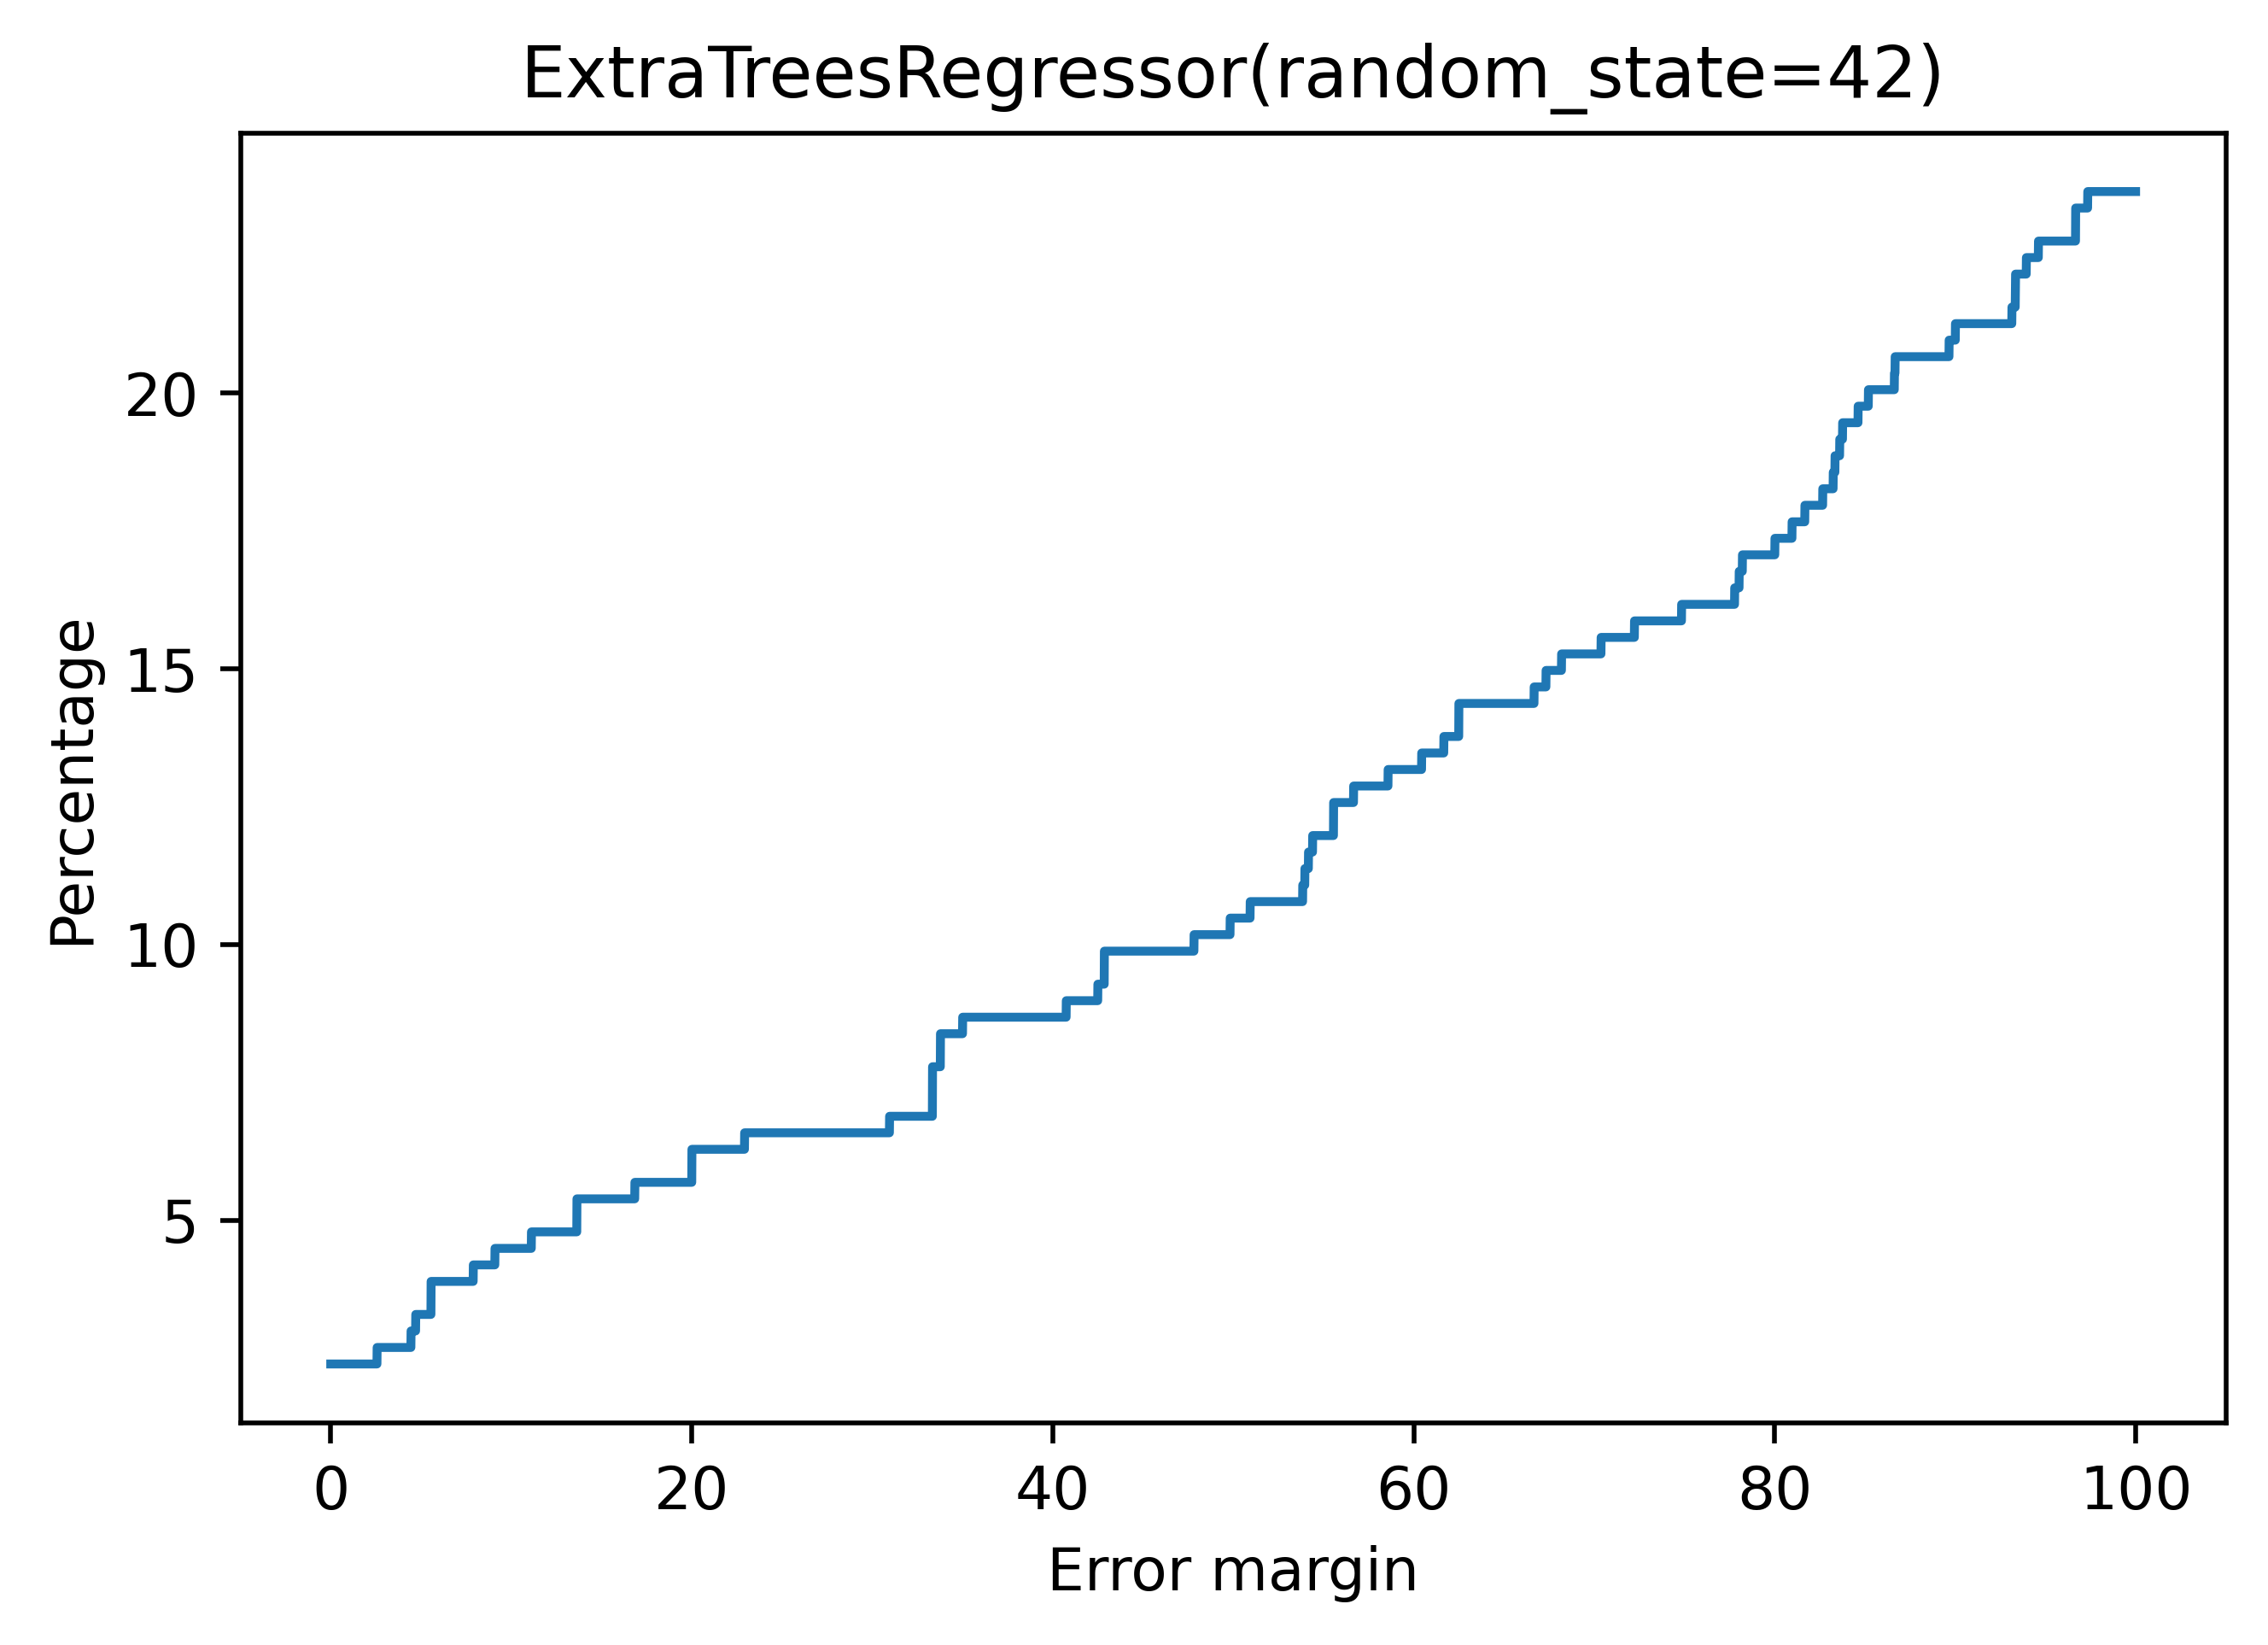

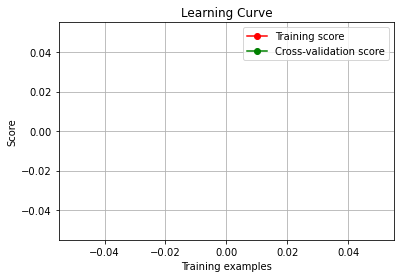









LGBM
<class 'str'>
[ 0  1  0 ...  0 77 78]
[ 1.76071357e+00  1.70325558e+00  7.11962171e-02  2.12099773e+00
  1.29806146e+00  3.89788134e-01  4.90902576e-03  1.25473549e-01
  3.24646424e+00  2.90841807e+00  1.76071357e+00  1.78811401e-01
  9.80167876e-01  9.57587277e-01  2.56052507e+00  9.57587277e-01
  6.65952191e+00  4.09600934e-03  2.90841807e+00 -6.89230313e-02
  3.51146216e+01  4.90902576e-03  8.55073386e+00  7.67855728e+00
  3.36669332e+00  6.20719088e-01  3.30713528e+00  1.28741814e+00
  2.73599173e-01  5.53399030e-01  1.28741814e+00  1.28210340e+00
  2.56052507e+00 -6.89230313e-02  2.45050149e+00  3.52315091e-01
  9.80167876e-01  9.80167876e-01  1.76071357e+00  1.44366884e-01
  1.76071357e+00  1.70325558e+00  1.25473549e-01  5.53399030e-01
  2.73599173e-01  3.49721412e-01  1.28741814e+00  1.25473549e-01
  1.31456331e-01  3.36669332e+00  3.30713528e+00  1.28741814e+00
  3.20128513e-01  3.53319921e+00  5.90009283e-02  4.09600934e-03
  4.90902576e-03  4.09600934e-03  1.484

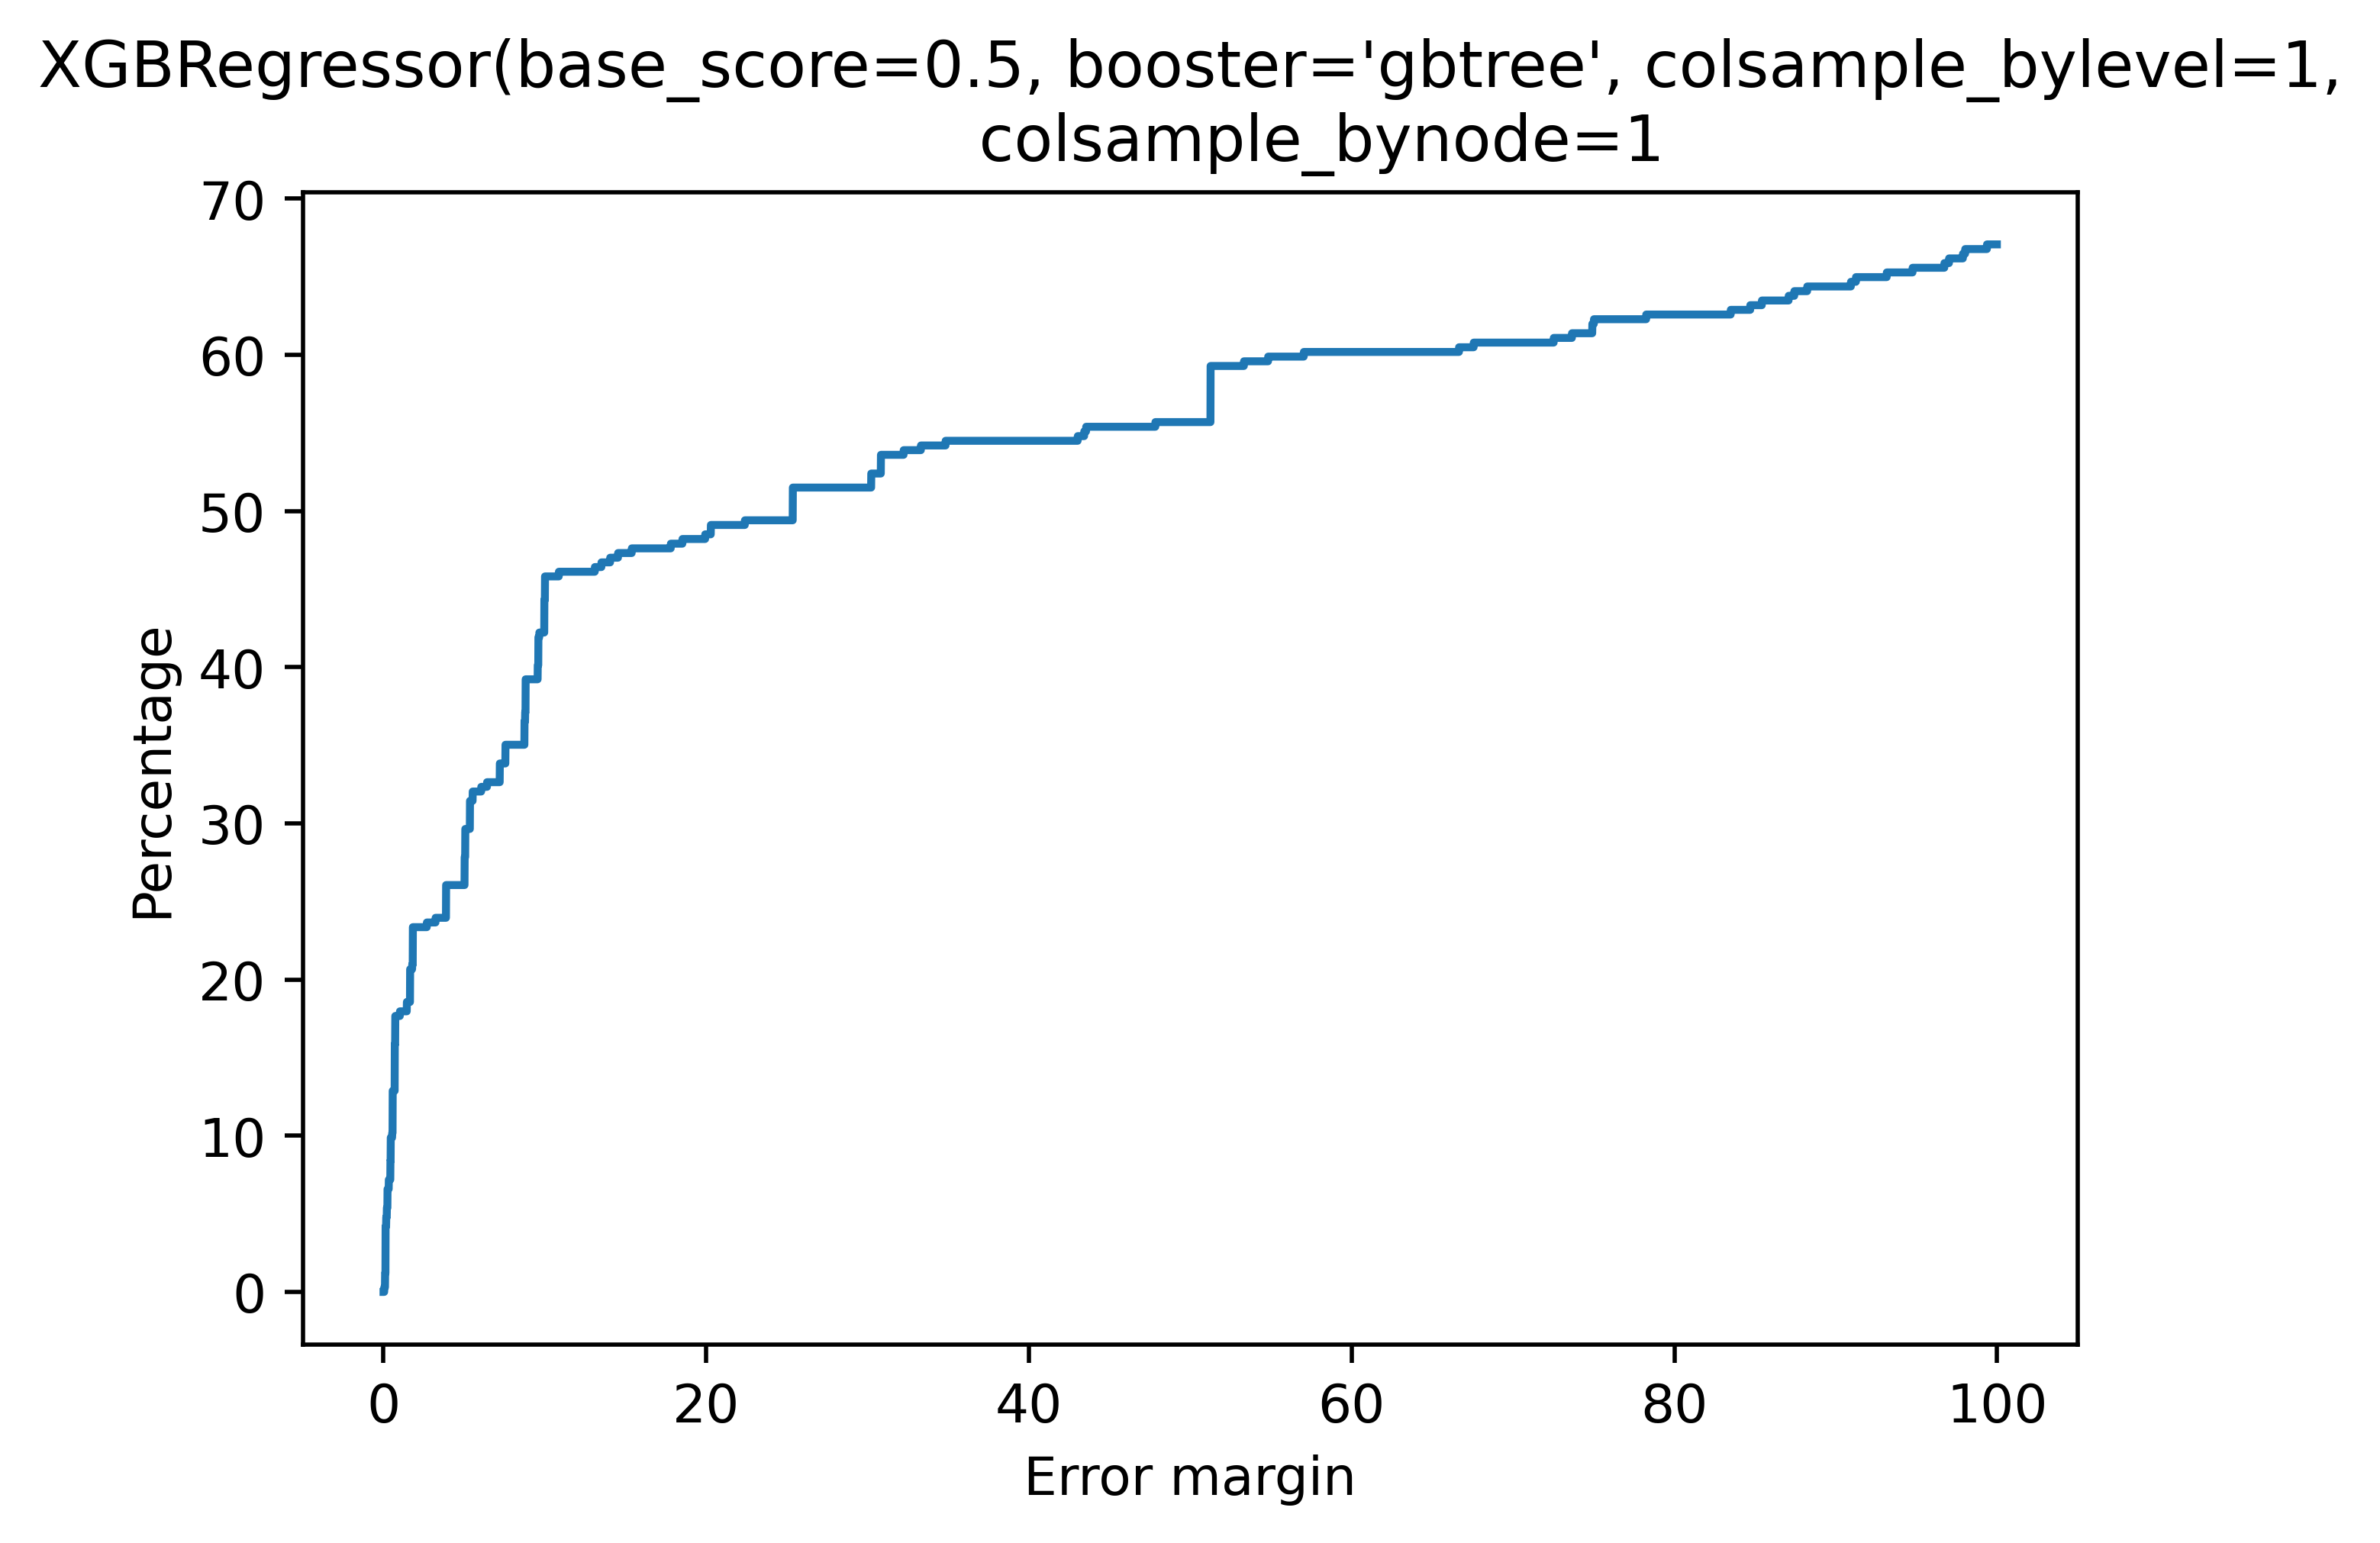

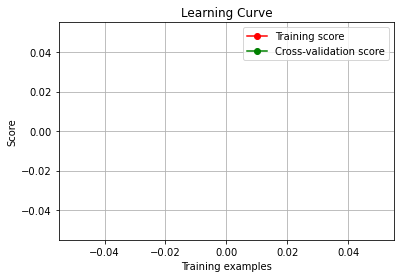









KNR
<class 'str'>
[0 0 1 ... 0 0 0]
[ 1.2 10.8  0.   5.6  6.   0.   0.   0.   0.   0.   6.2  0.   0.   0.
  0.   0.   0.  30.   0.   1.8  0.2  0.  30.   2.2  0.   0.   8.4  0.8
  3.2  0.   0.   3.4  0.   0.   0.   1.8  0.4  4.6  7.   0.   1.   0.2
  0.2  2.4  3.8  0.   0.   1.2  0.   8.8  2.6  0.   5.6 12.6  6.   0.
  5.6  0.   2.2 12.4  0.4  1.8  0.2  8.6  0.   8.8  0.   0.   3.6  0.
  3.4 15.4  1.6  1.8  4.2  0.6  1.8  3.2  0.   0.8  0.2  0.   0.   0.
  6.   0.   2.2  4.6  0.   0.4  0.   0.   0.   0.2  7.8  0.2  1.2  0.
  0.   0.   5.4  2.   0.   1.8  0.   0.2  0.   5.6  1.8  0.   7.   0.2
  0.4  2.2  0.   0.4  0.   0.2  0.   3.8  2.6  5.6  0.   0.6  0.8  0.4
  8.4  0.   0.   0.   0.   1.2  0.   0.4  0.   2.   0.2  0.   0.   0.8
  8.4 23.   3.4  0.   0.   7.8  0.   0.   0.   1.8  0.   1.6  3.4  2.
  0.   6.2  1.8  0.   0.2  0.4  7.   0.   1.8  0.   8.8  0.   0.   2.
  2.2  0.6 13.6  0.   5.   1.   0.   1.6  0.2  0.2  0.   8.4  0.   0.2
  0.   0.   5.   0.   1.8  0.   0.   0. 

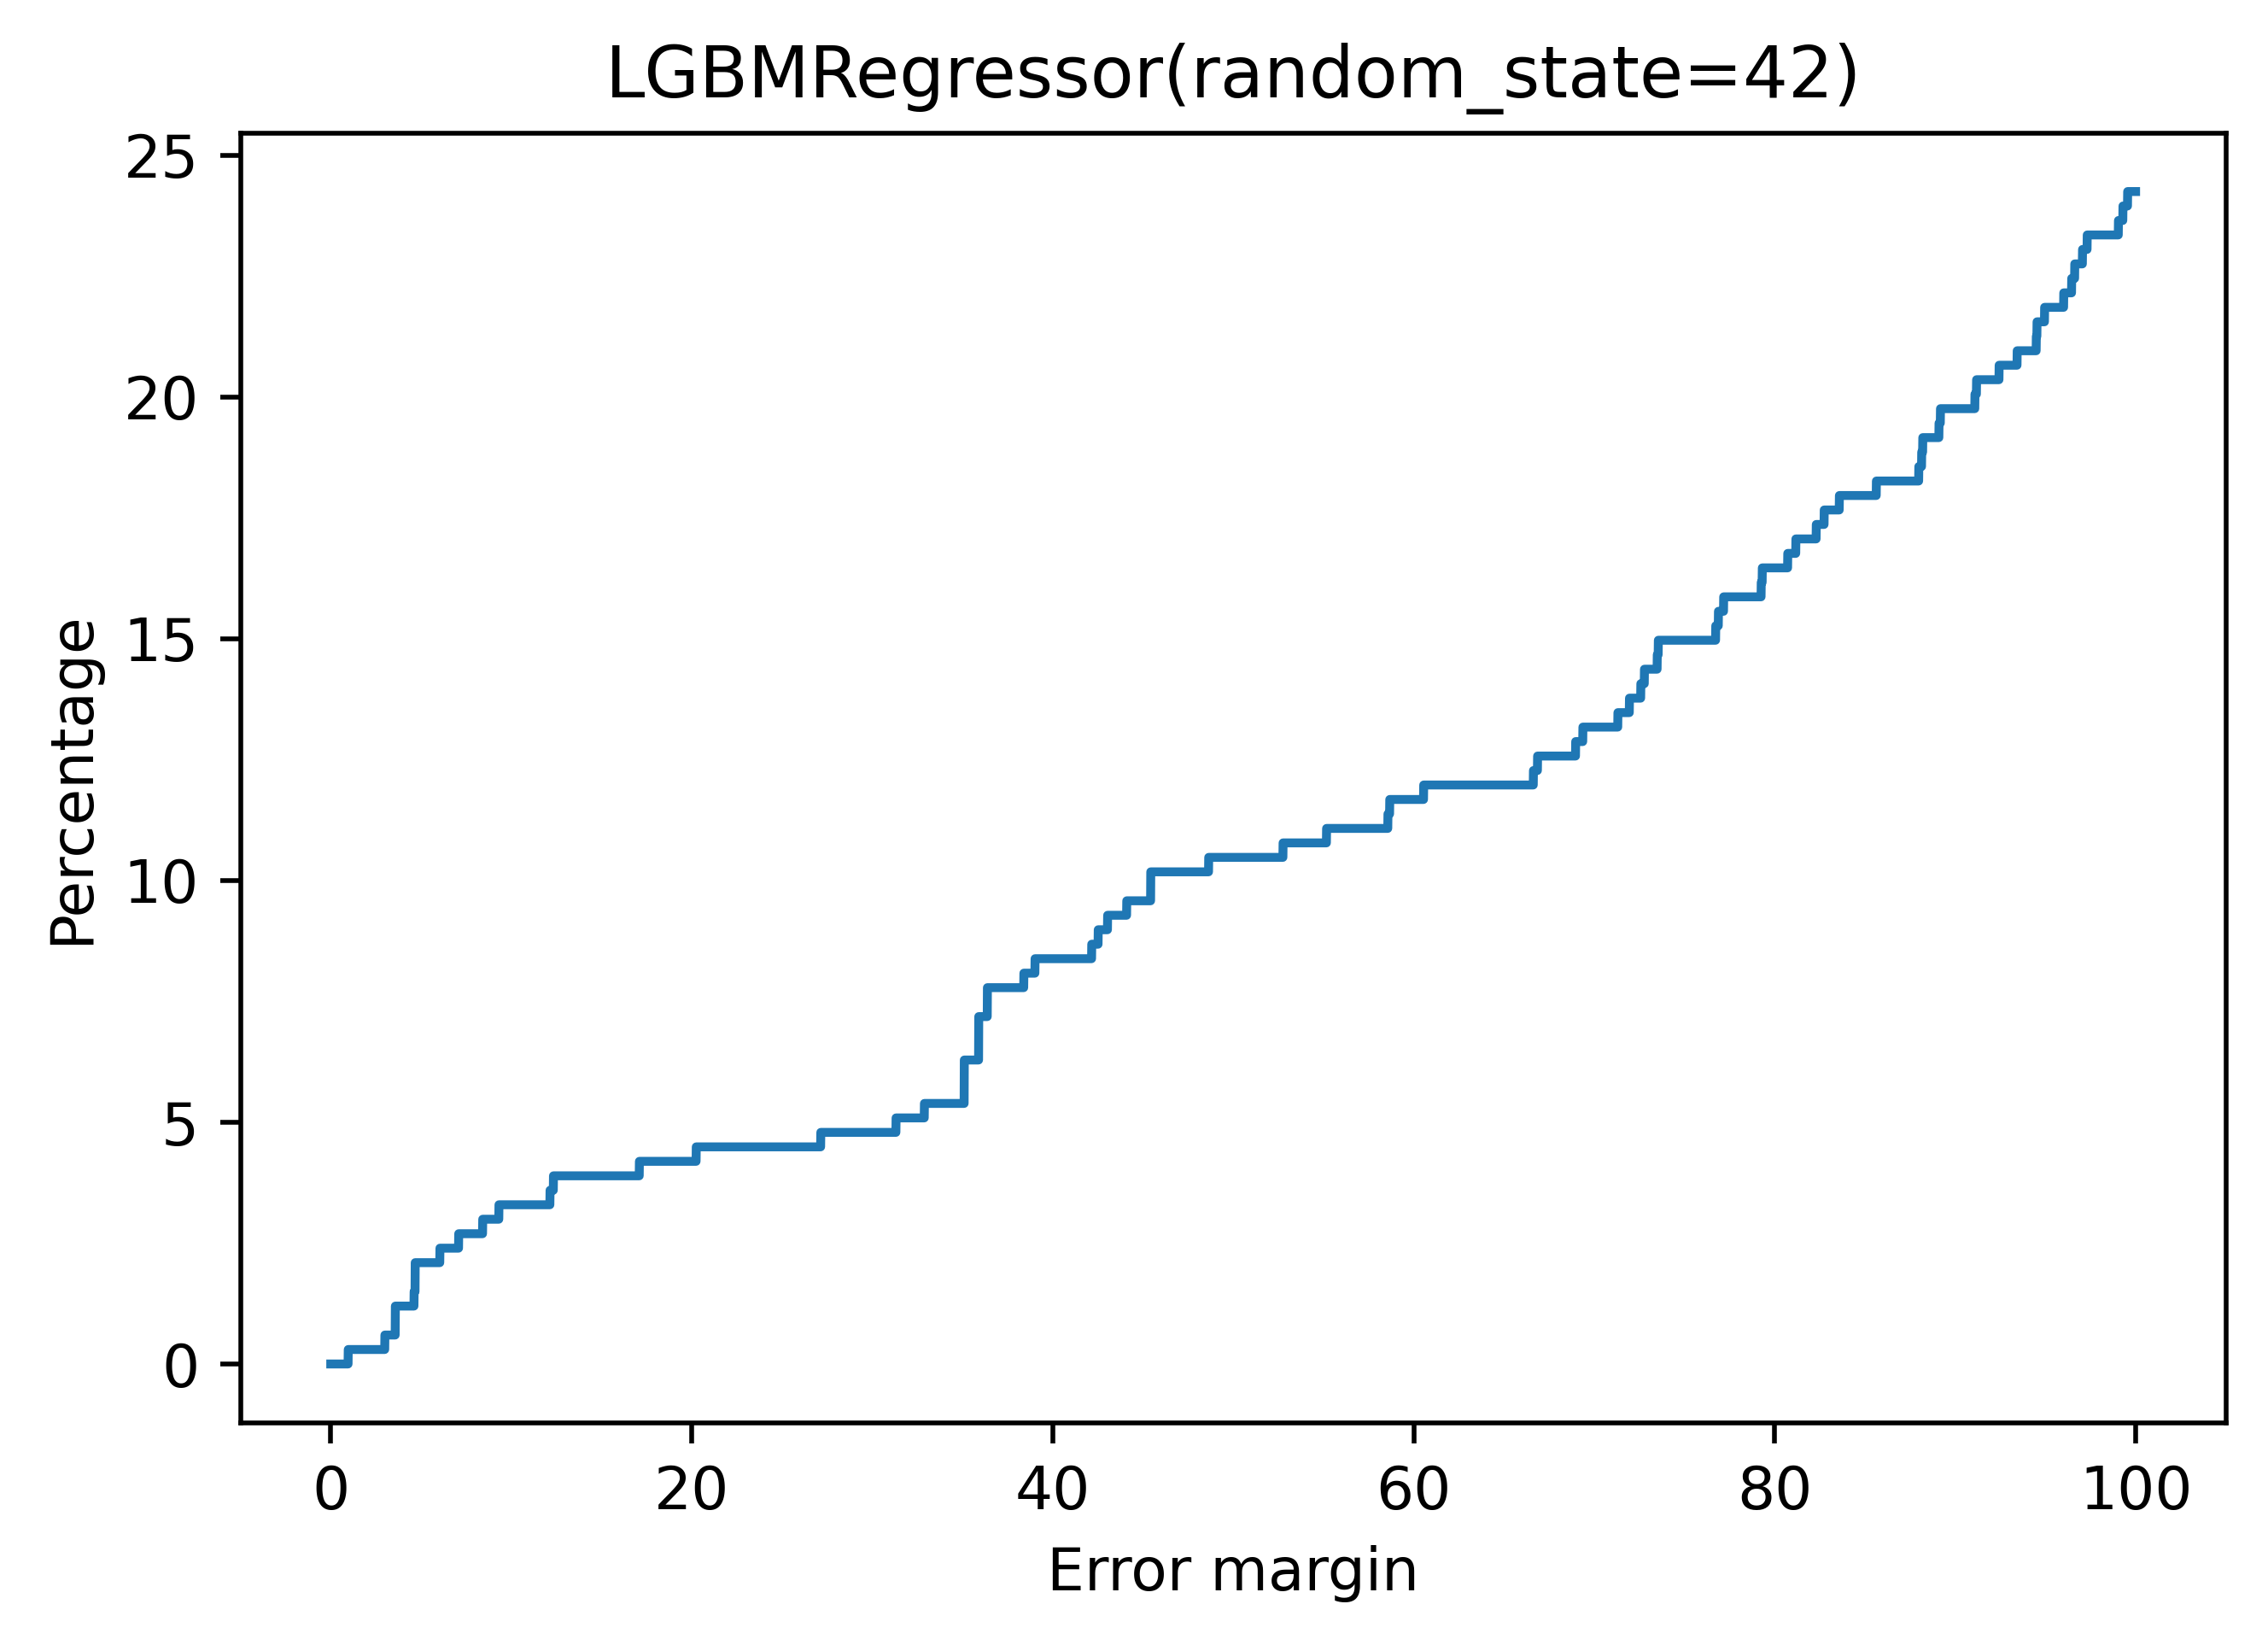

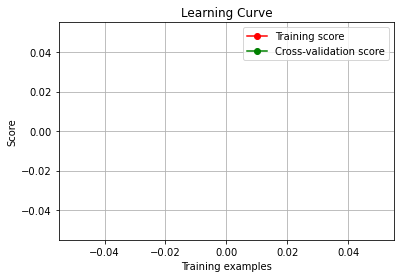









GBR
<class 'str'>
[0 1 2 ... 0 0 0]
[ 0.29661022  0.62137572  0.26977938  0.96661115  0.41183406  0.92031824
  0.92031824  0.92031824  5.55673828  4.60400973  0.62137572  0.55699069
  0.29661022  0.26833124  0.41183406  0.26977938  0.29661022  3.58646831
  0.55699069 40.99307898  4.92116614  0.29661022  0.61371021  5.40895561
  2.84832749  5.83946499  0.29661022  6.27406743 -0.89658856  8.35643334
  0.41183406  3.60696547  6.27406743  0.29661022  5.37739824  0.41183406
  0.41183406  0.29661022 -0.89658856  0.55699069  3.72218931  5.60354222
 10.68948631  4.9149767   0.62137572  4.79859634  0.49917234  0.29661022
  0.92031824  4.60400973  0.30738019  0.26977938  0.49917234  4.21362127
  0.29661022 40.14509997  5.83946499  0.29661022  0.26833124  6.53281639
 -0.89658856  0.26833124  0.41183406  0.55699069  3.85620262  4.12631759
  0.92031824  4.9149767   4.82338791  0.41183406  5.23850293  0.26977938
  0.49917234  3.58646831  3.57868649  8.01834785  0.30738019  0.26977938
  0.920

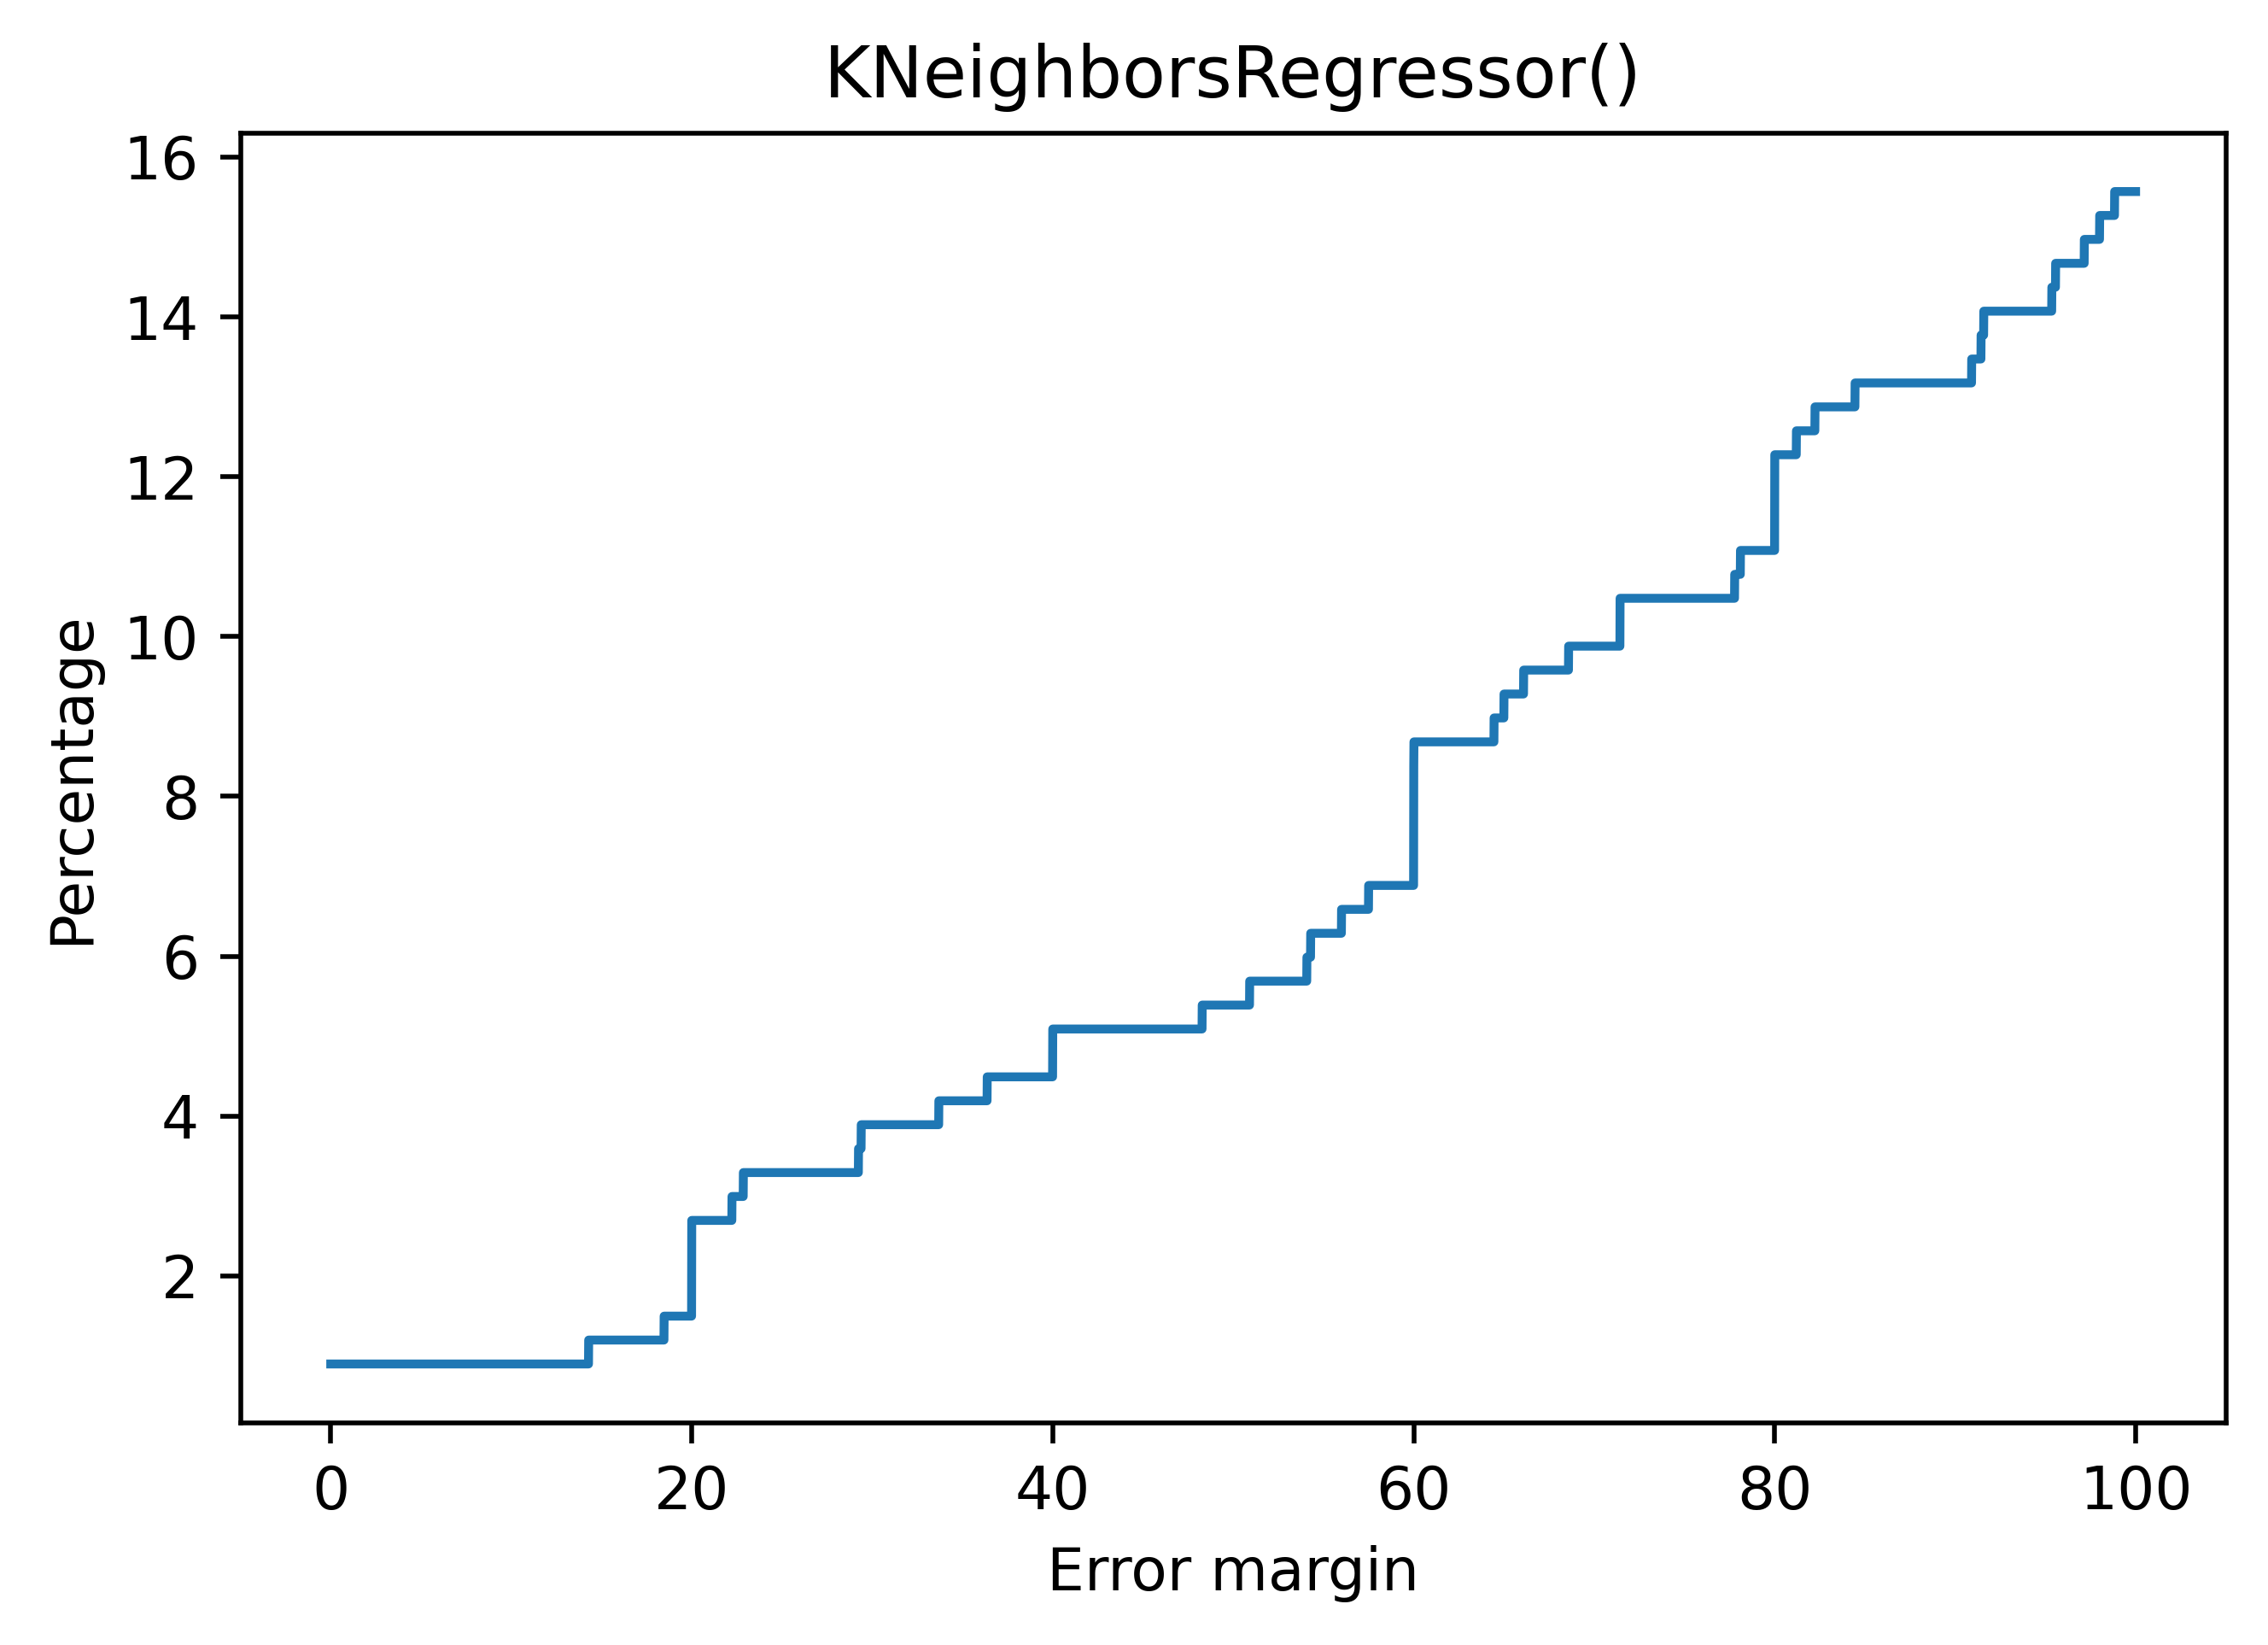

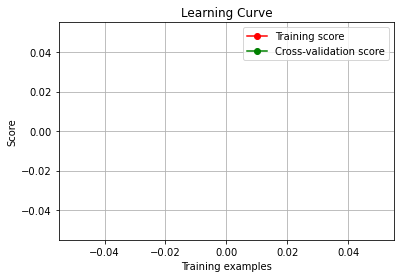









LSVC
<class 'str'>
[0 0 1 ... 1 1 0]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 63  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 63  1  1  1  1  1  1  1  1  1  1  1  1  1  1 63  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 63  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1

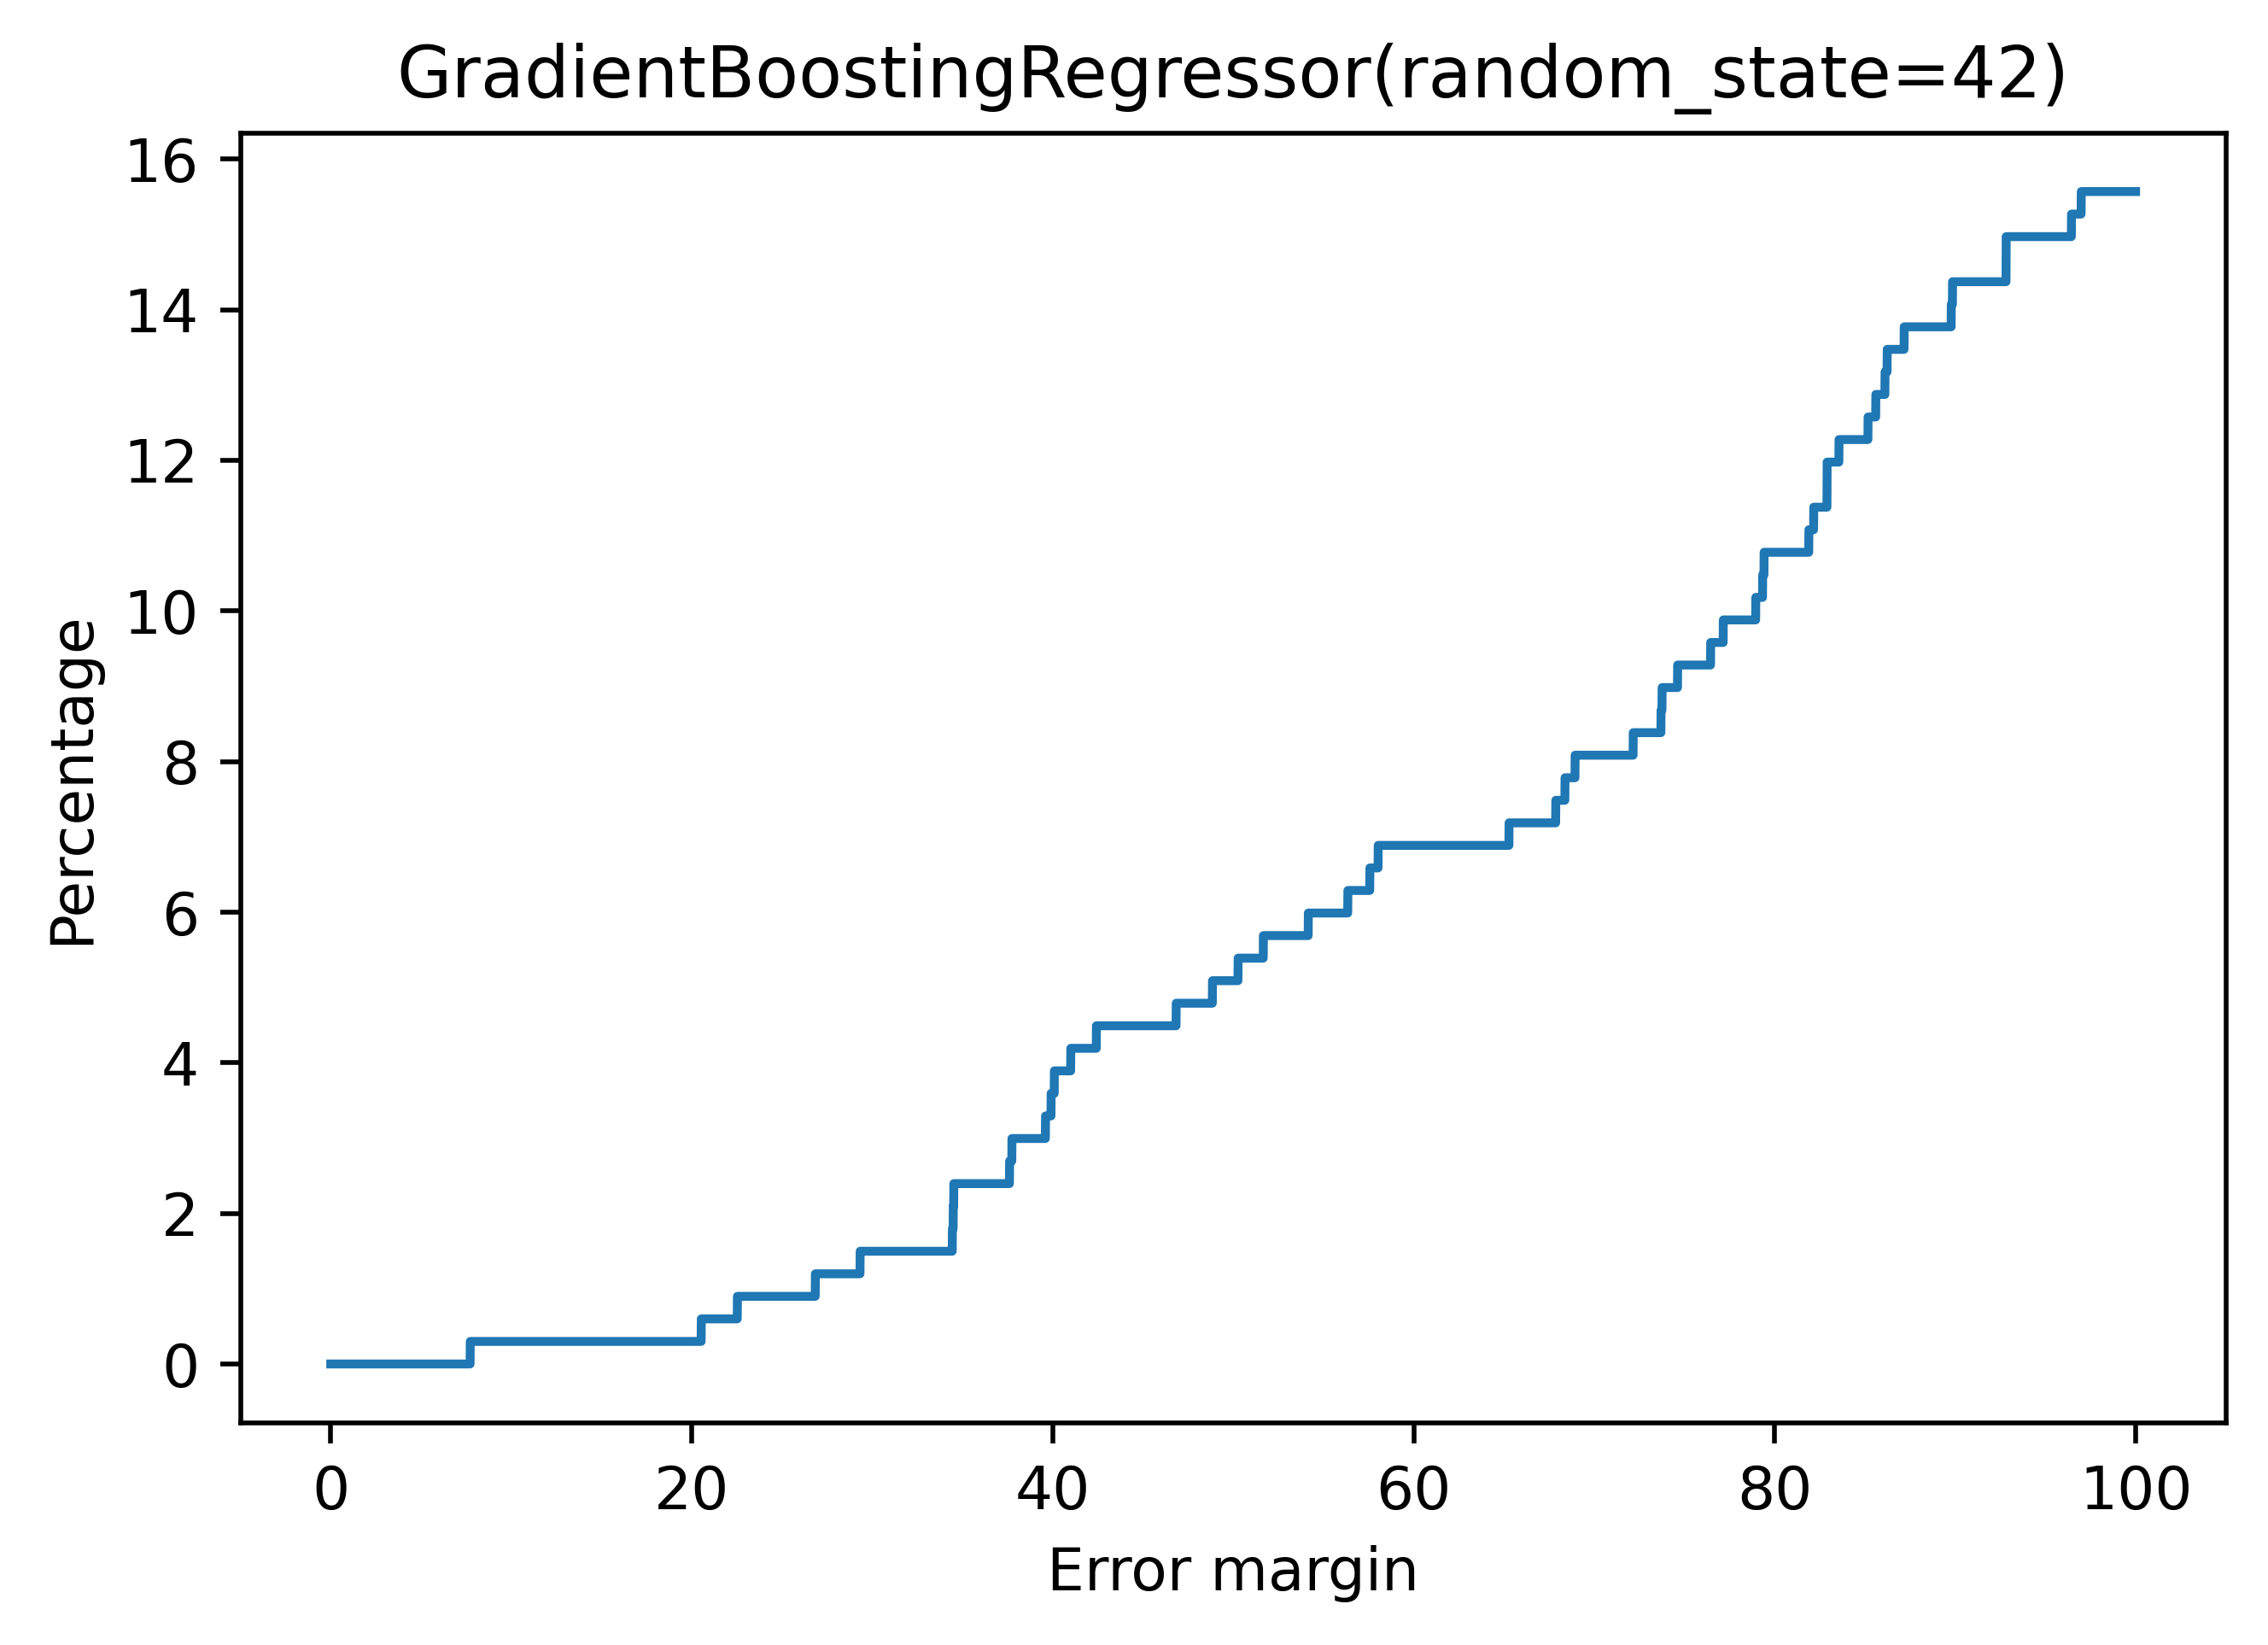

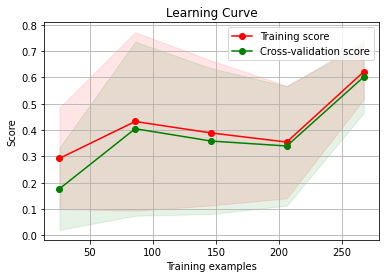

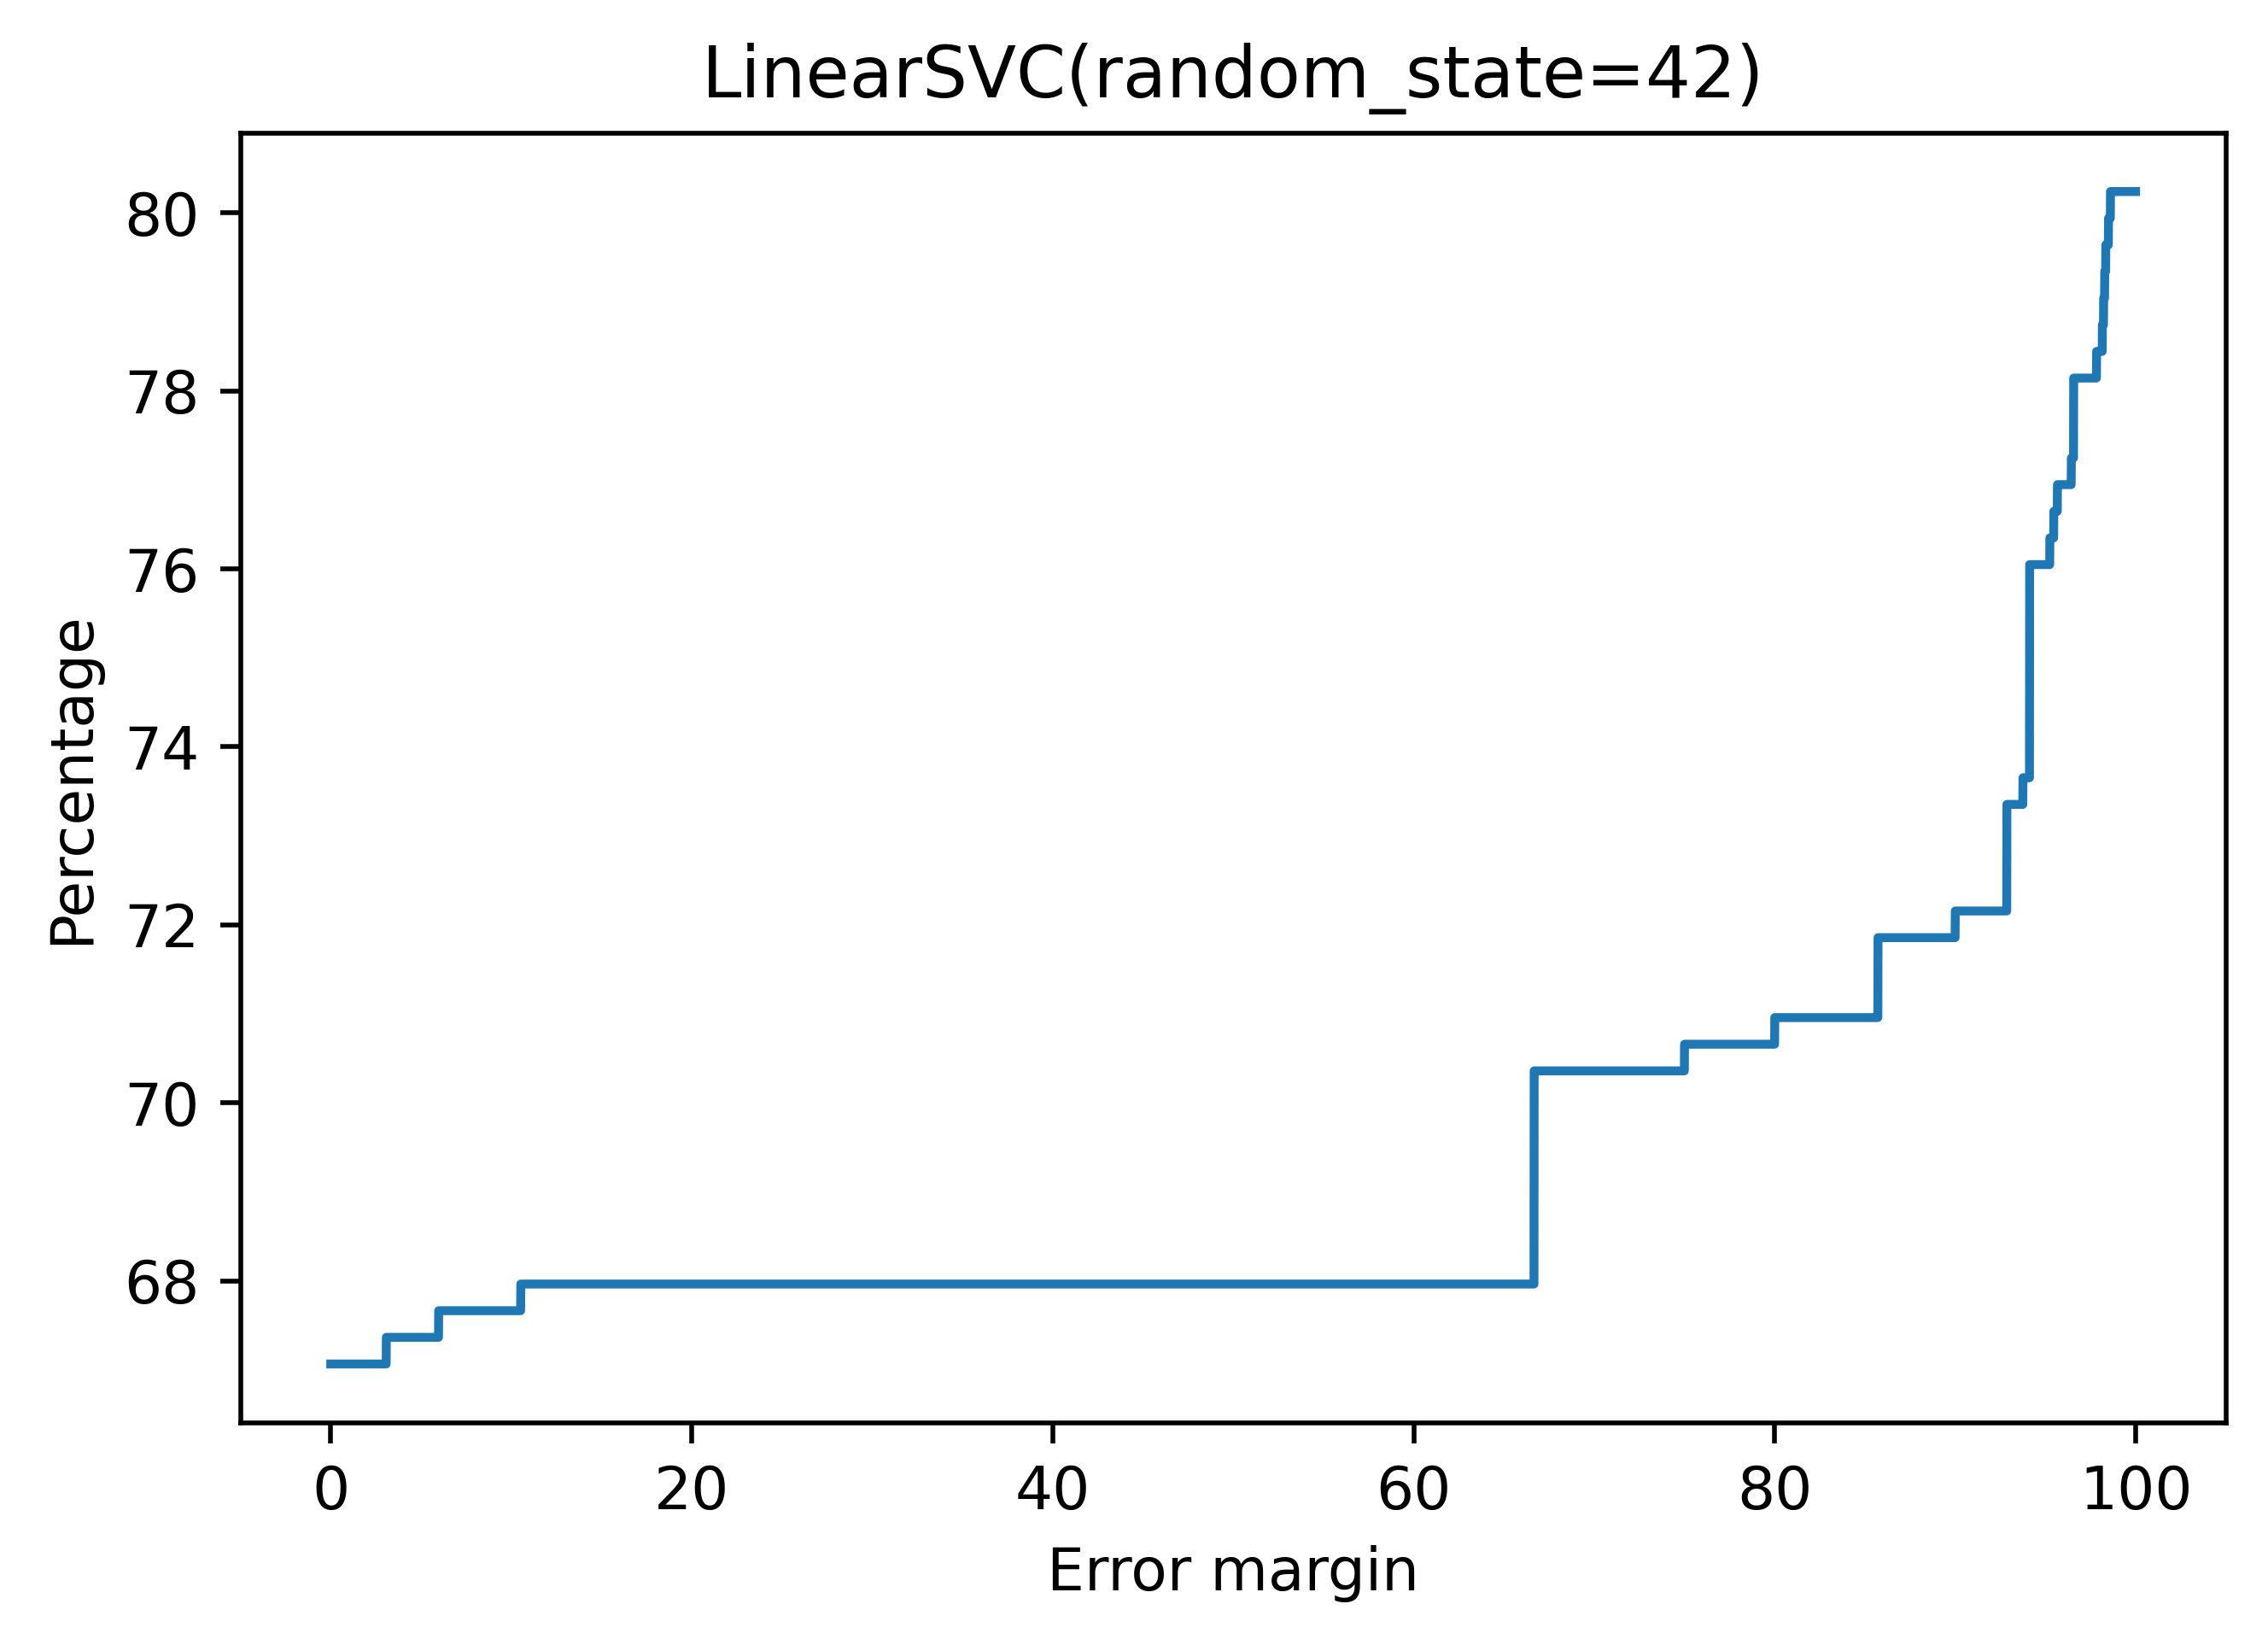

In [70]:
for model in models.items():
    s = str(model[0])
    print((str(model[0]))[:19])
    print(type(s))
    #print(s[:6])
    run_model(model[1],WindowsPhonePyt4,metrics['f1_score'])
    

LGR
<class 'str'>
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0] 

r2_score:  -0.04734605655891366


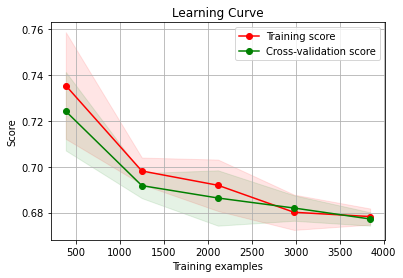









DTR
<class 'str'>
[0 0 1 ... 0 0 1]
[ 0.28977273  0.81714286  0.4375     ... 18.625       1.
  3.15753425] 

r2_score:  -0.18141995153953006


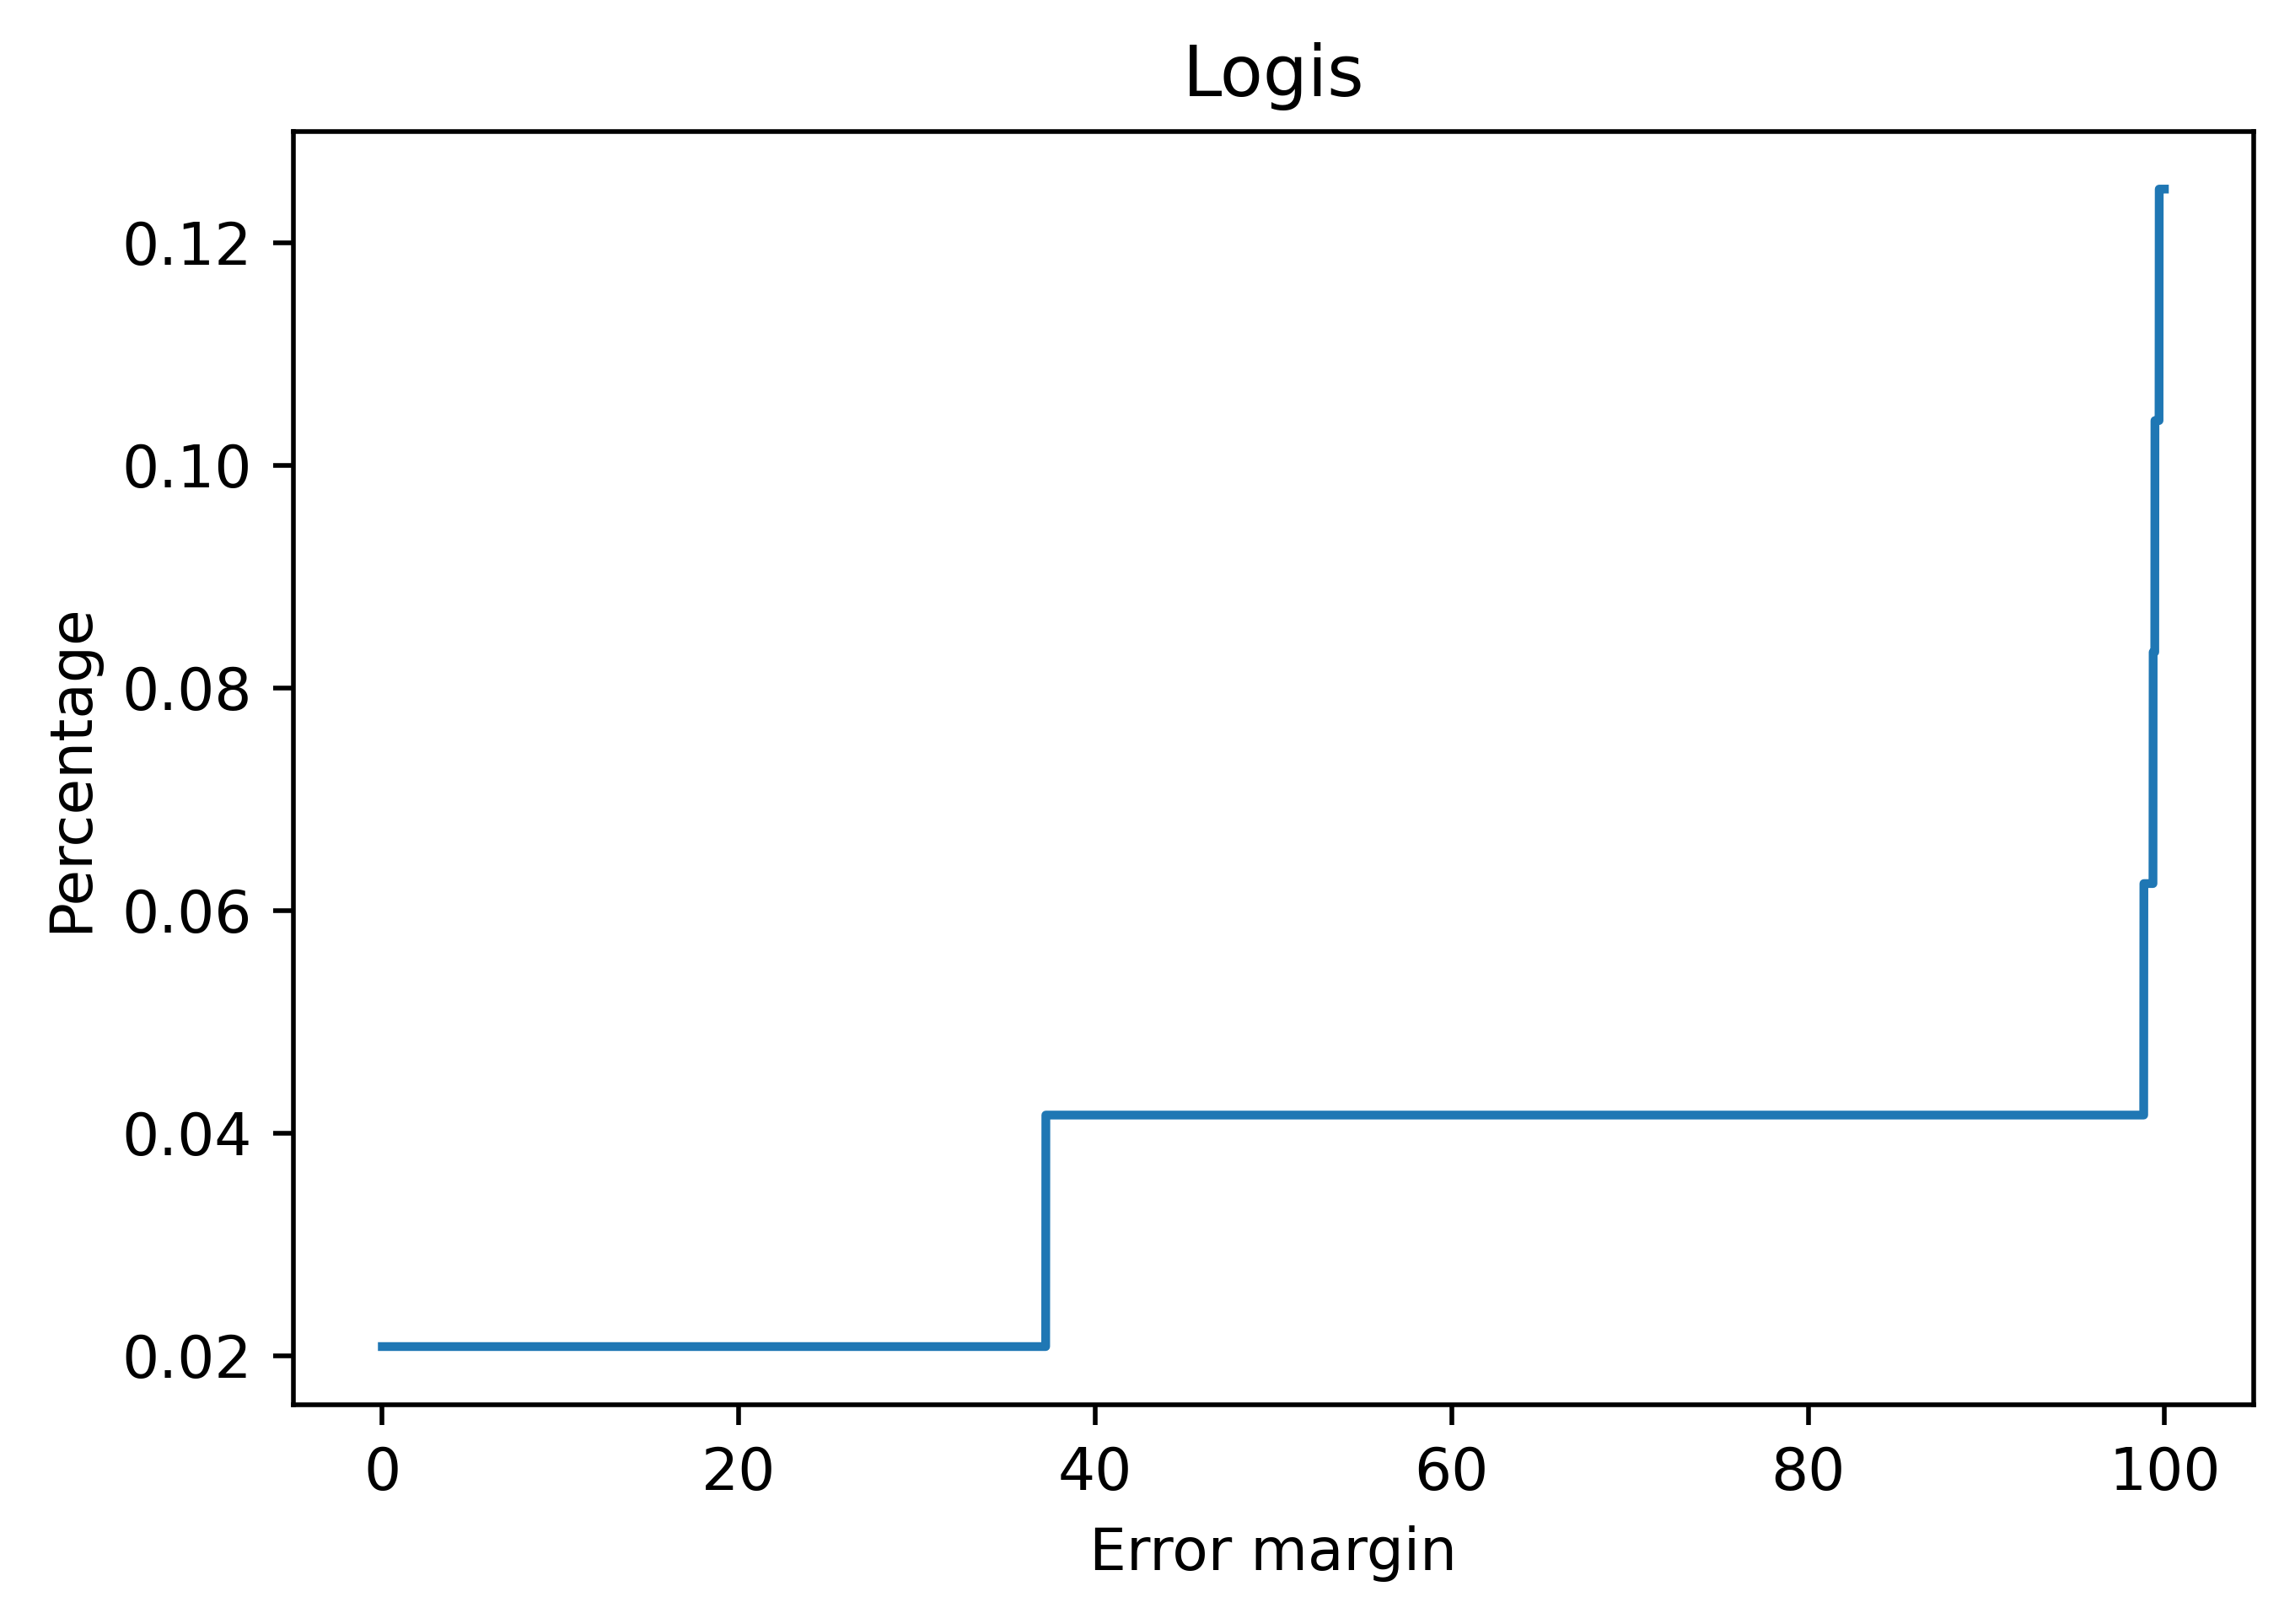

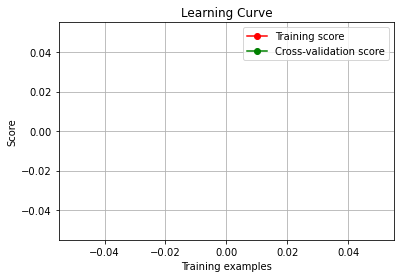









RFR
<class 'str'>
[0 1 0 ... 2 2 5]
[5.68808416 6.54960904 4.44657743 ... 6.06514454 3.23585308 2.38490275] 

r2_score:  0.11556525775934023


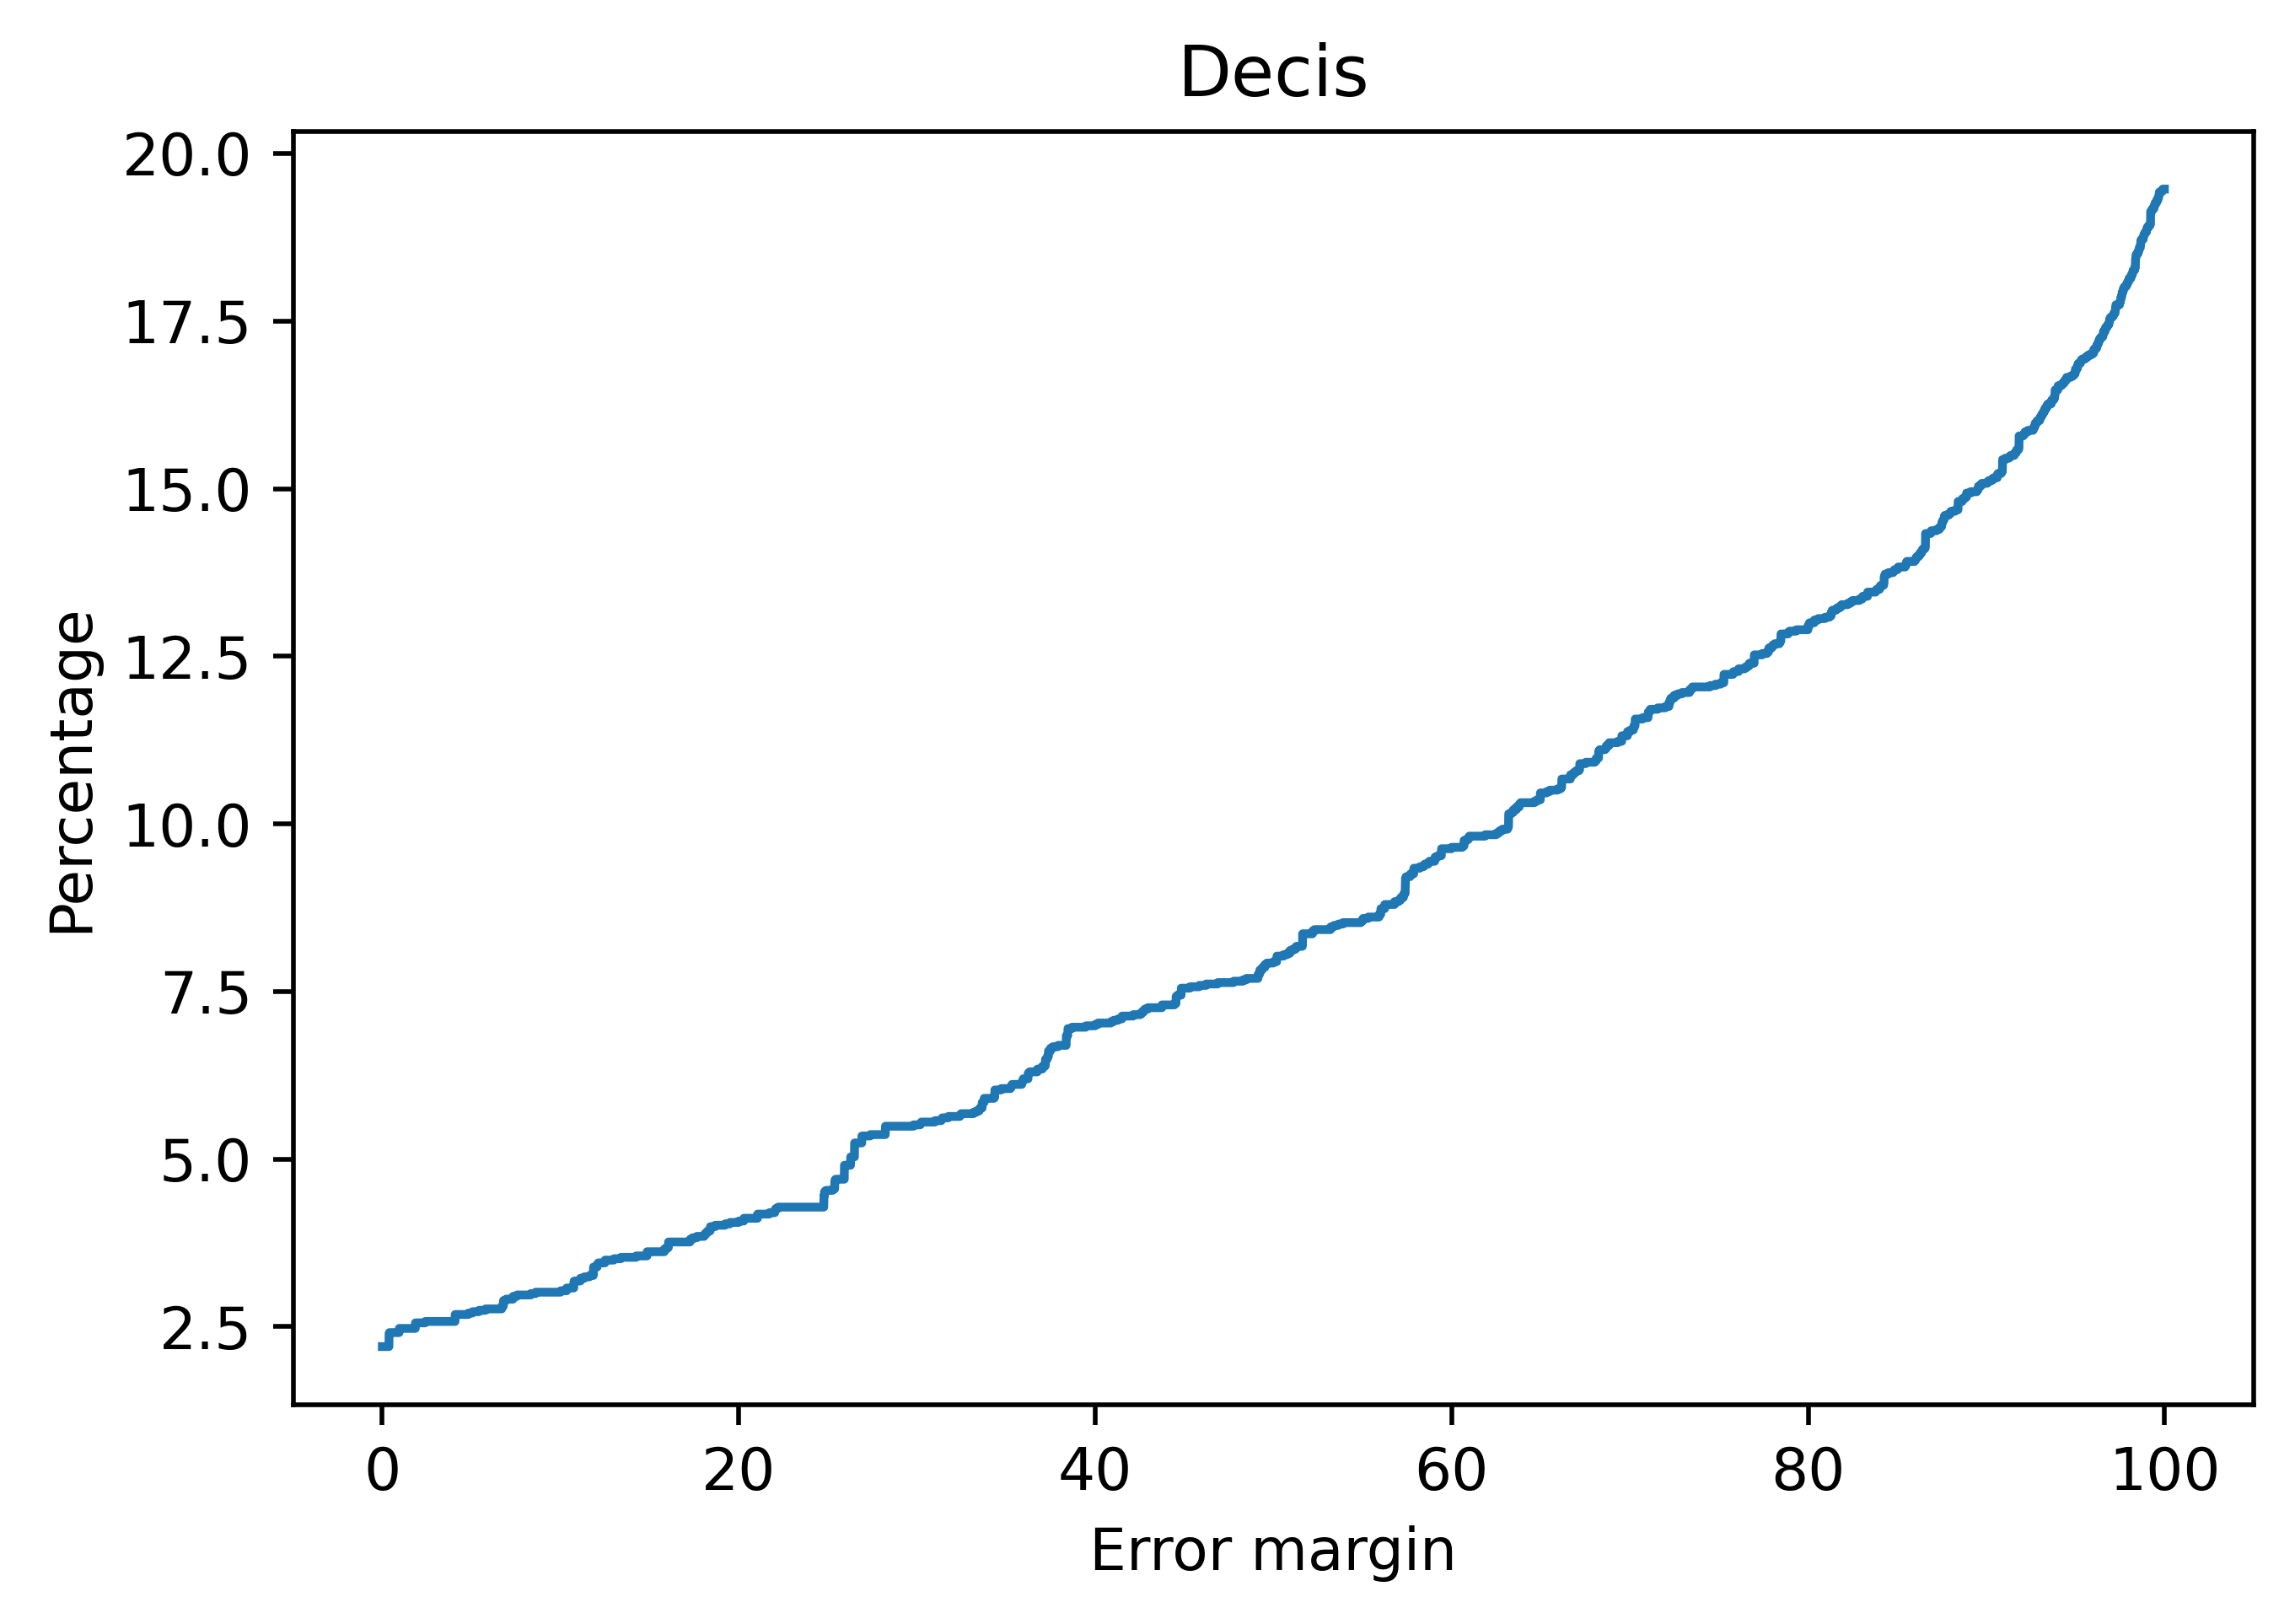

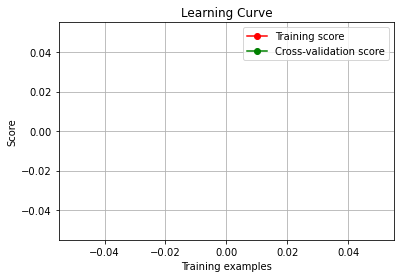









ETR
<class 'str'>
[0 1 2 ... 1 2 2]
[18.5         3.05466238  1.55681818 ...  4.27096774  1.77692308
  4.66013072] 

r2_score:  0.1645323147141673


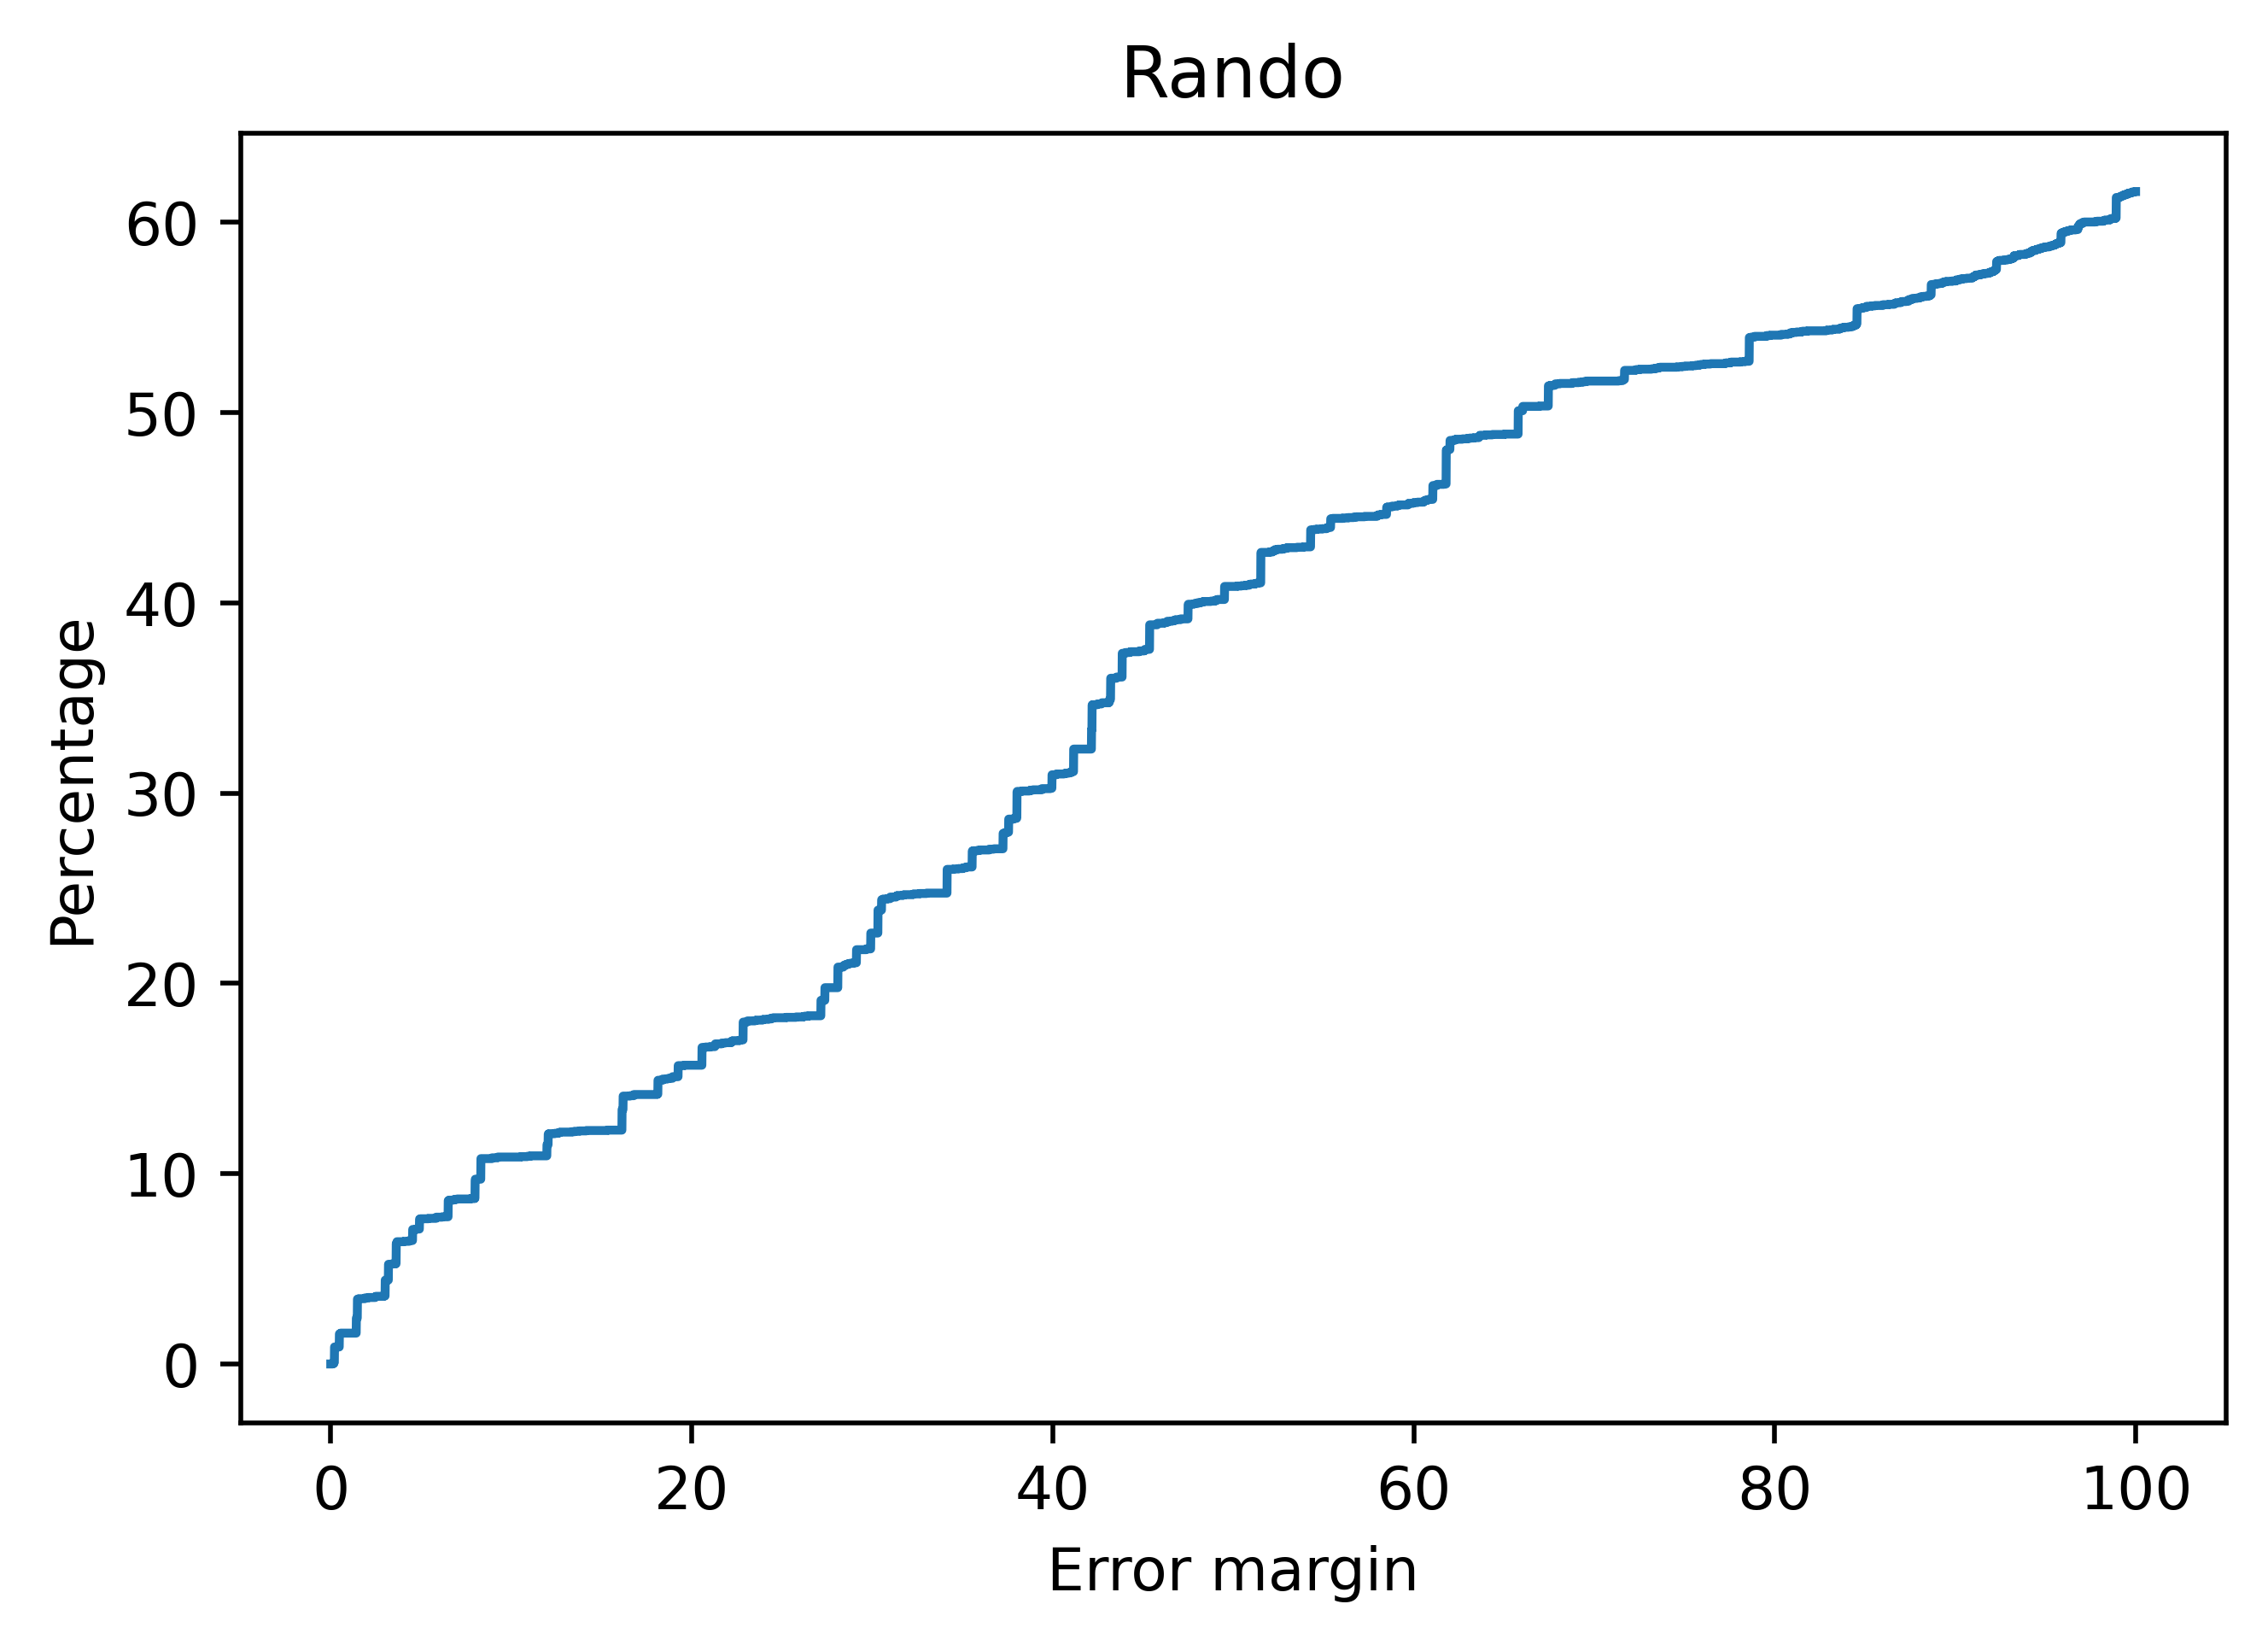

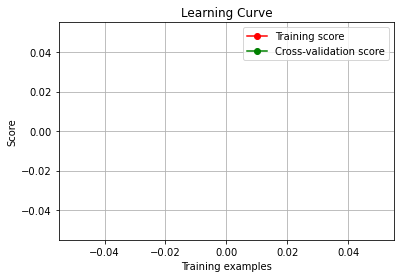









XGB
<class 'str'>
[0 0 0 ... 0 0 2]
[ 8.487682    0.69668114  0.96069634 ...  0.893249   12.098422
  0.80413306] 

r2_score:  0.08632060940155128


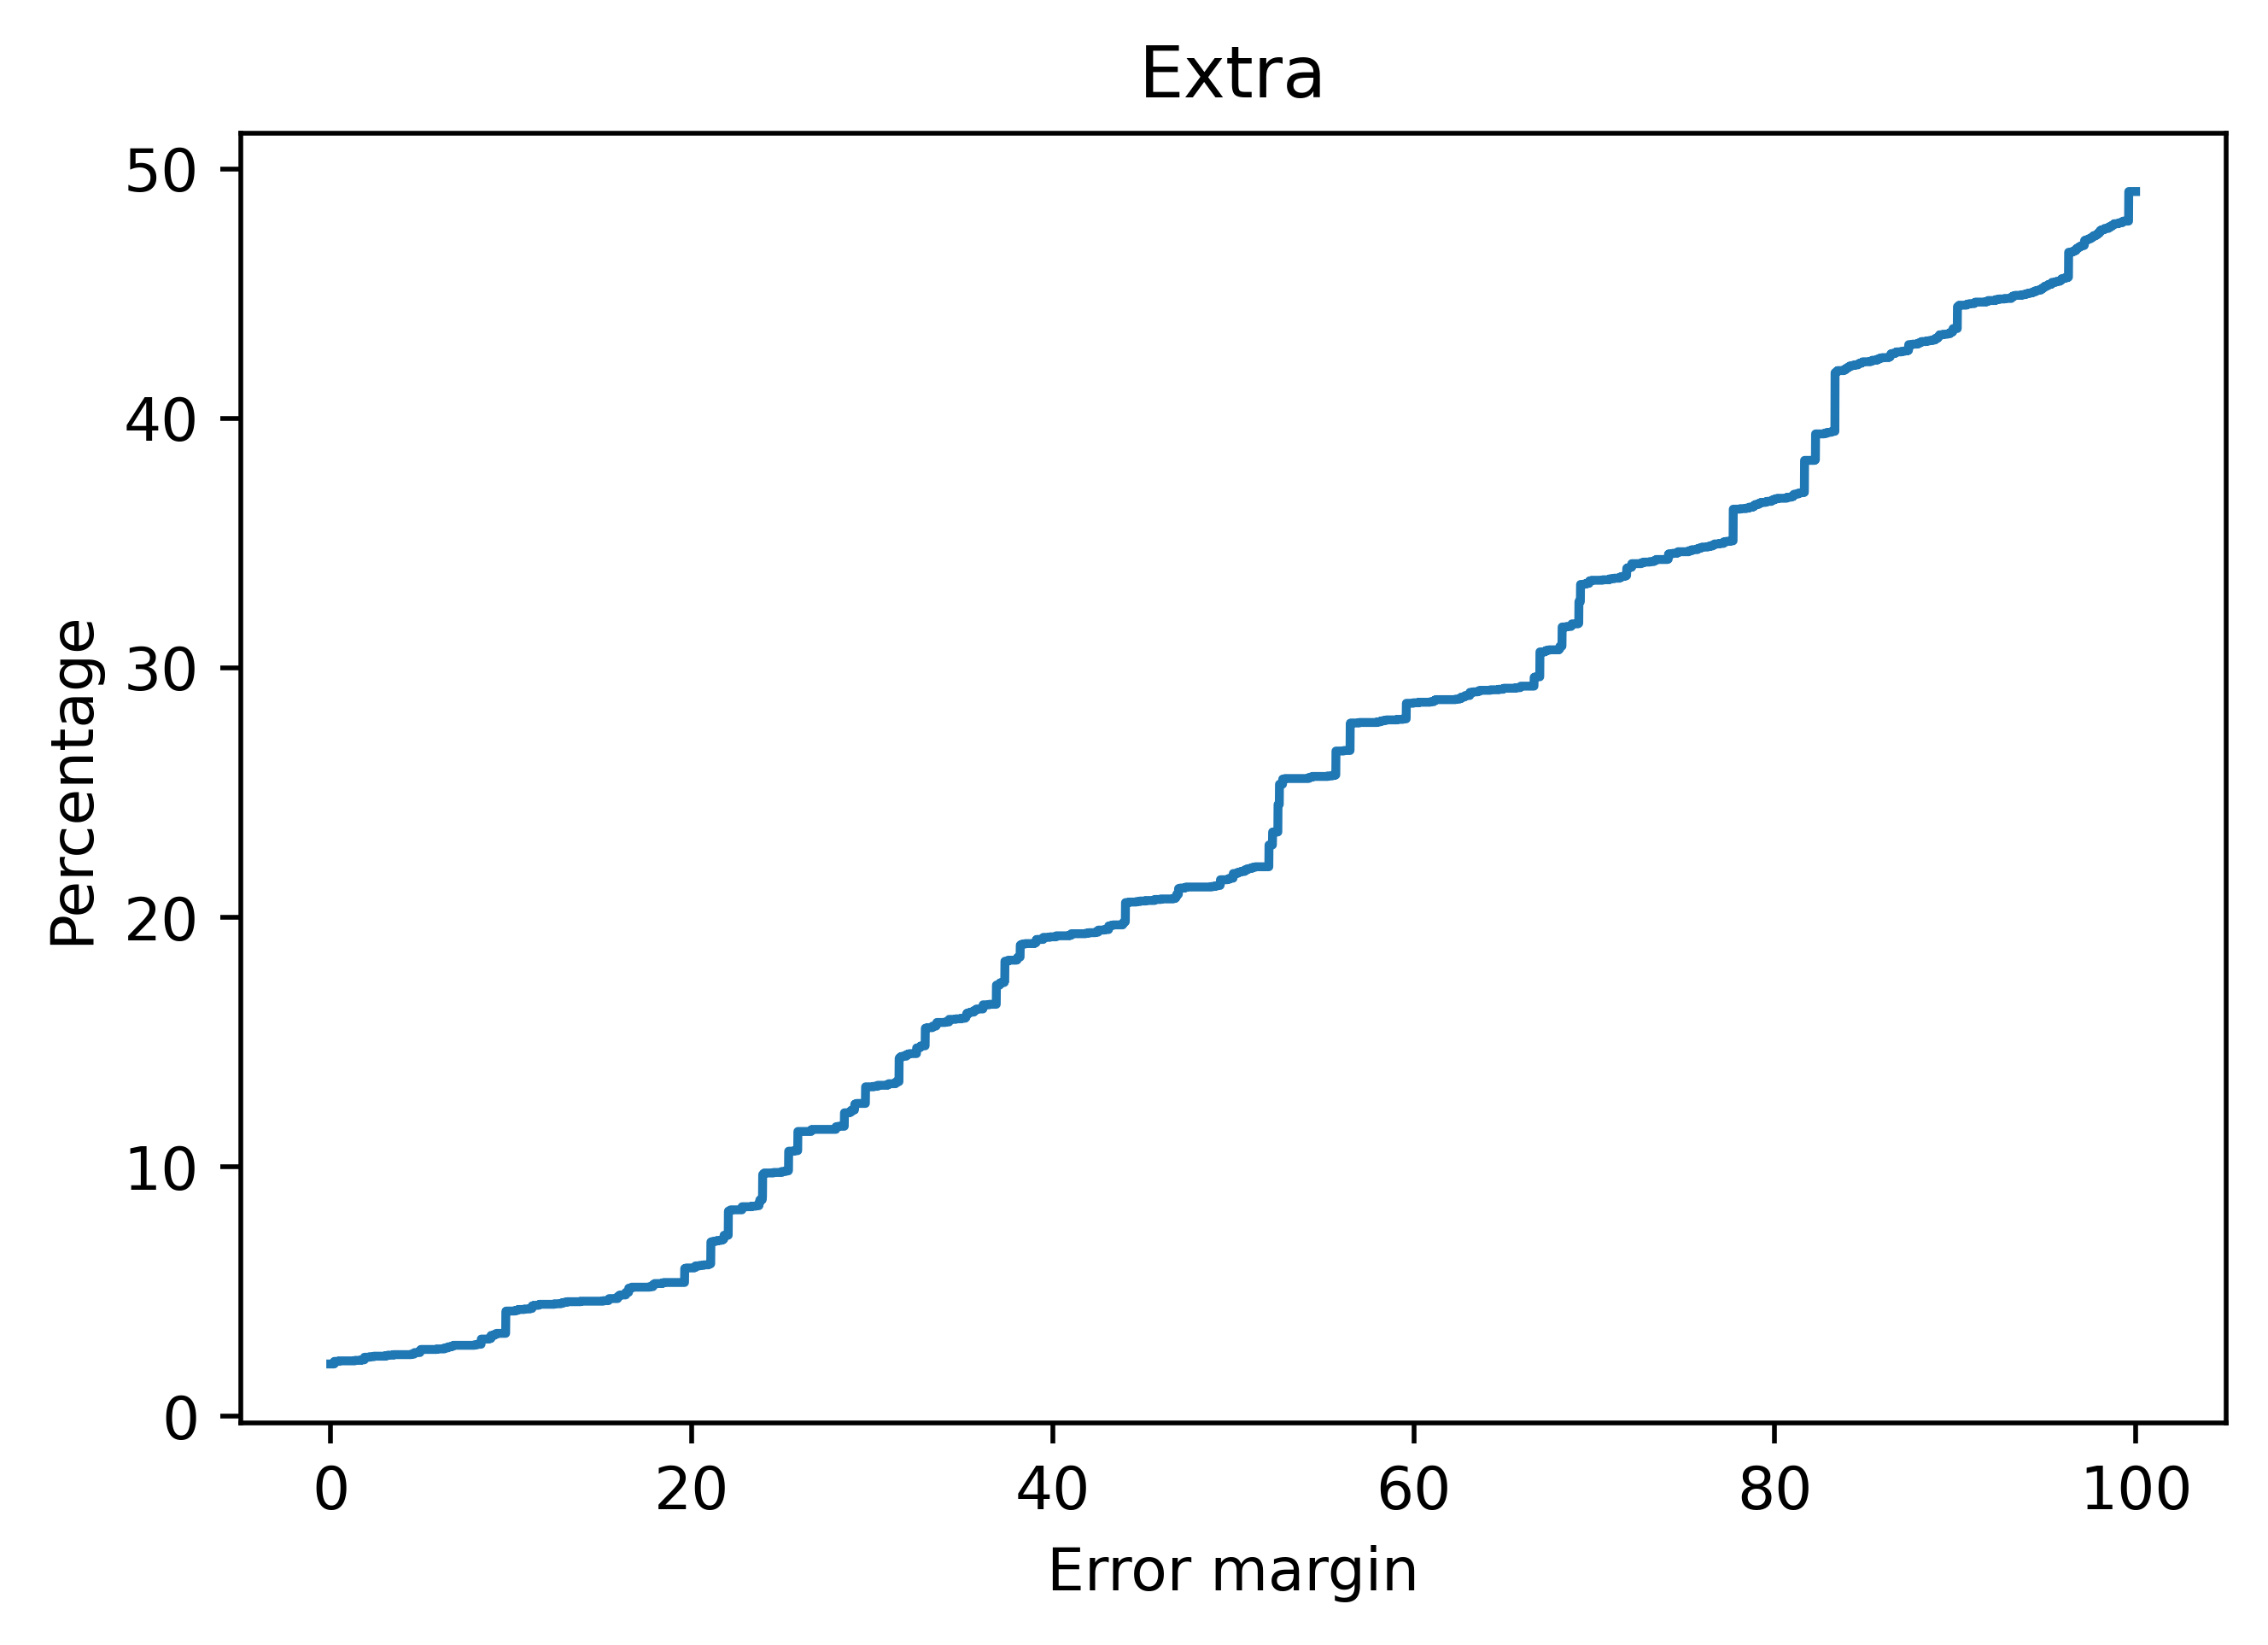

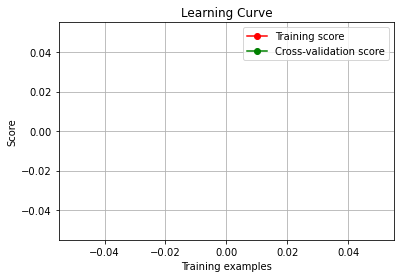









LGBM
<class 'str'>
[0 0 1 ... 1 4 0]
[ 1.51835155  1.05086472  5.15407488 ... 22.82021533  1.05086472
  1.76105633] 

r2_score:  0.22403958371008104


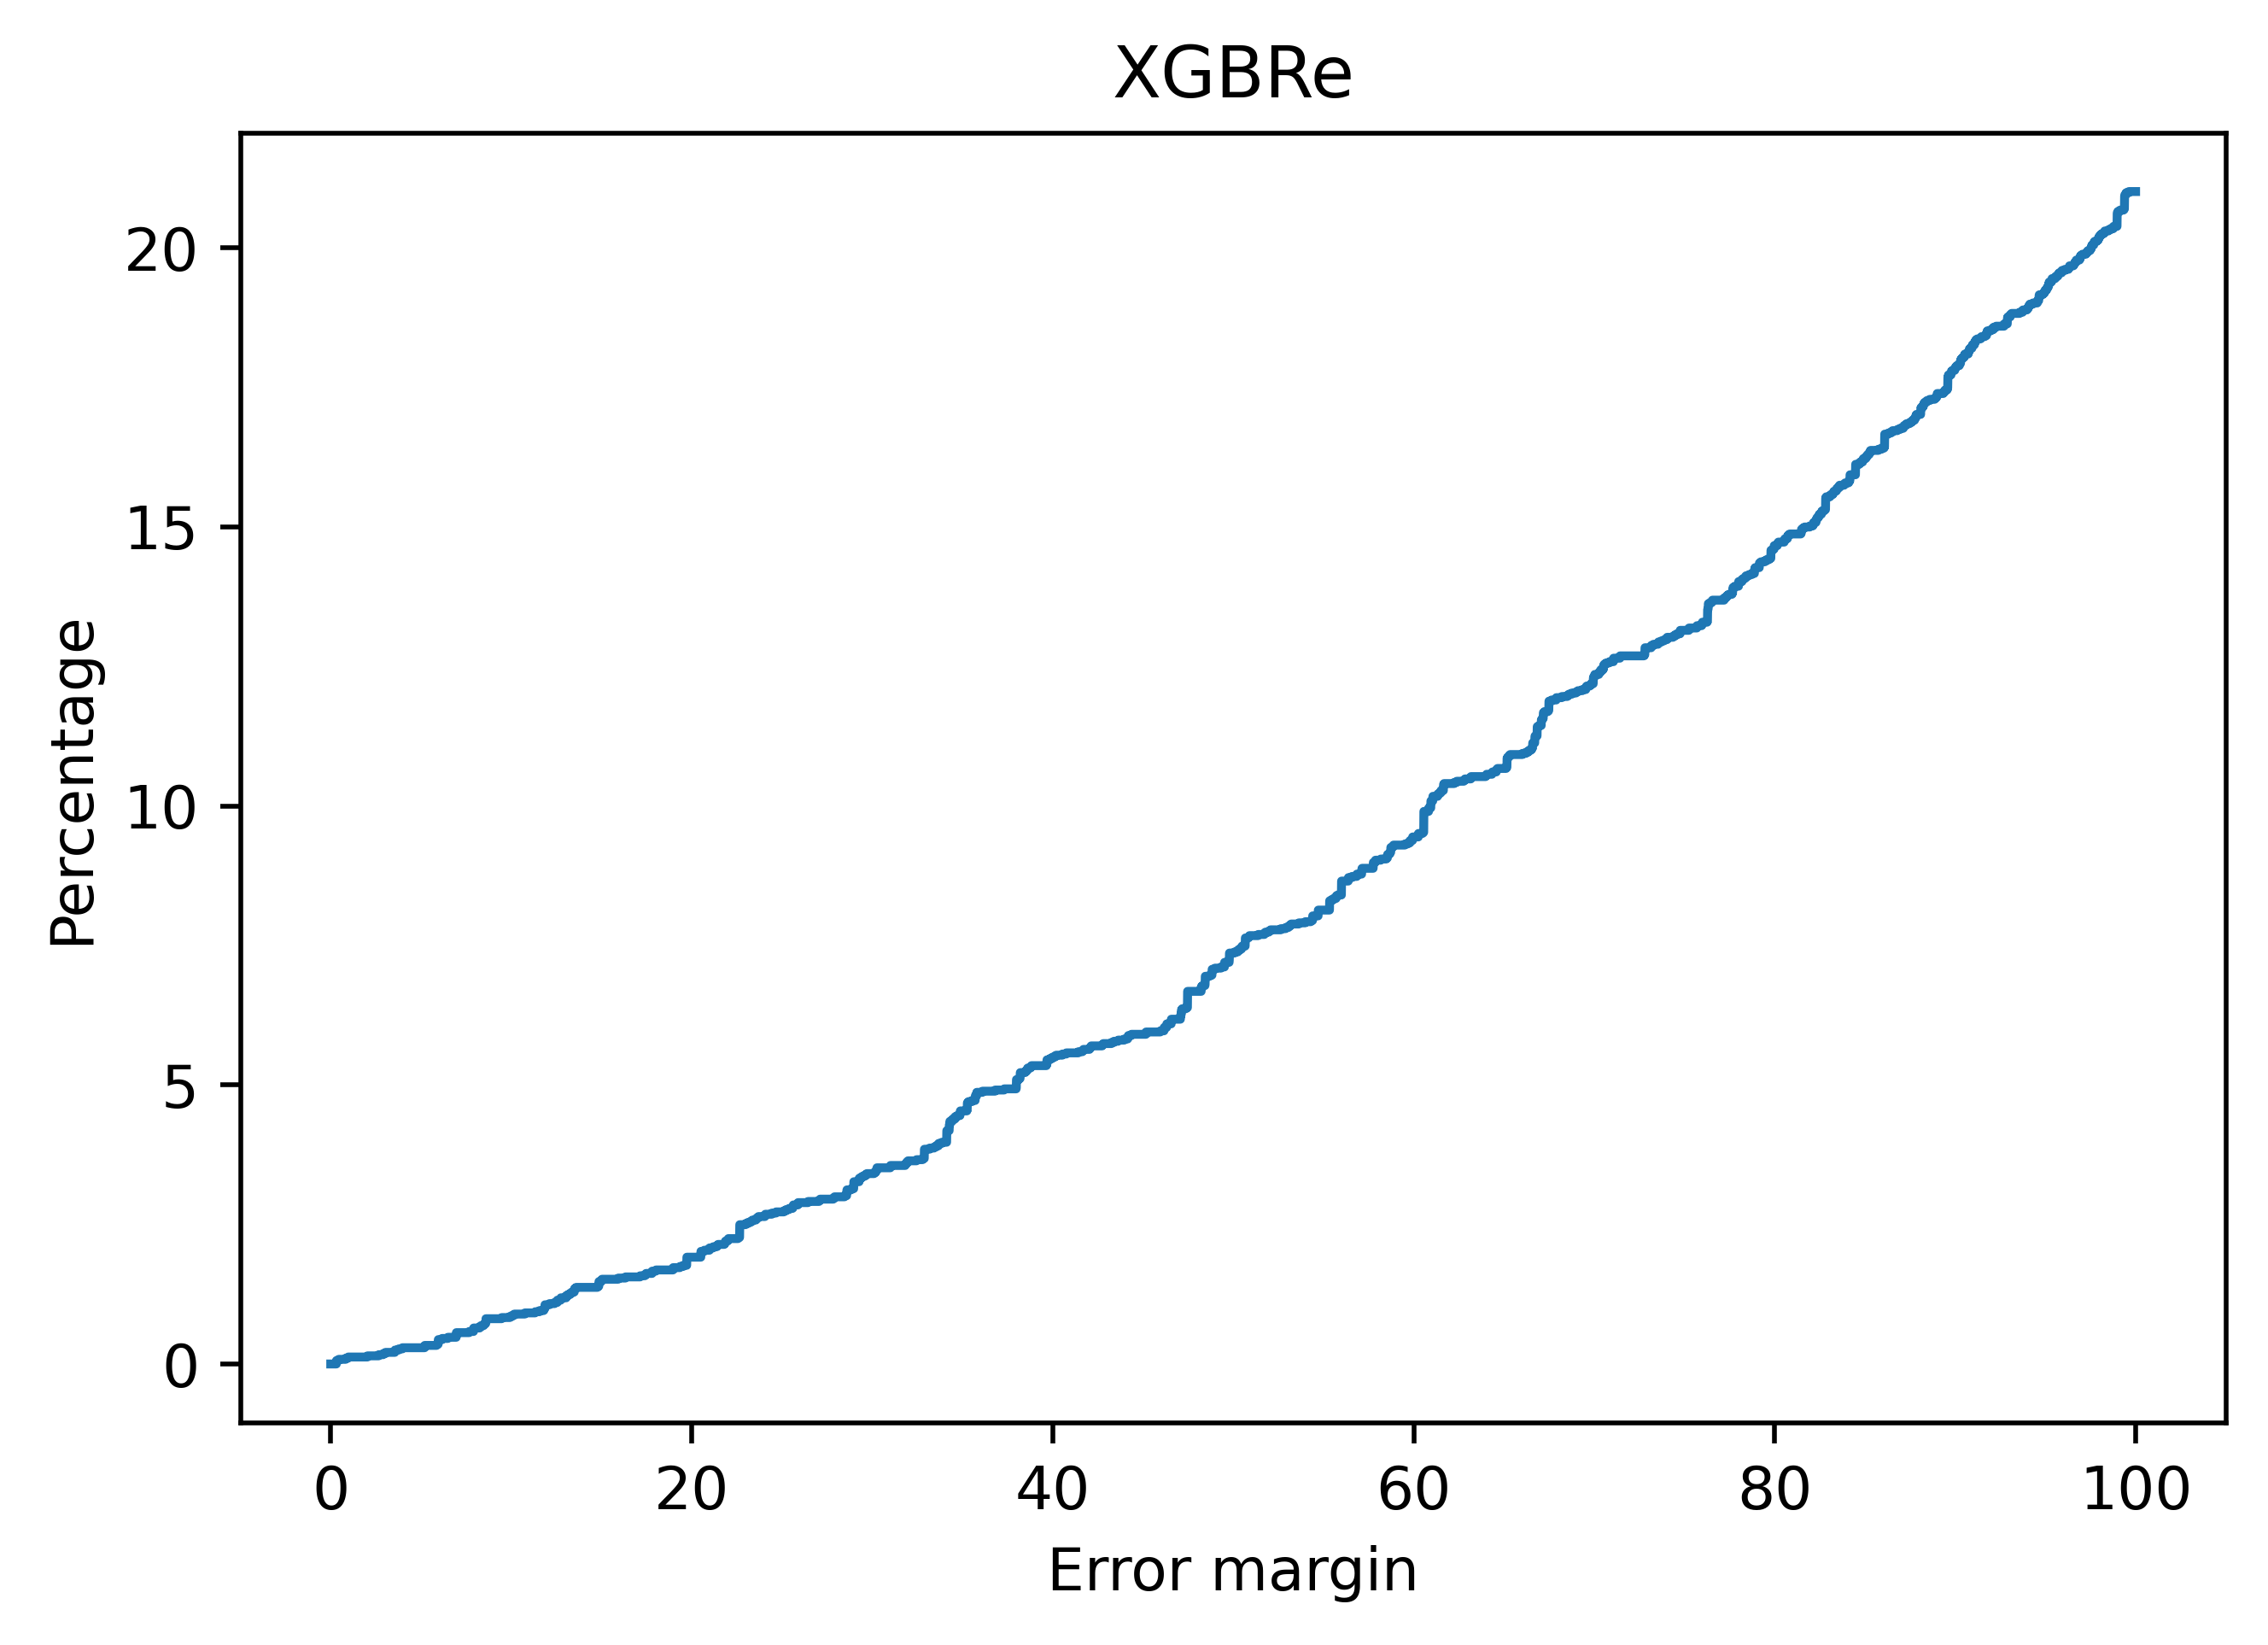

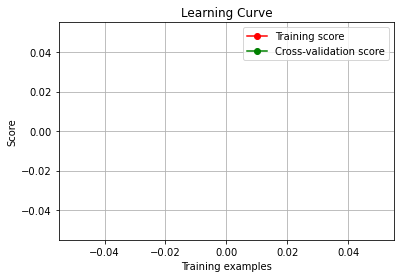









KNR
<class 'str'>
[0 1 0 ... 0 3 0]
[ 0.2 22.8  0.  ...  0.   0.4  0. ] 

r2_score:  0.20031722334260982


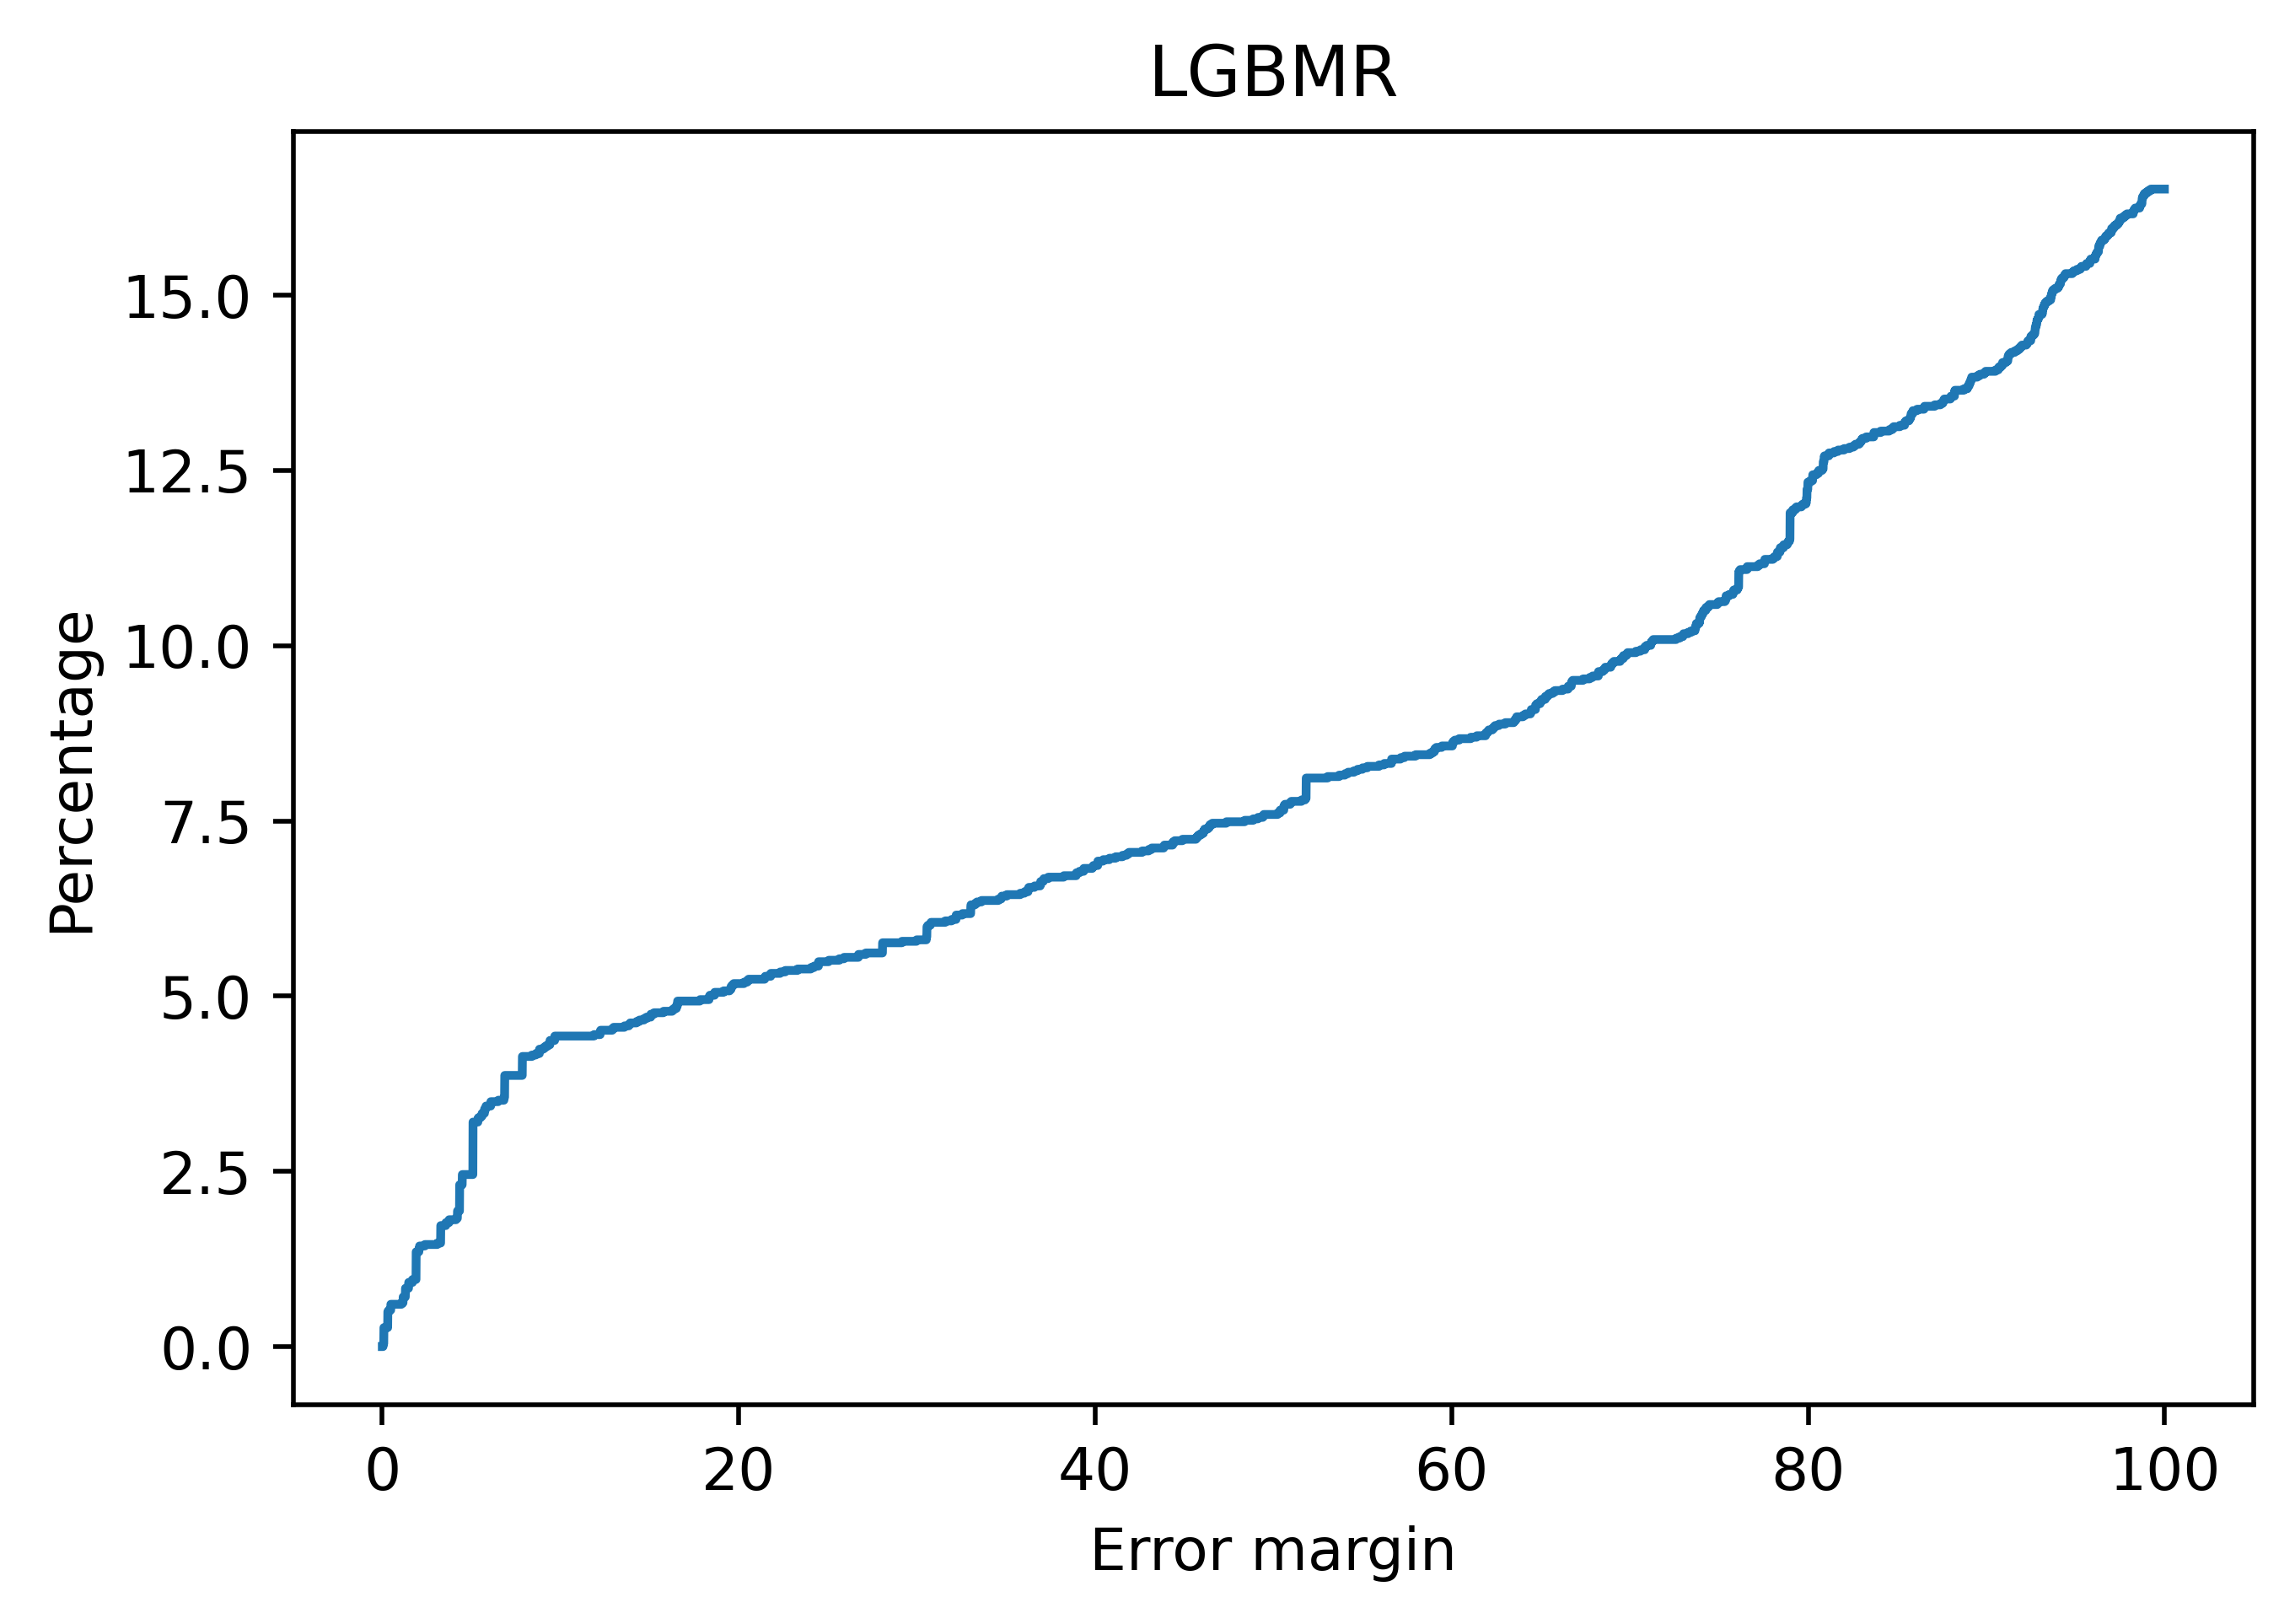

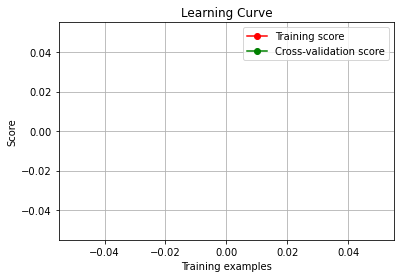









GBR
<class 'str'>
[0 0 0 ... 0 0 0]
[ 1.58284333  0.84215127  3.24352556 ...  5.76581781  1.16208848
 29.85881177] 

r2_score:  0.2065192988740988


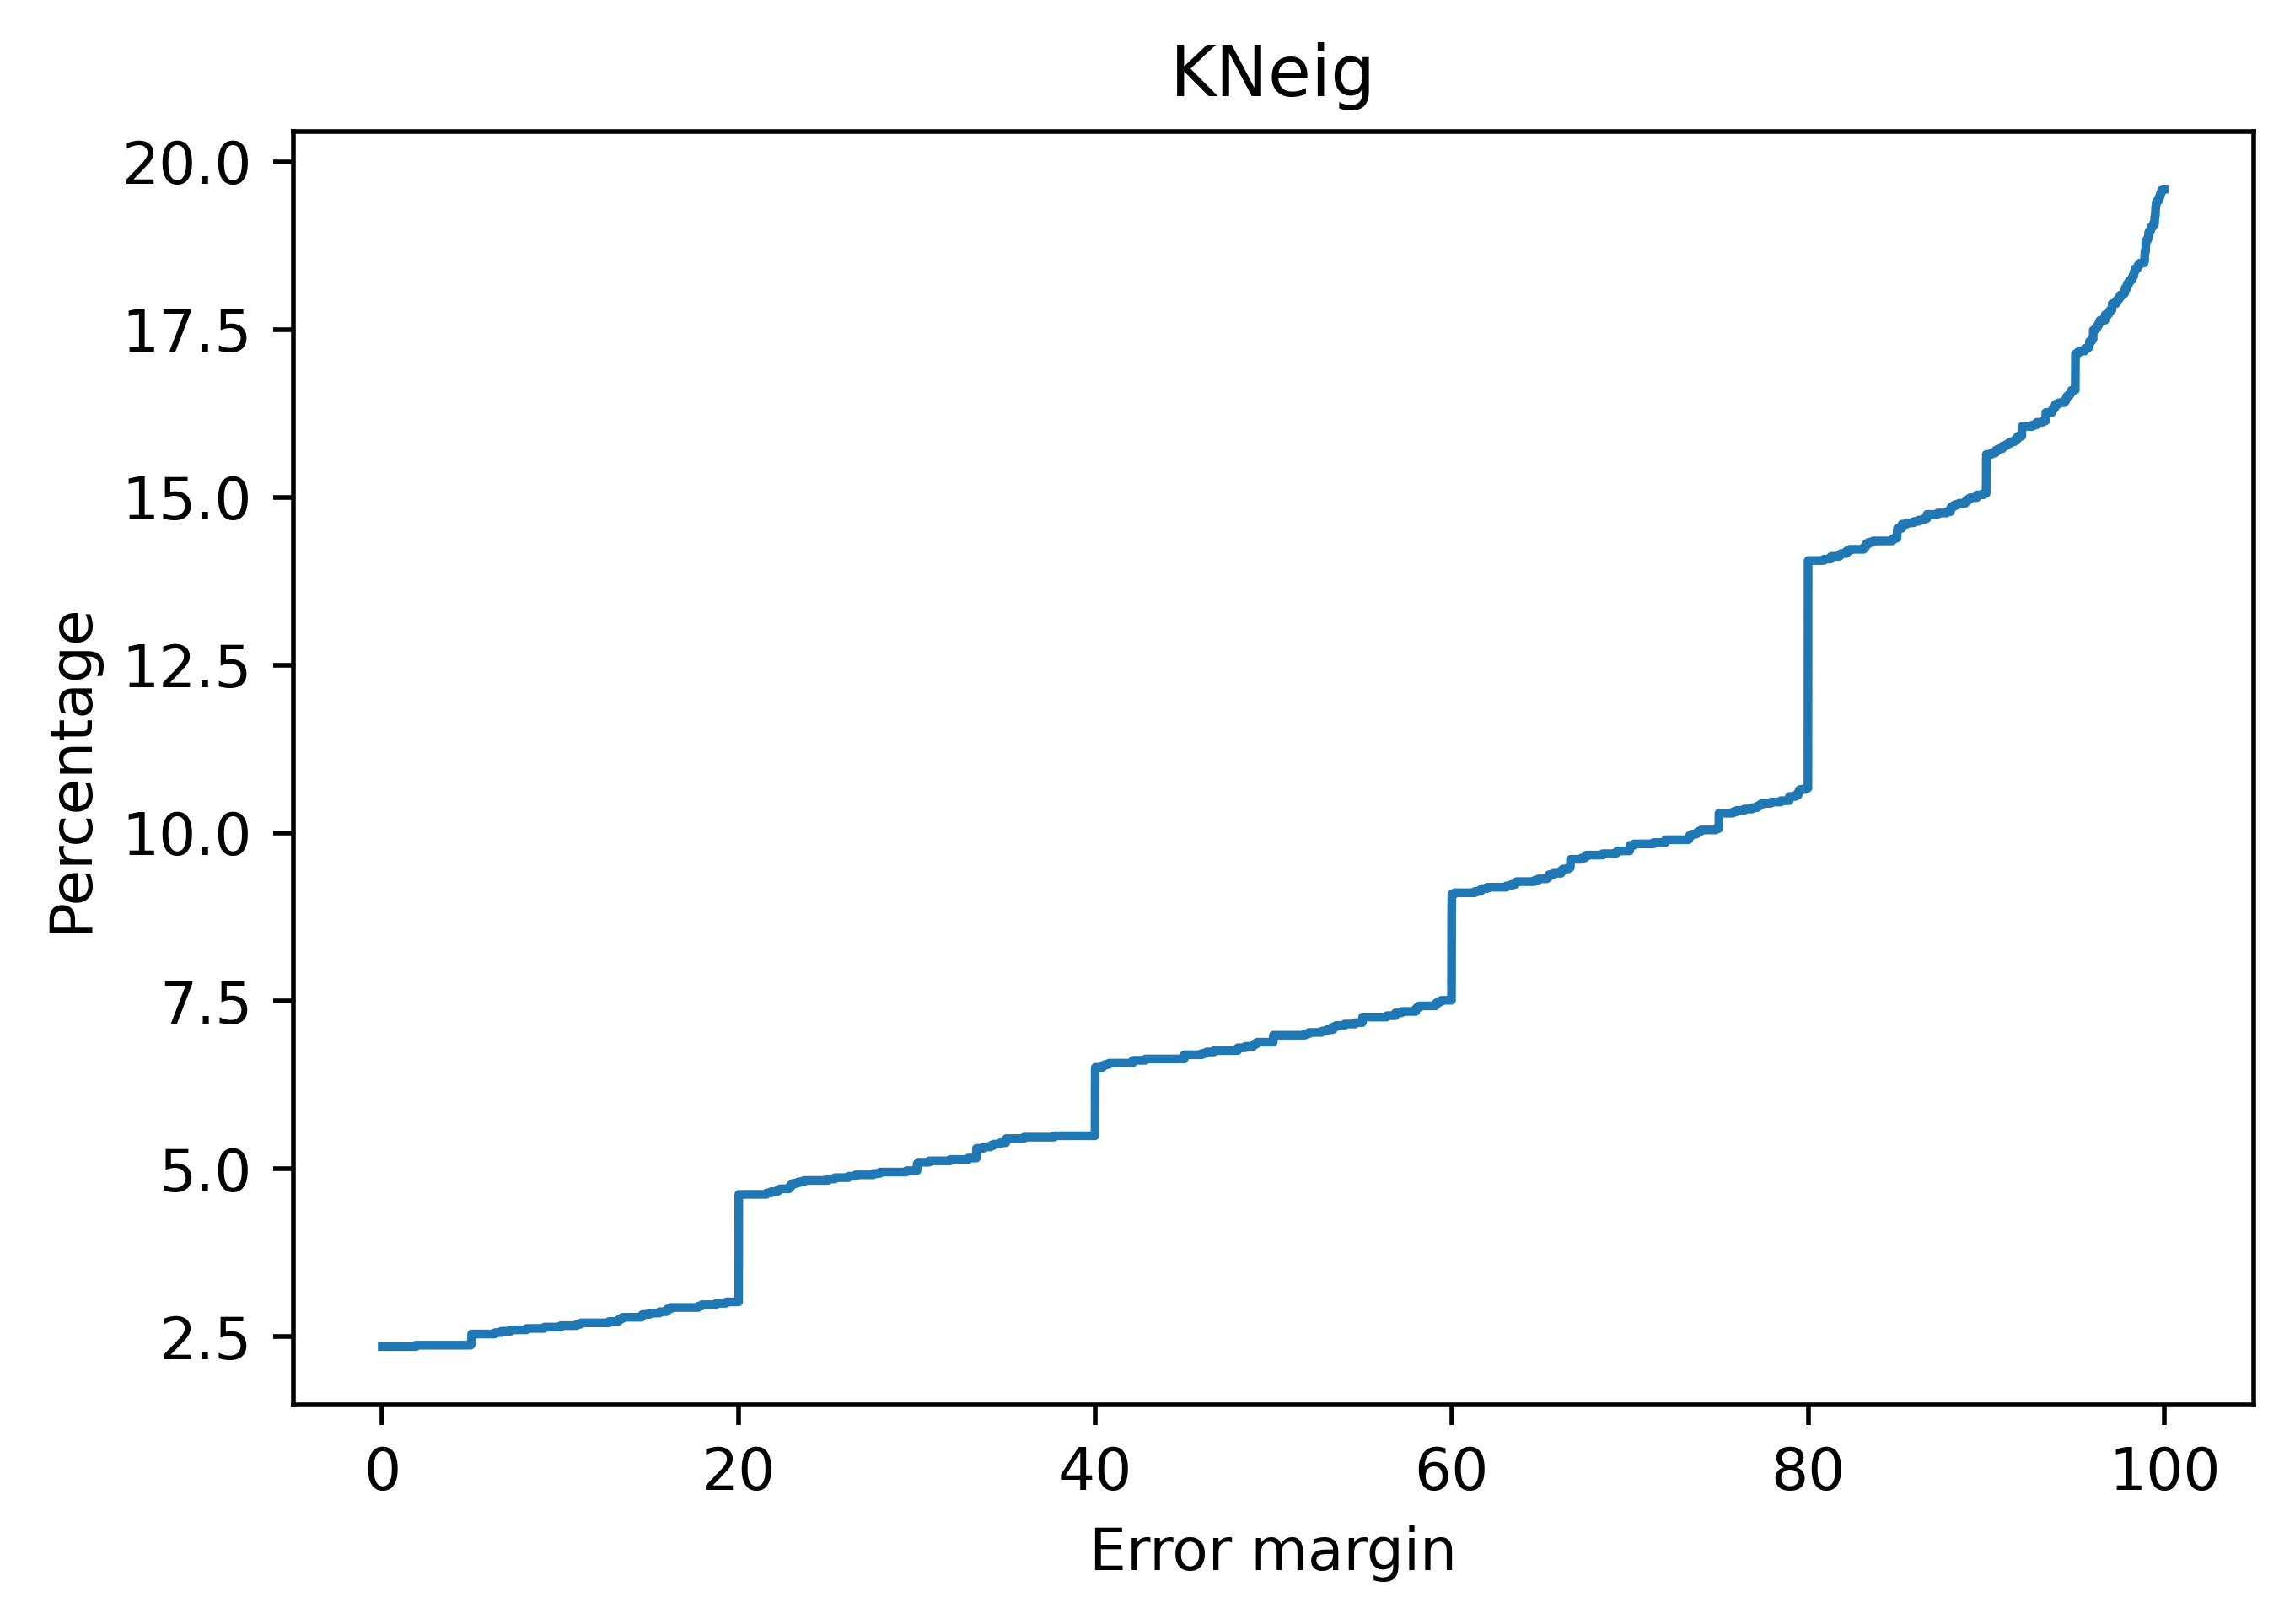

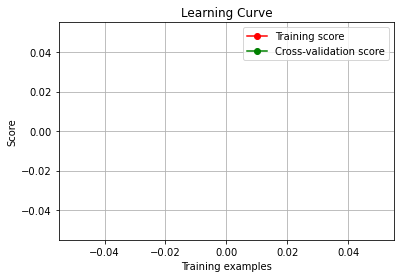









LSVC
<class 'str'>
[0 0 0 ... 2 1 0]
[13 13 13 ... 13 13 13] 

r2_score:  -0.07154205786495882


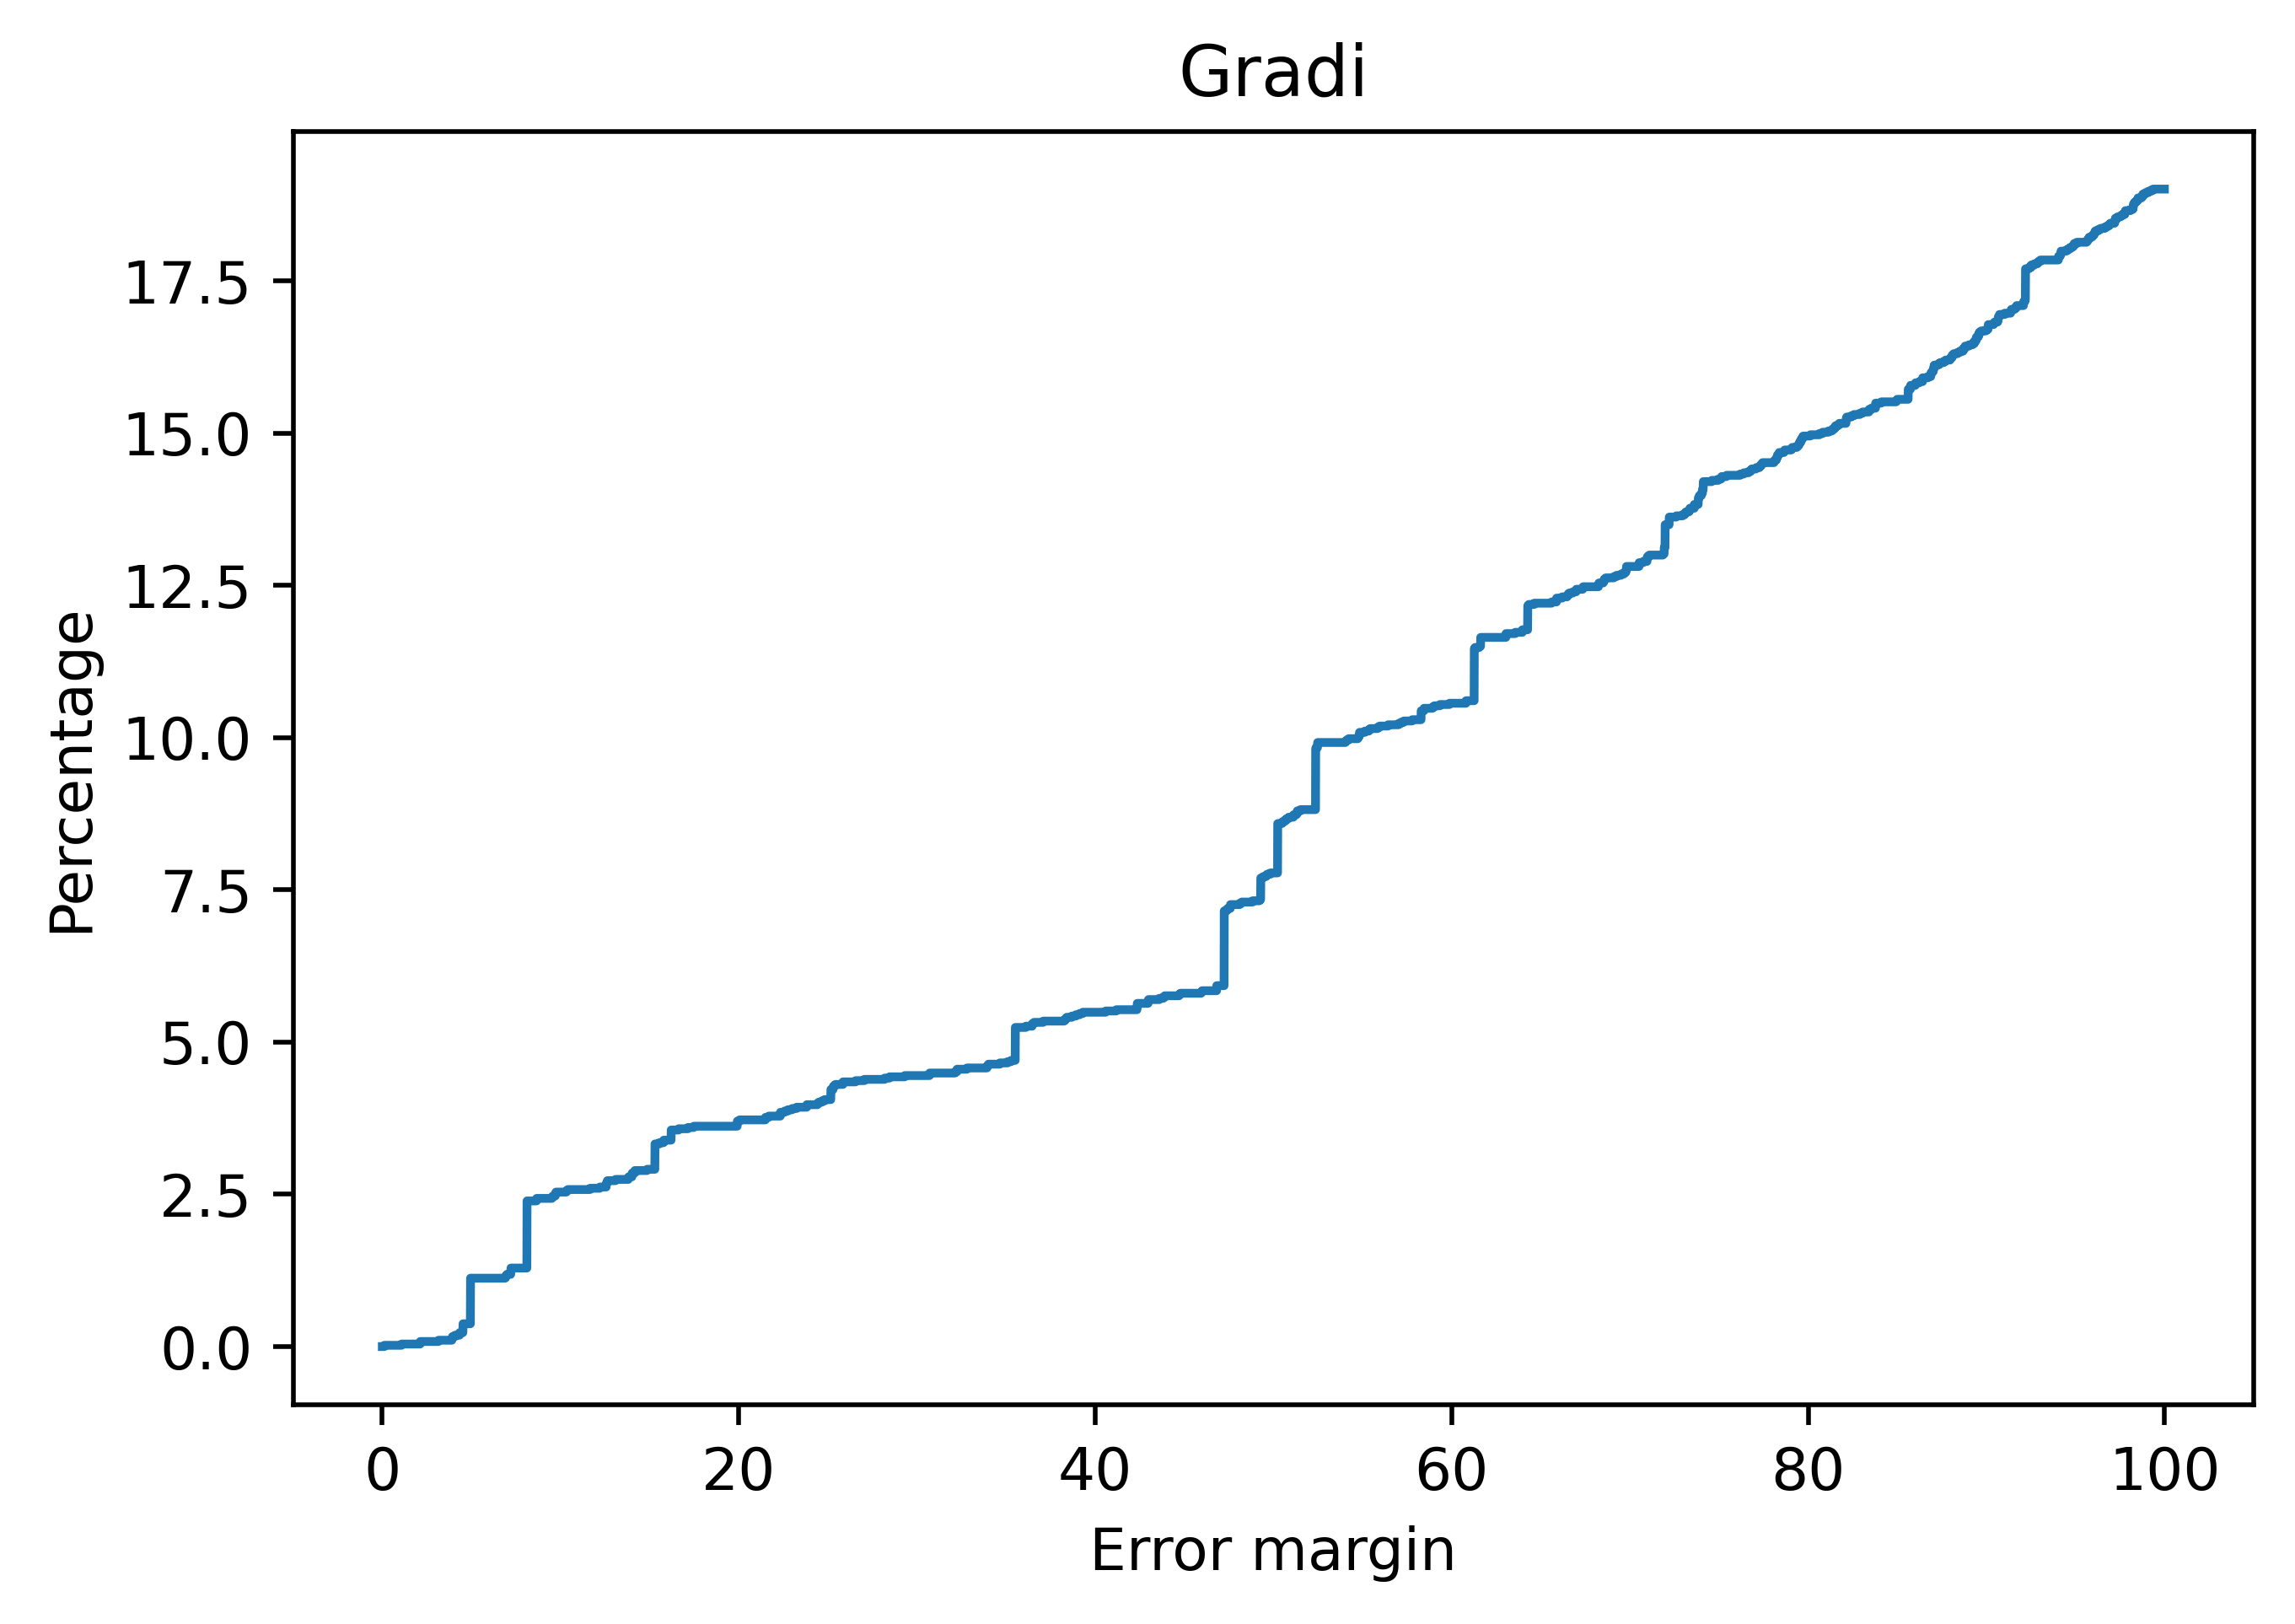

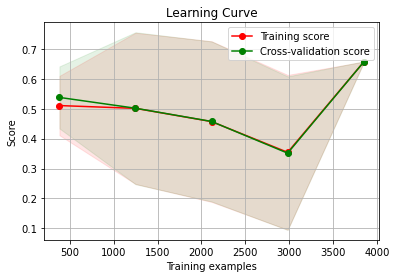

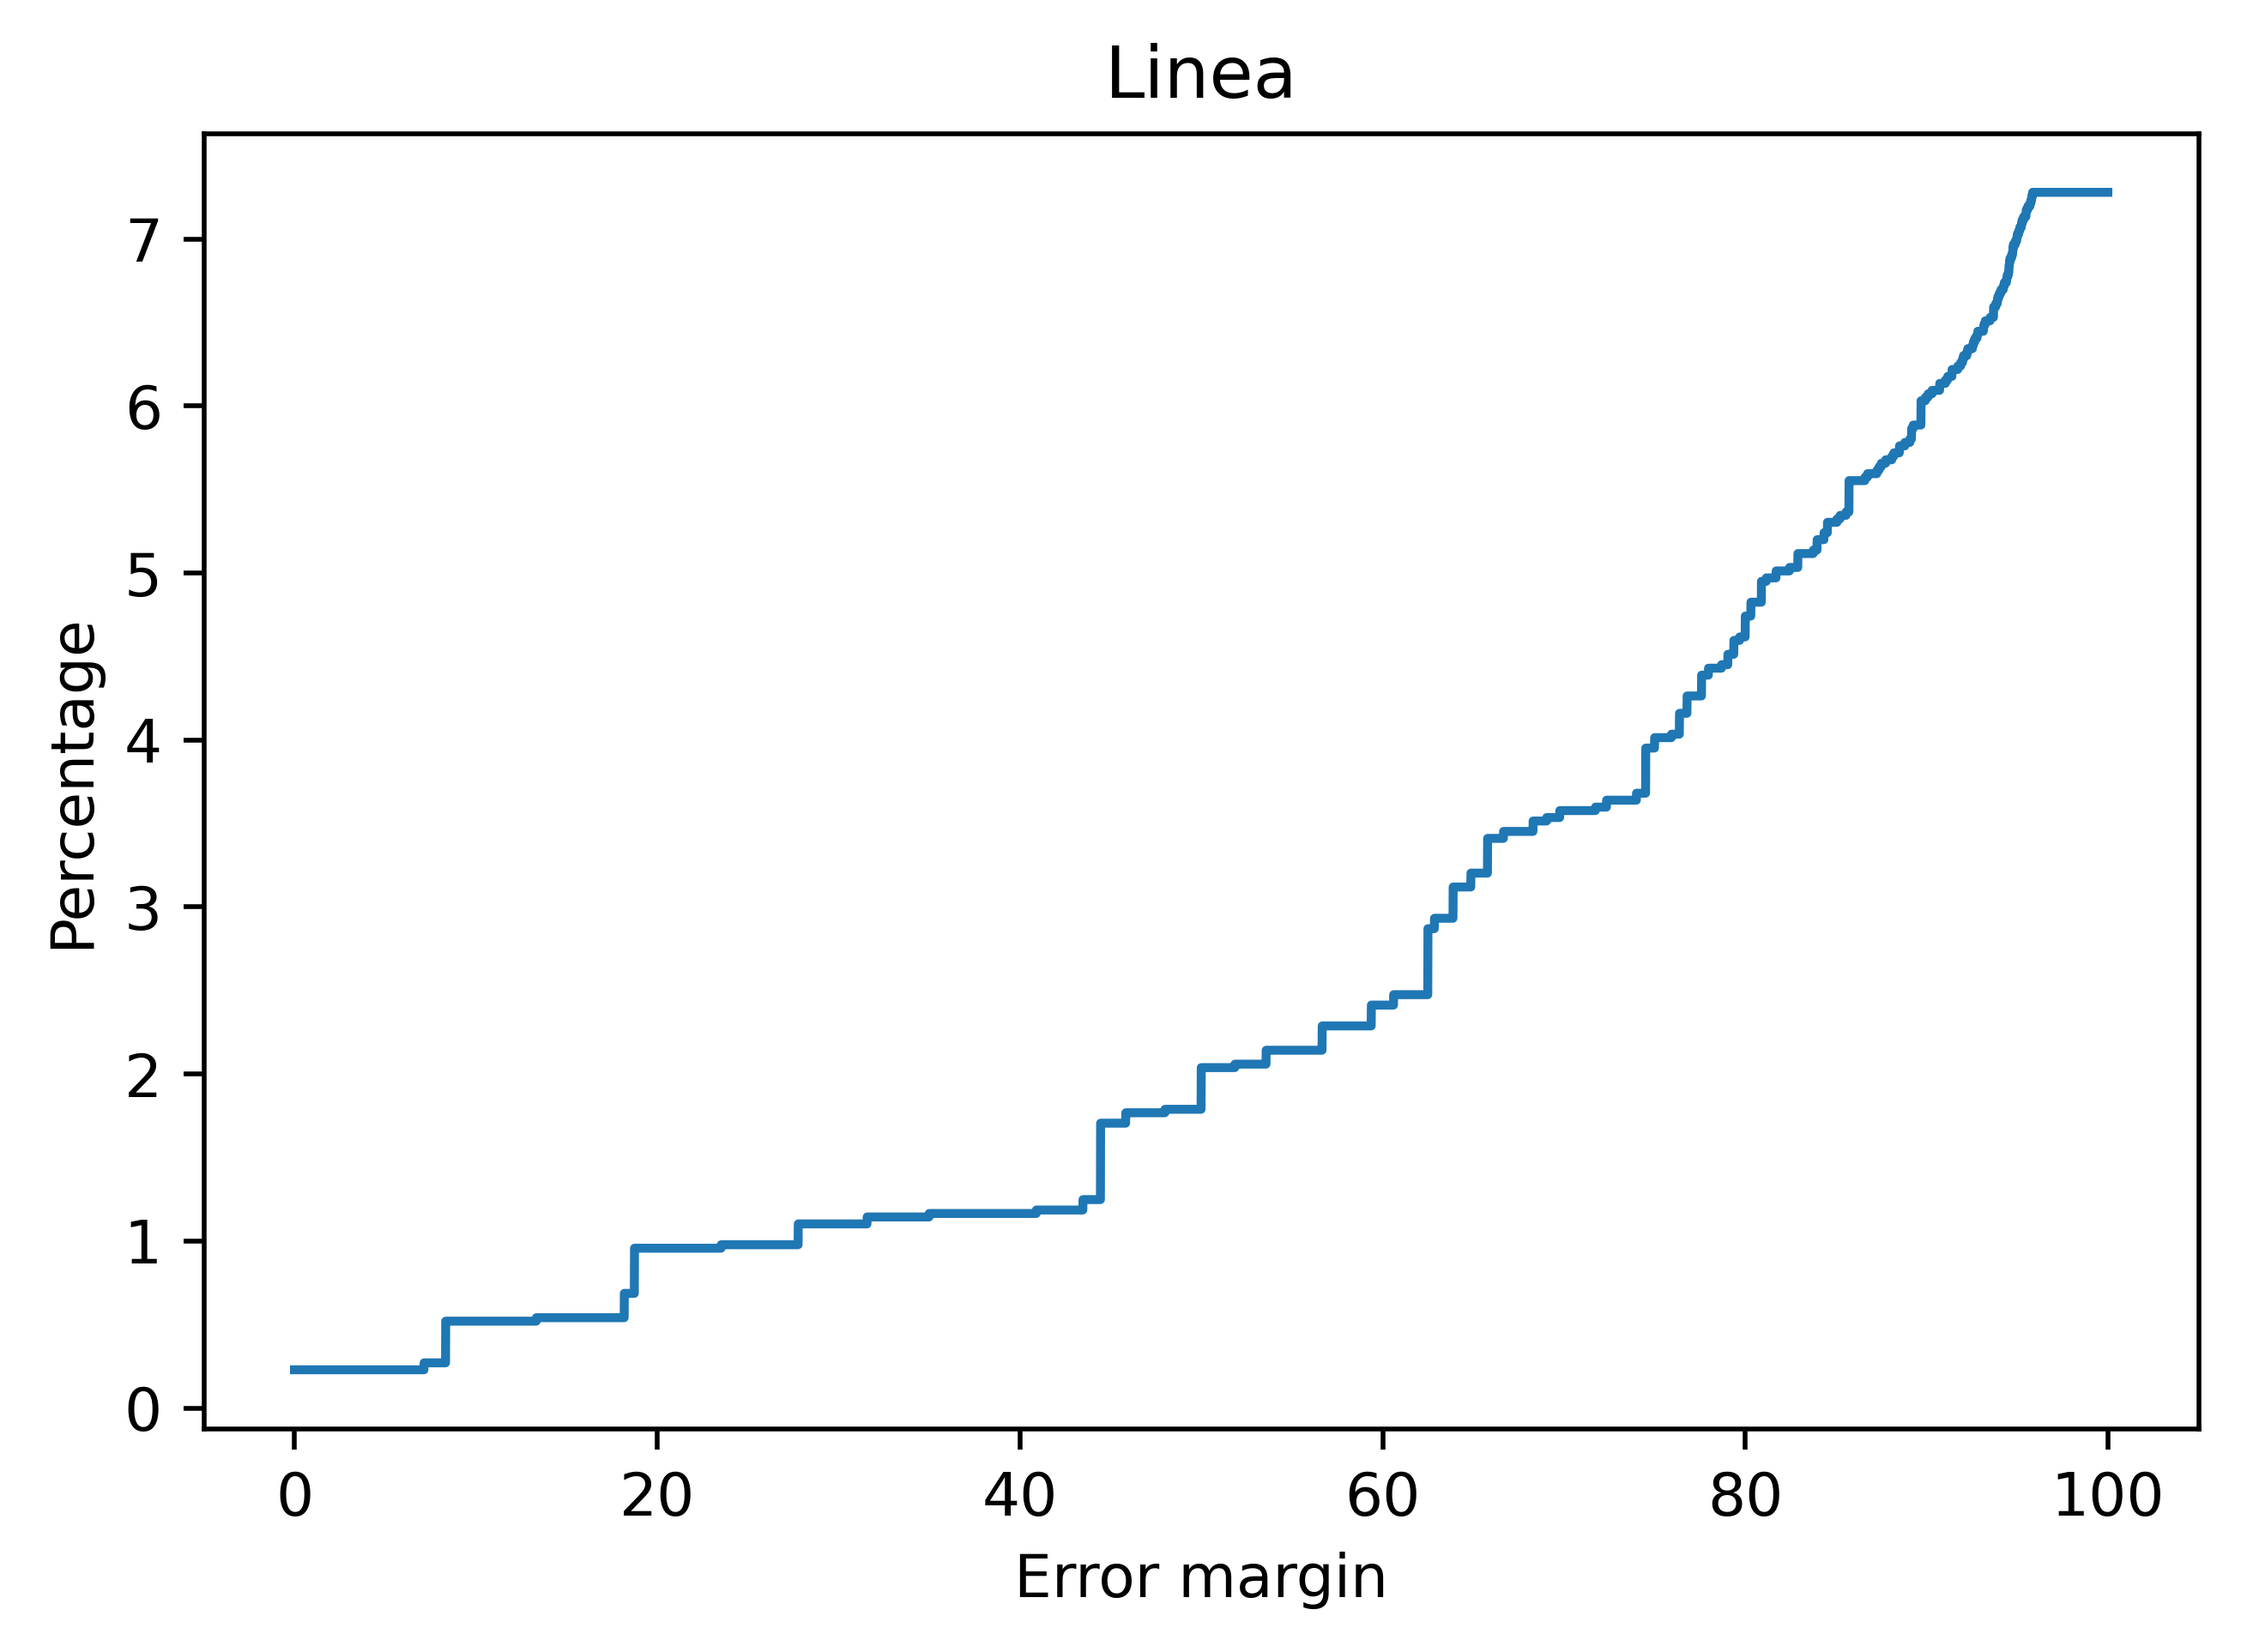

In [55]:
for model in models.items():
    s = str(model[0])
    print((str(model[0]))[:19])
    print(type(s))
    #print(s[:6])
    run_model(model[1],AndroidPyt4,metrics['f1_score'])

LGR
<class 'str'>
[0 1 0 ... 1 7 6]
[1 1 1 ... 1 1 1] 

r2_score:  -0.05634961030705199


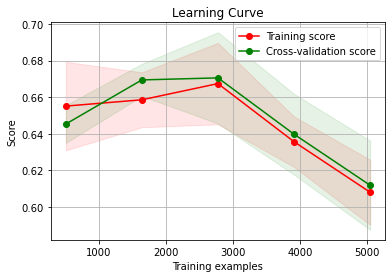









DTR
<class 'str'>
[0 1 2 ... 8 2 2]
[ 3.          6.77294686  7.43604651 ... 11.26666667  3.
  6.31914894] 

r2_score:  -0.20709497167838964


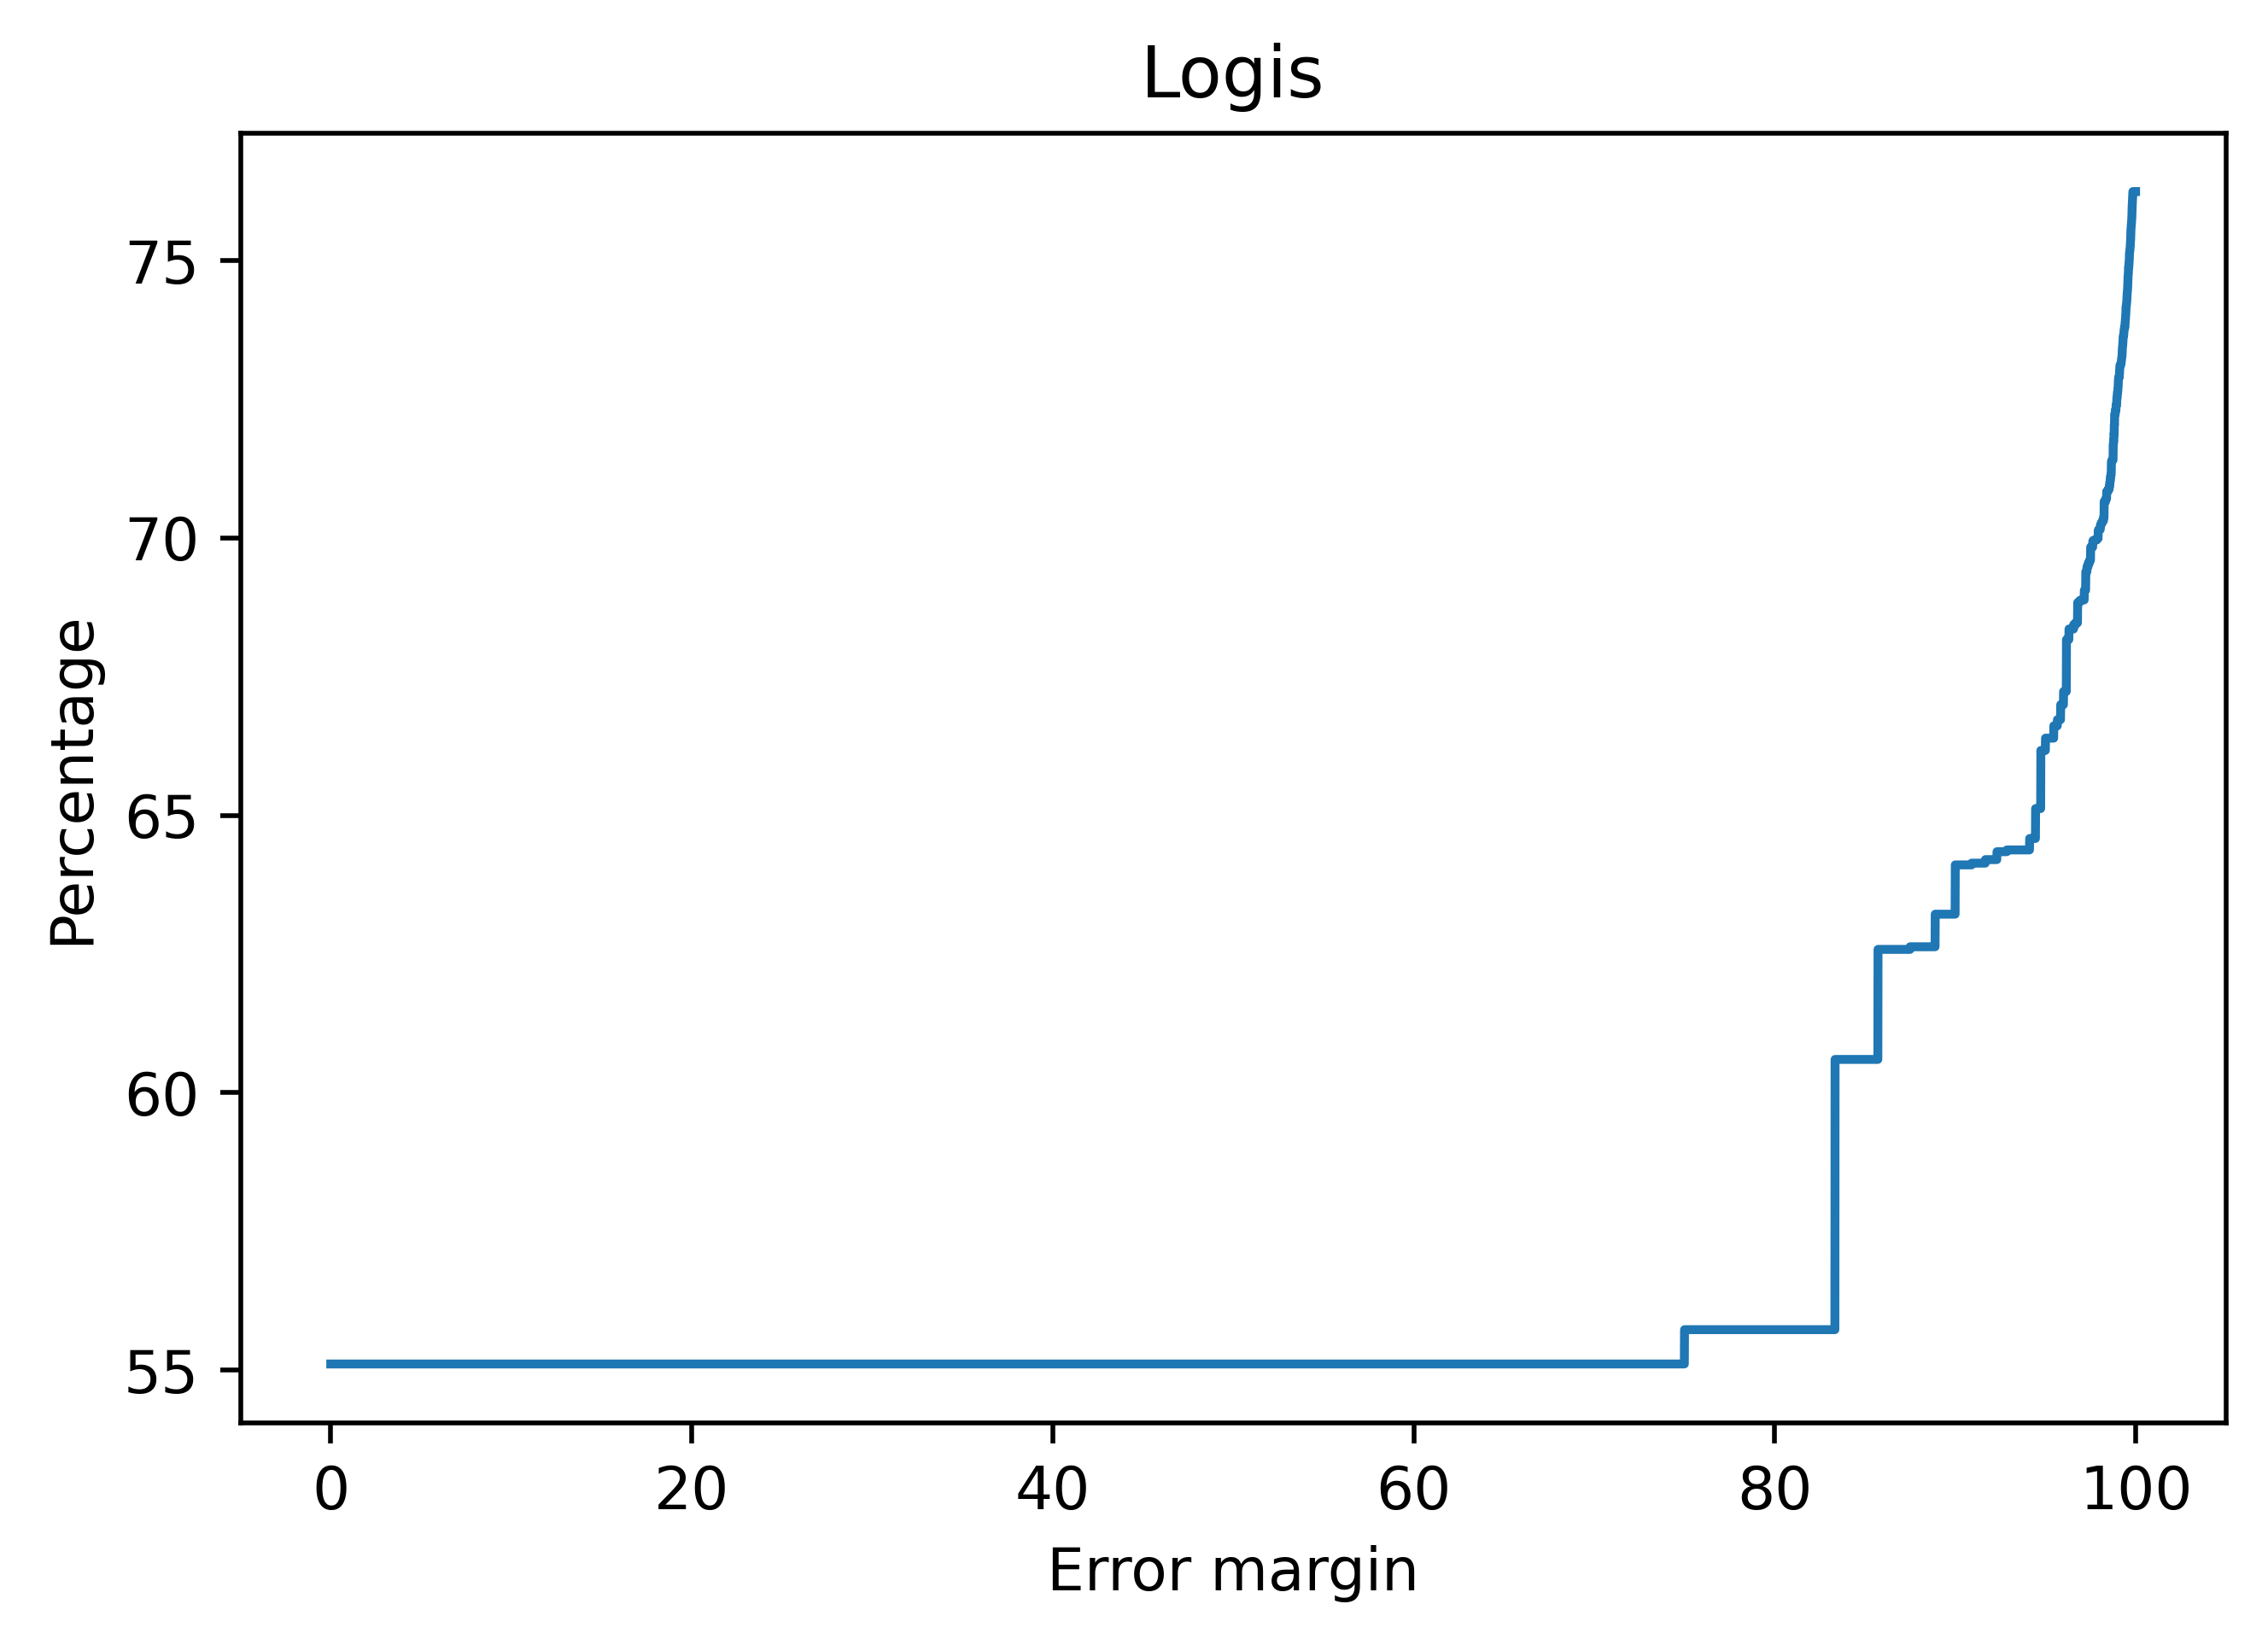

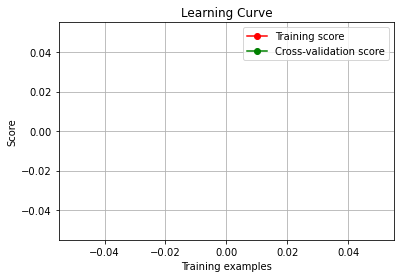









RFR
<class 'str'>
[0 1 0 ... 0 0 0]
[ 2.13611156  1.32118186 40.34933983 ...  2.27587562  1.2822213
  1.2822213 ] 

r2_score:  0.09679154574647131


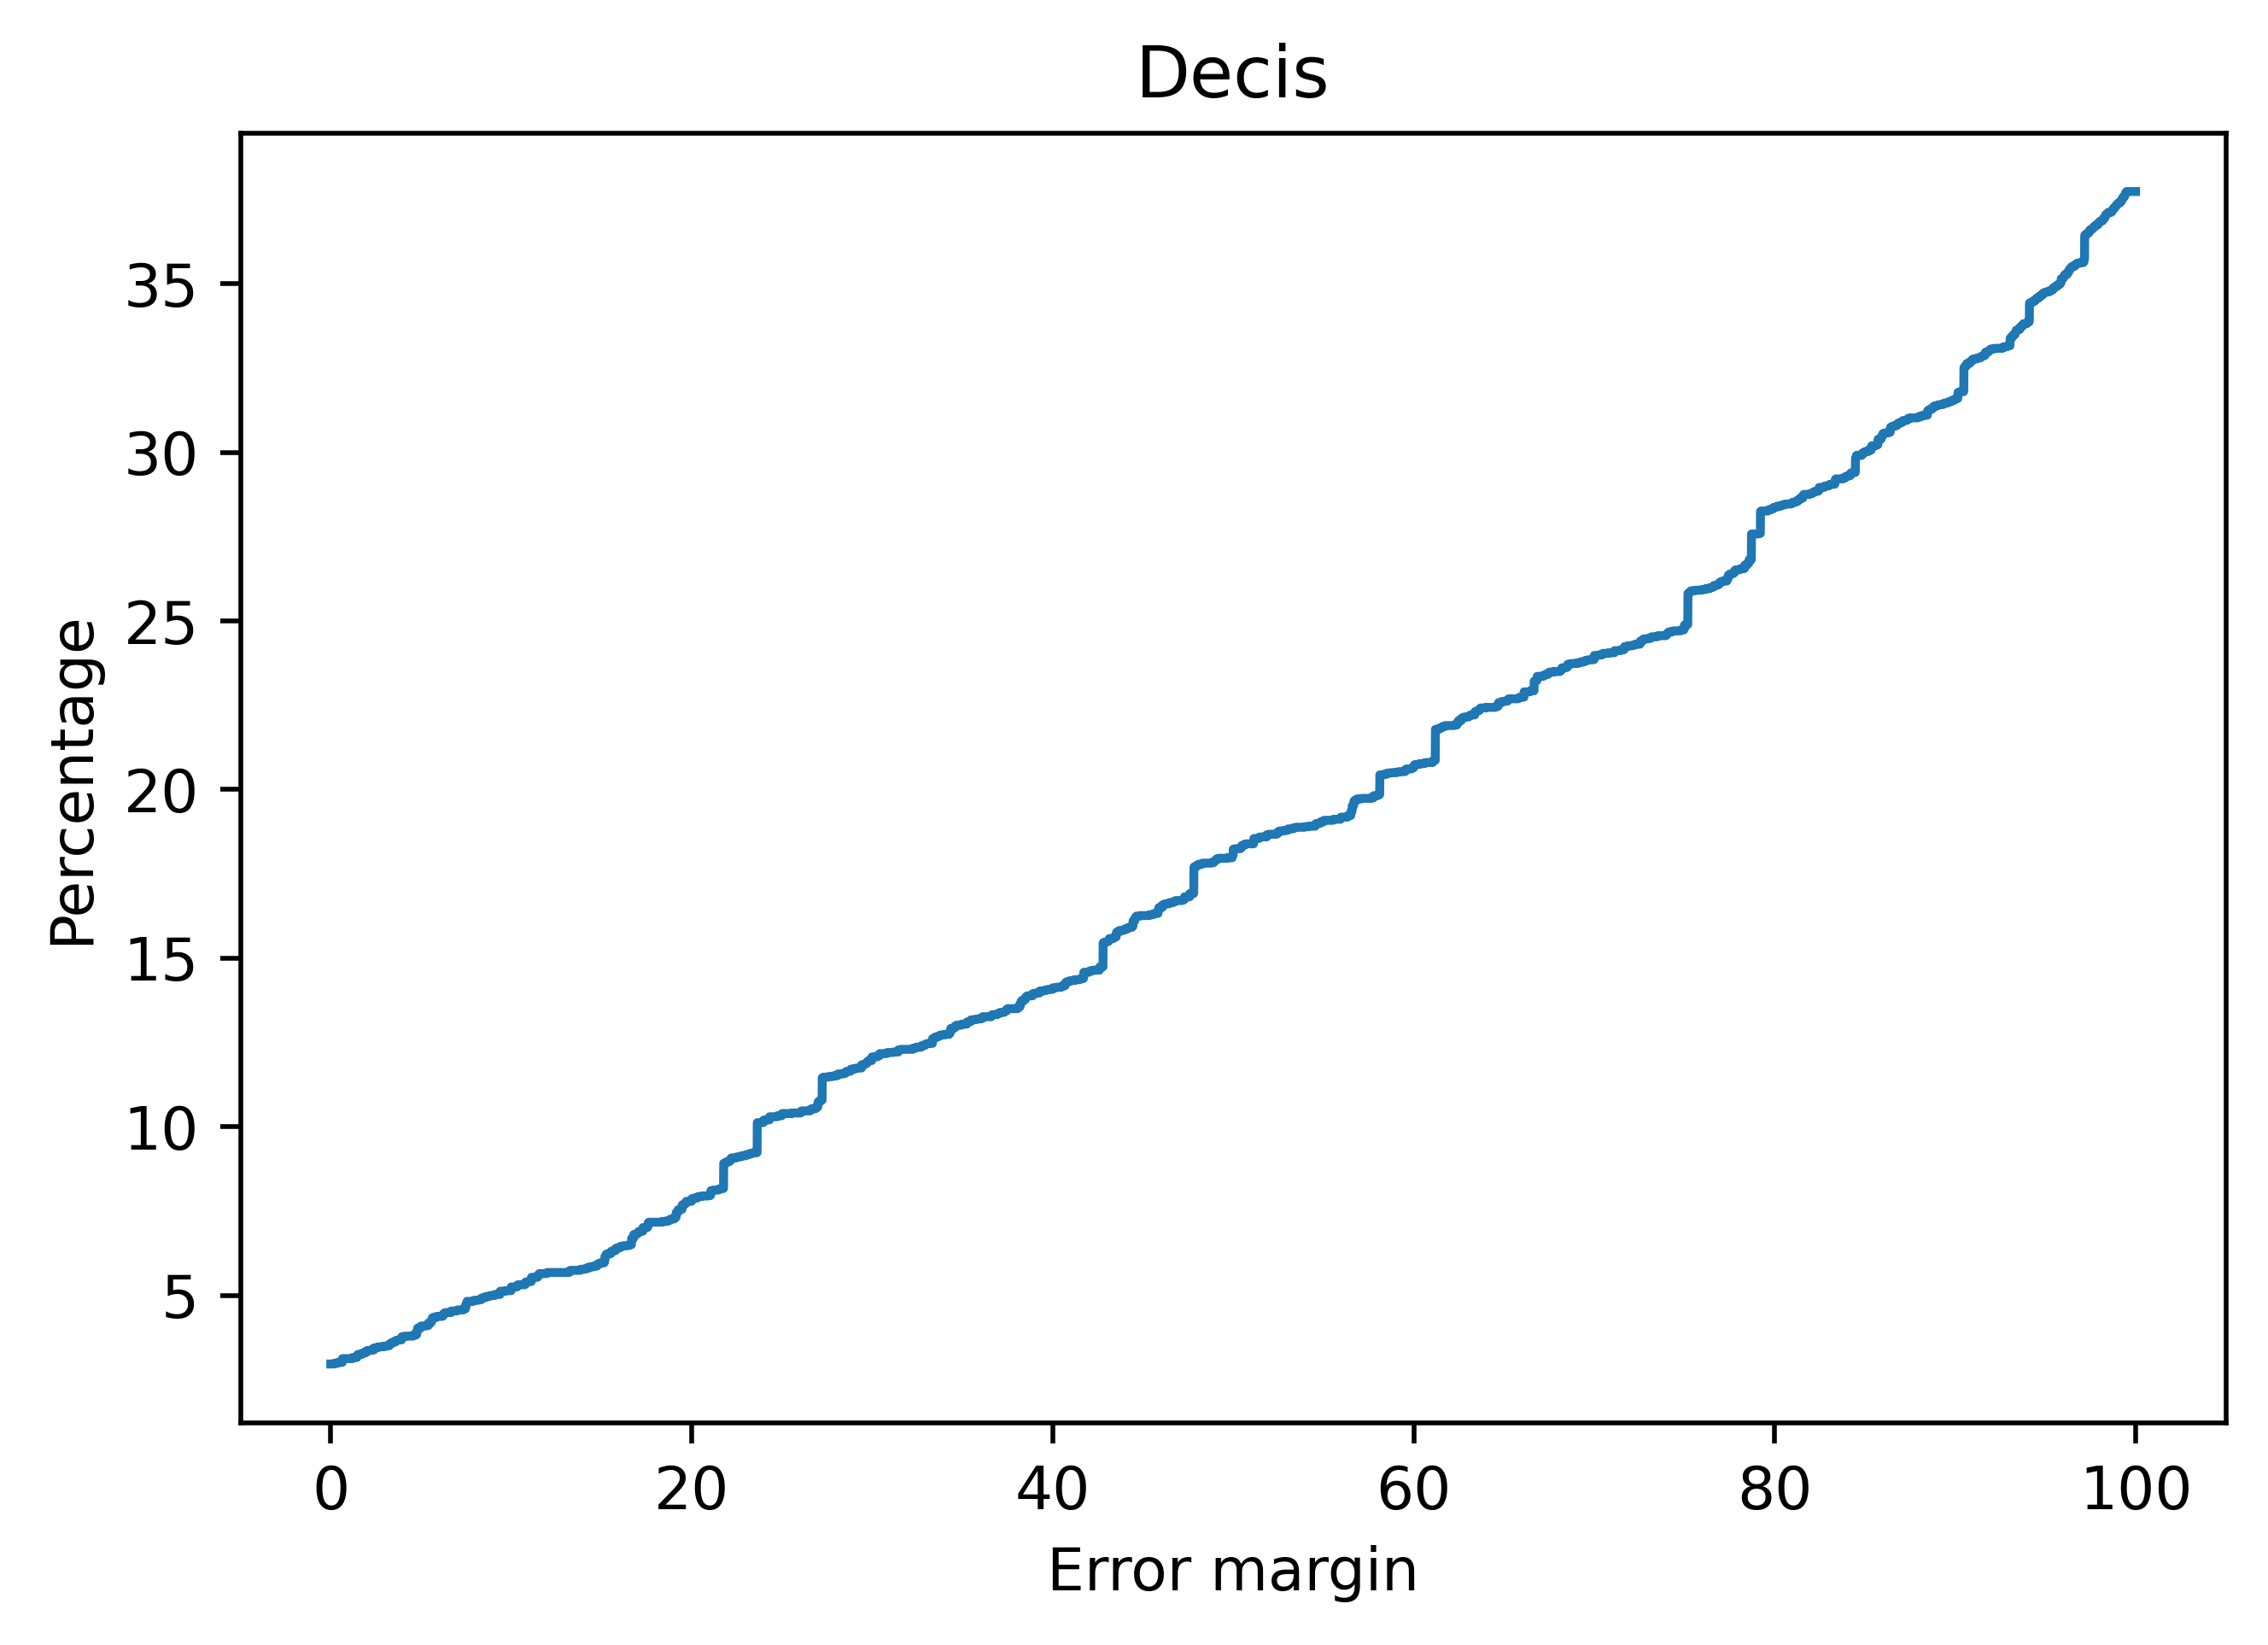

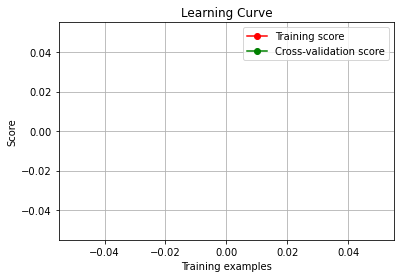









ETR
<class 'str'>
[ 0  1  2 ...  2 19  2]
[ 3.68951613  7.28968254  4.62043796 ... 26.          0.
  8.20645161] 

r2_score:  0.1017914386467843


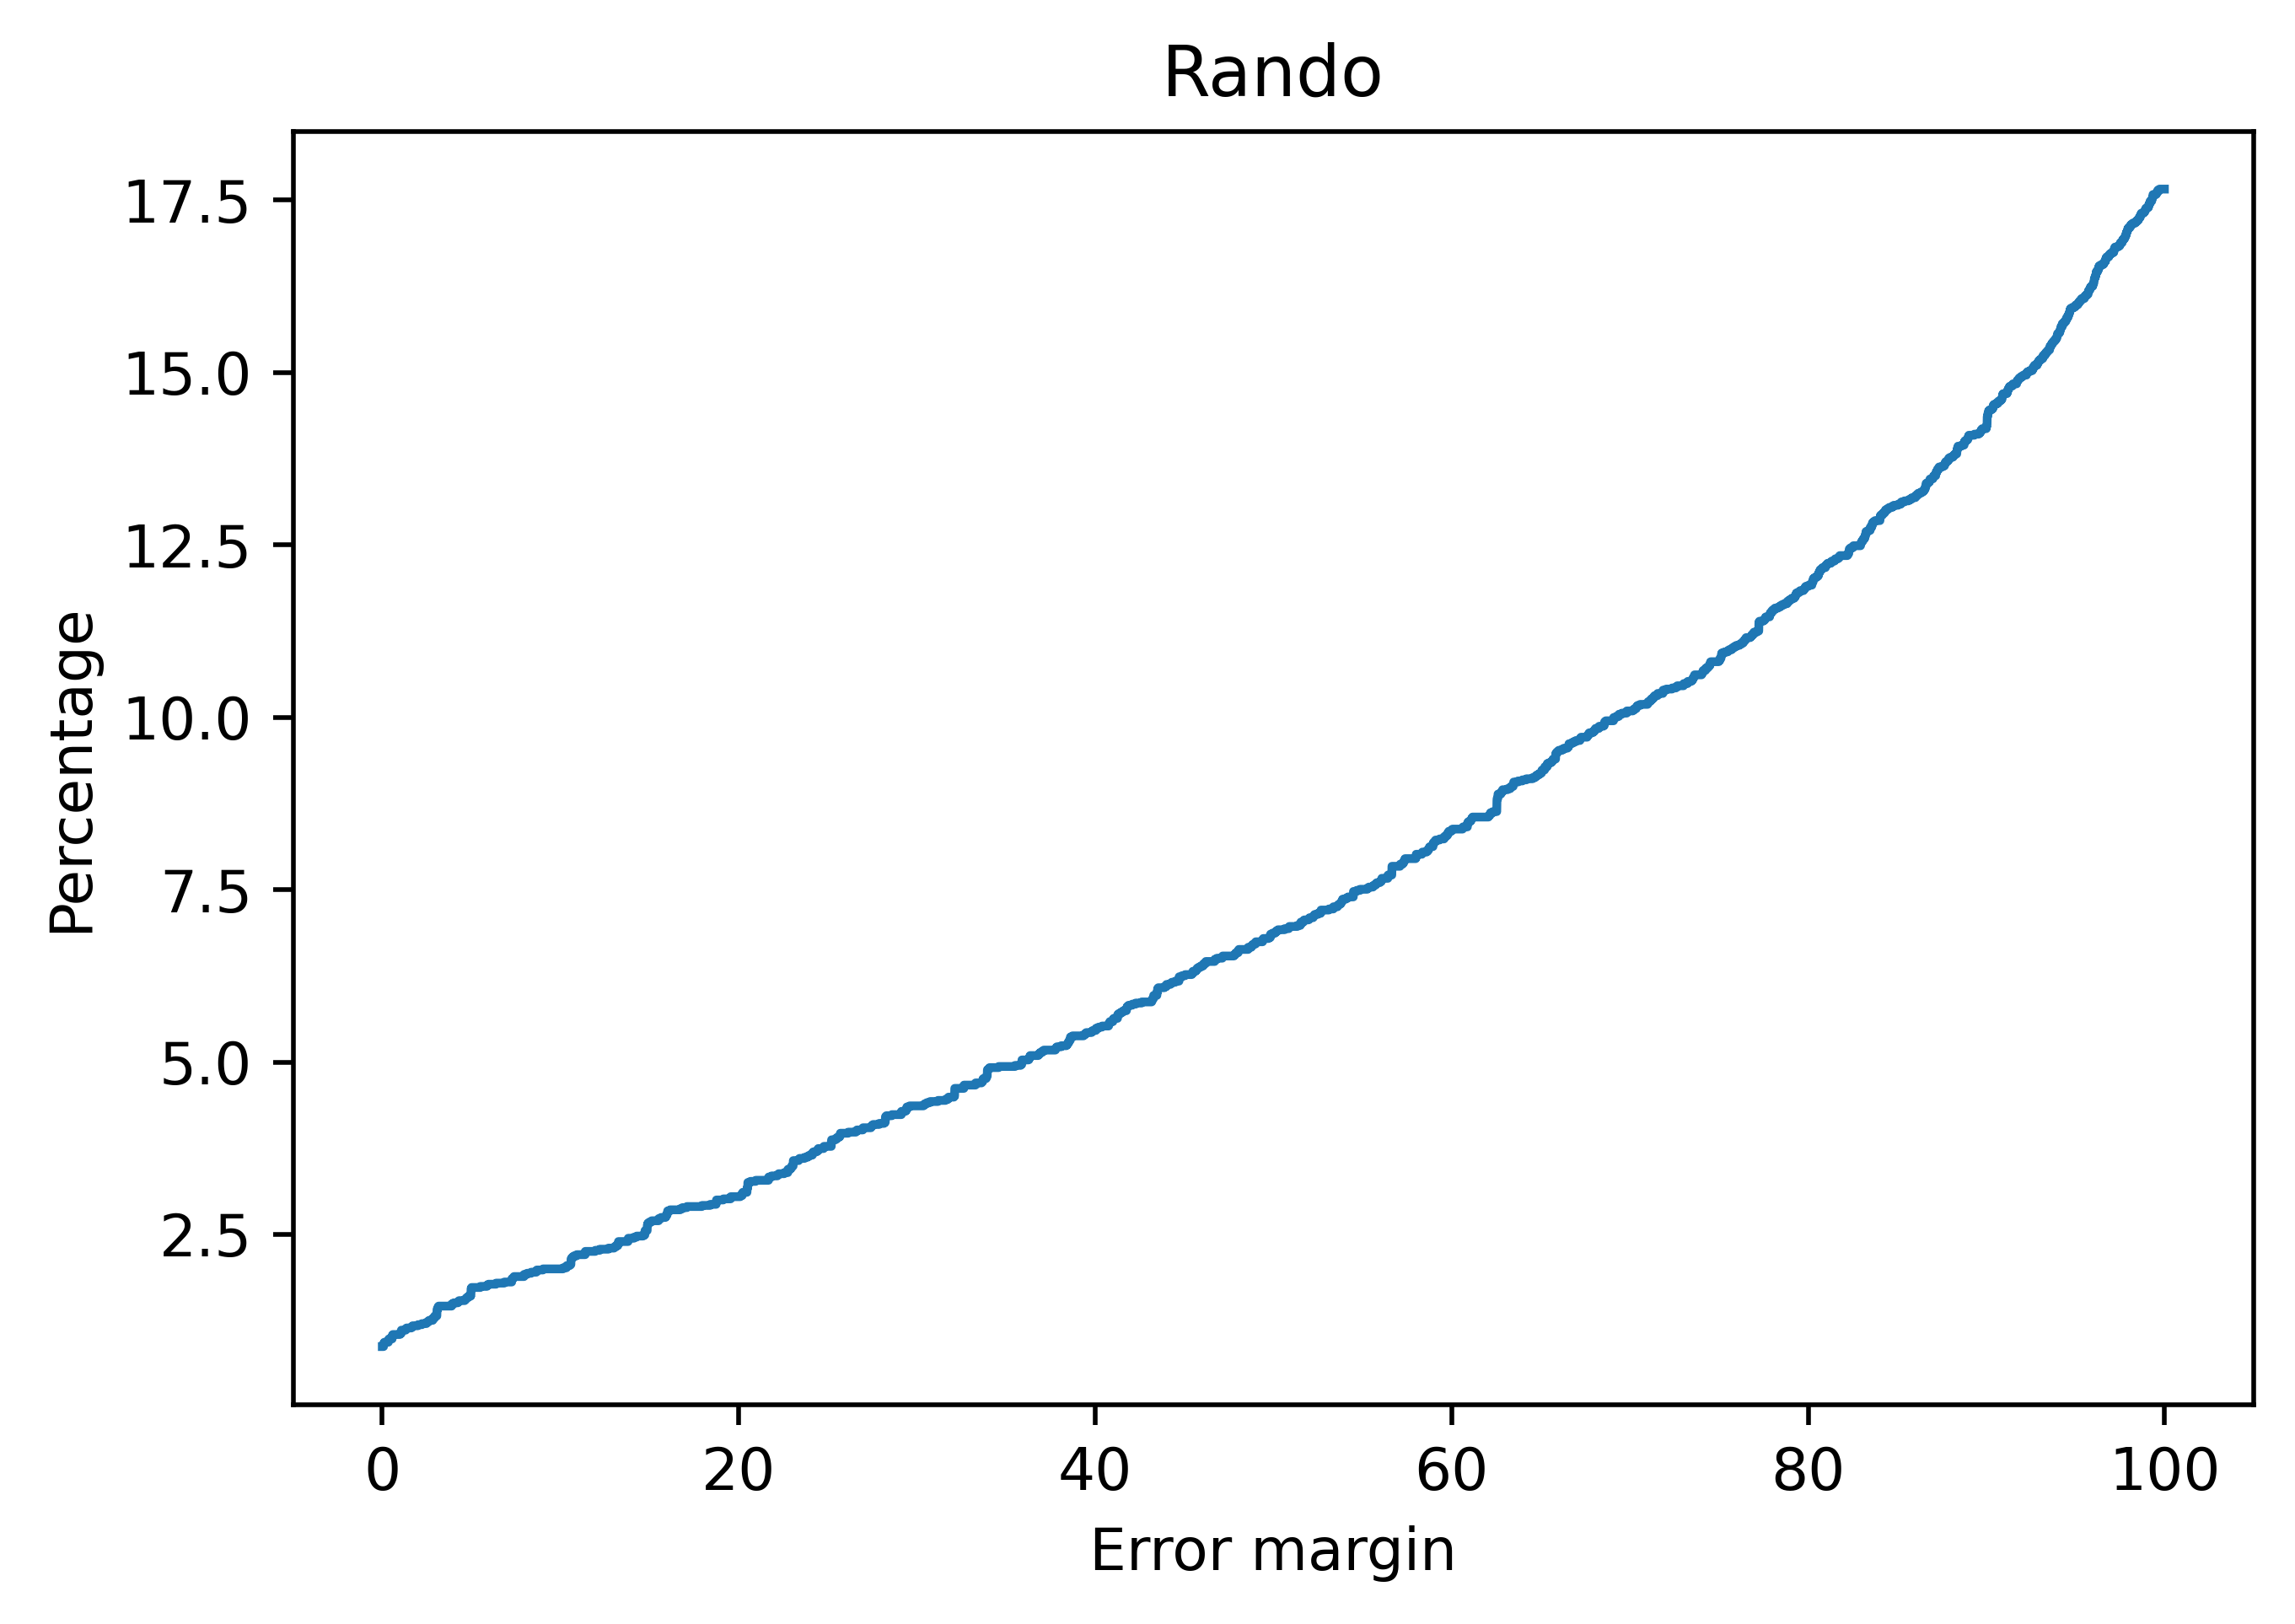

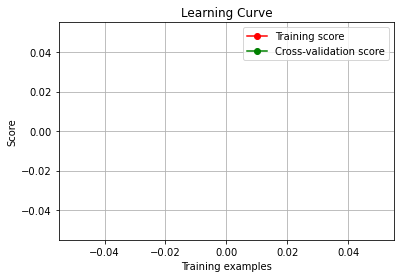









XGB
<class 'str'>
[0 1 0 ... 0 0 0]
[ 8.54376   10.428664  10.428664  ...  4.8137784  1.8058846 14.980728 ] 

r2_score:  0.1368308998490172


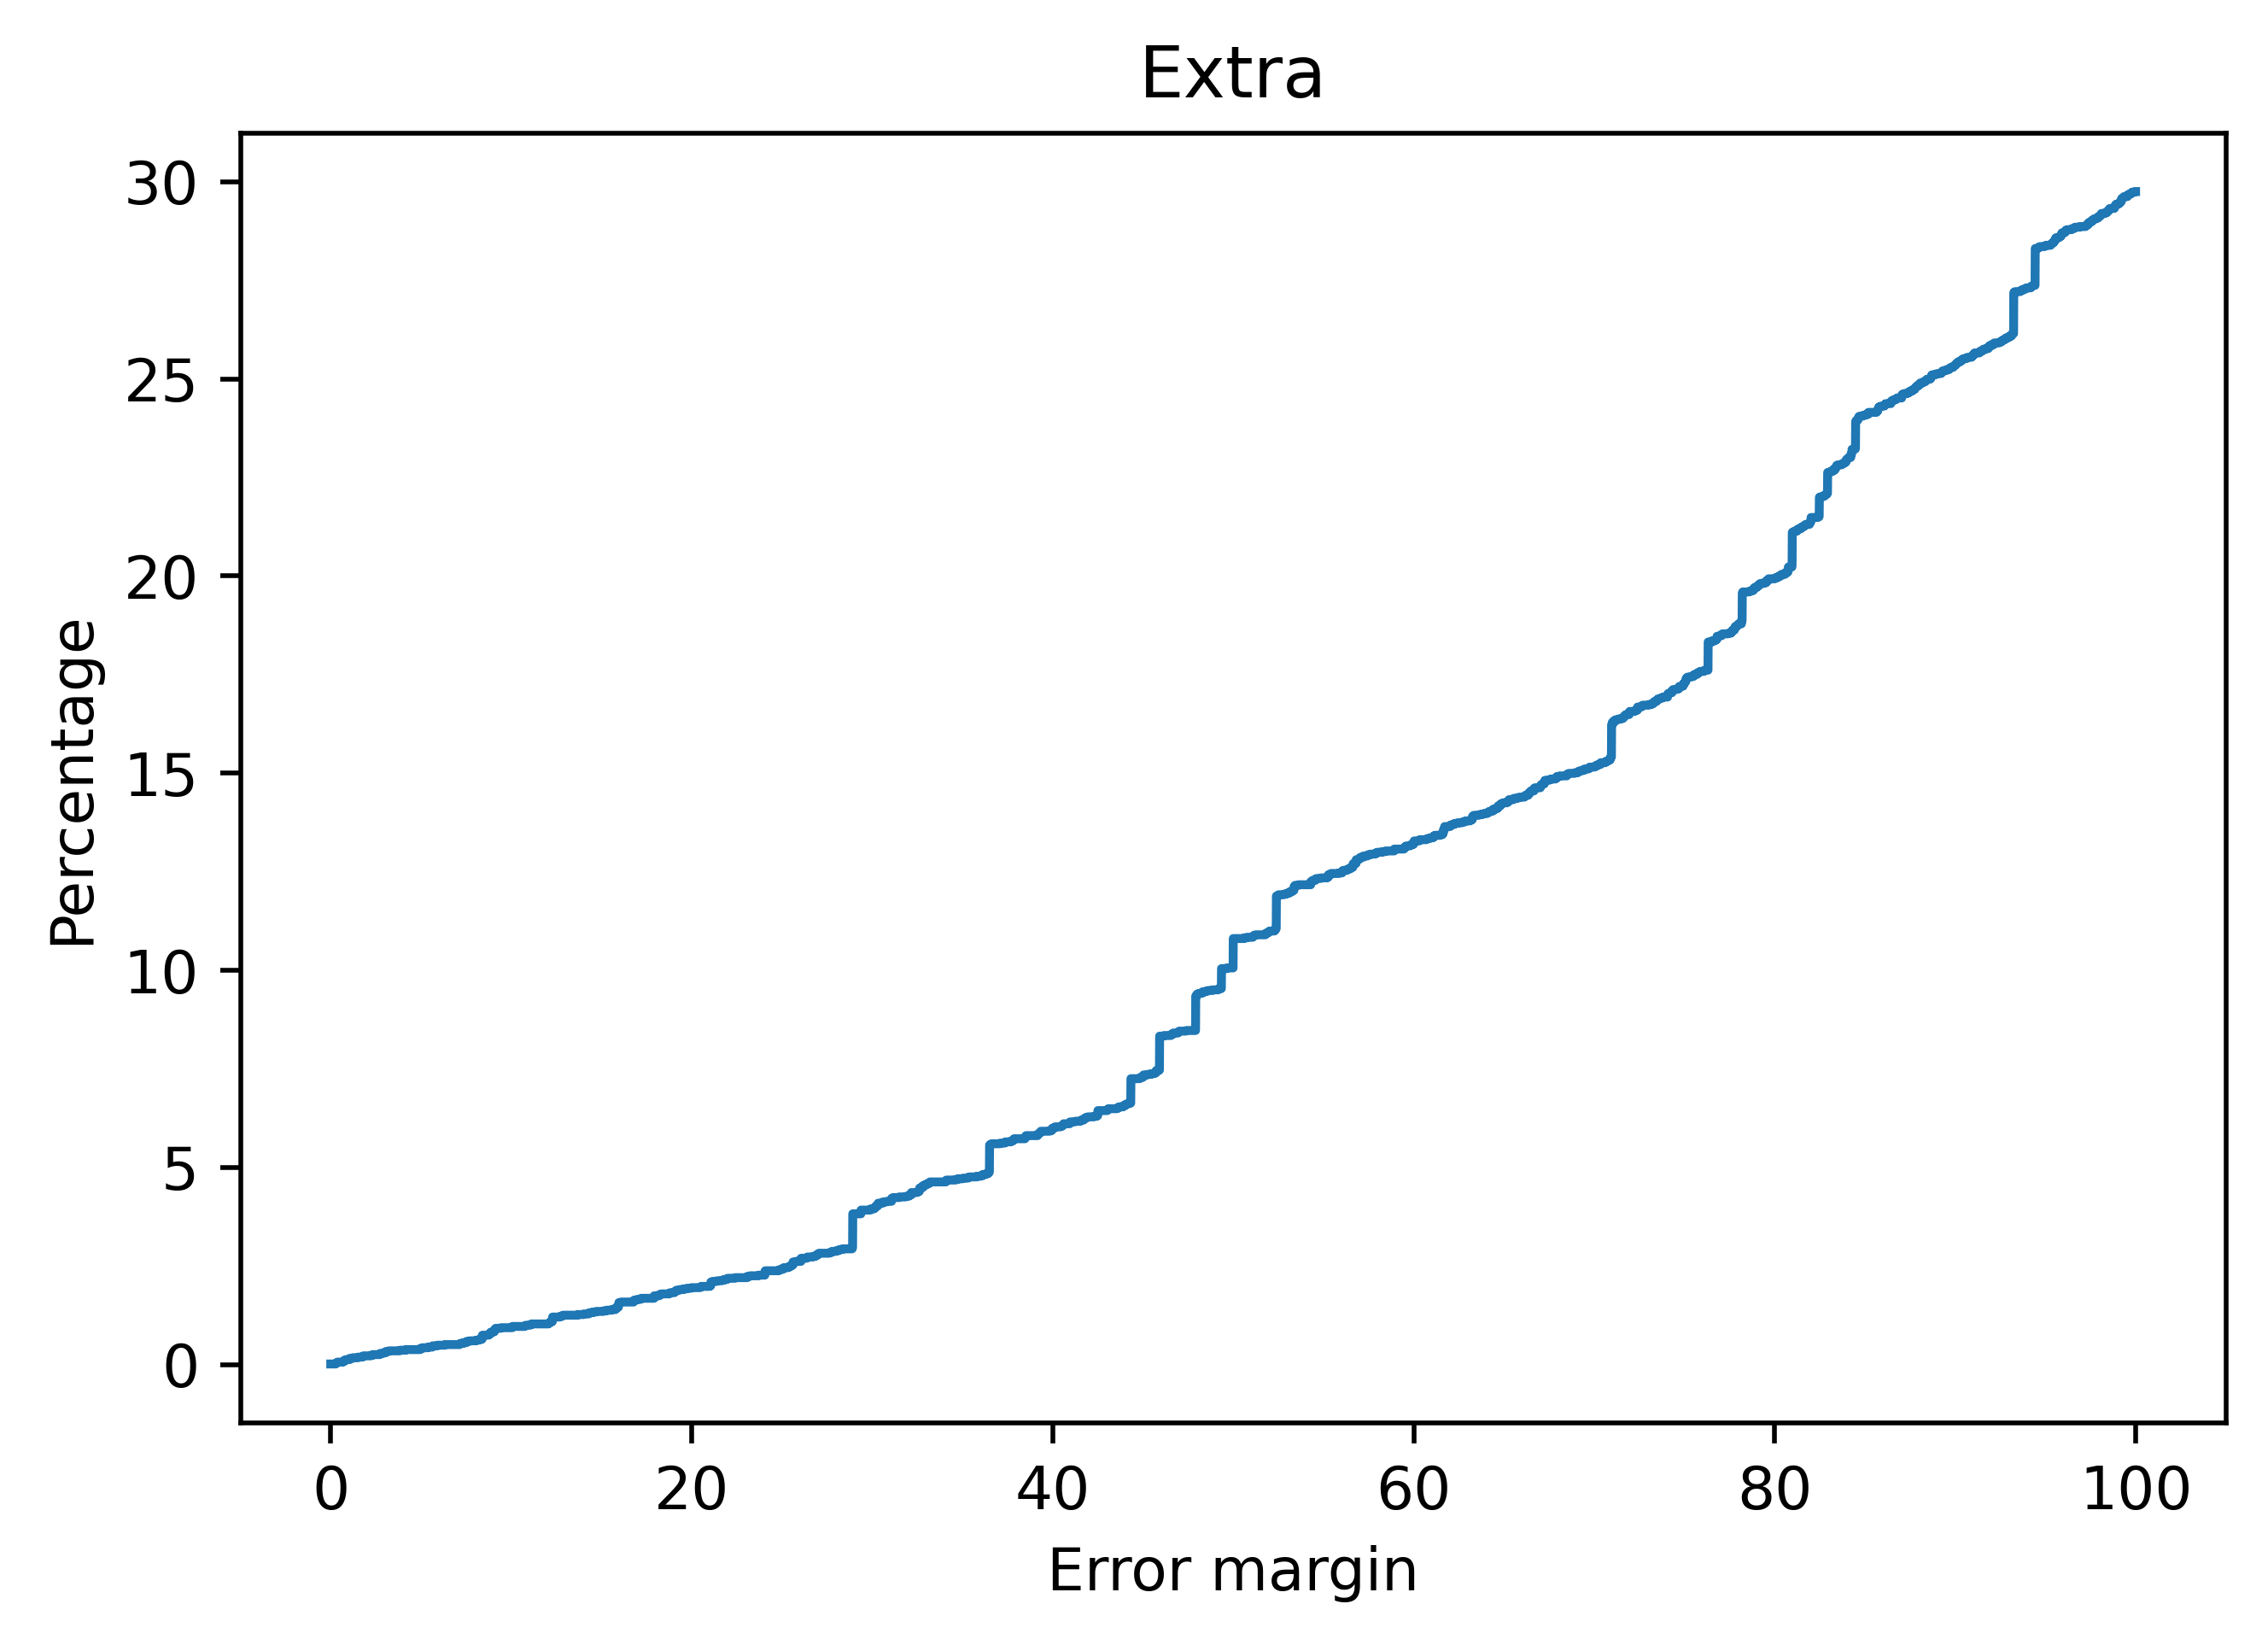

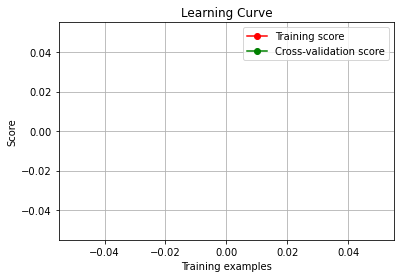









LGBM
<class 'str'>
[0 0 0 ... 0 0 0]
[ 2.30433511  3.60960087  9.81802769 ...  2.89564121 14.30494526
  3.63379238] 

r2_score:  0.14947596981405498


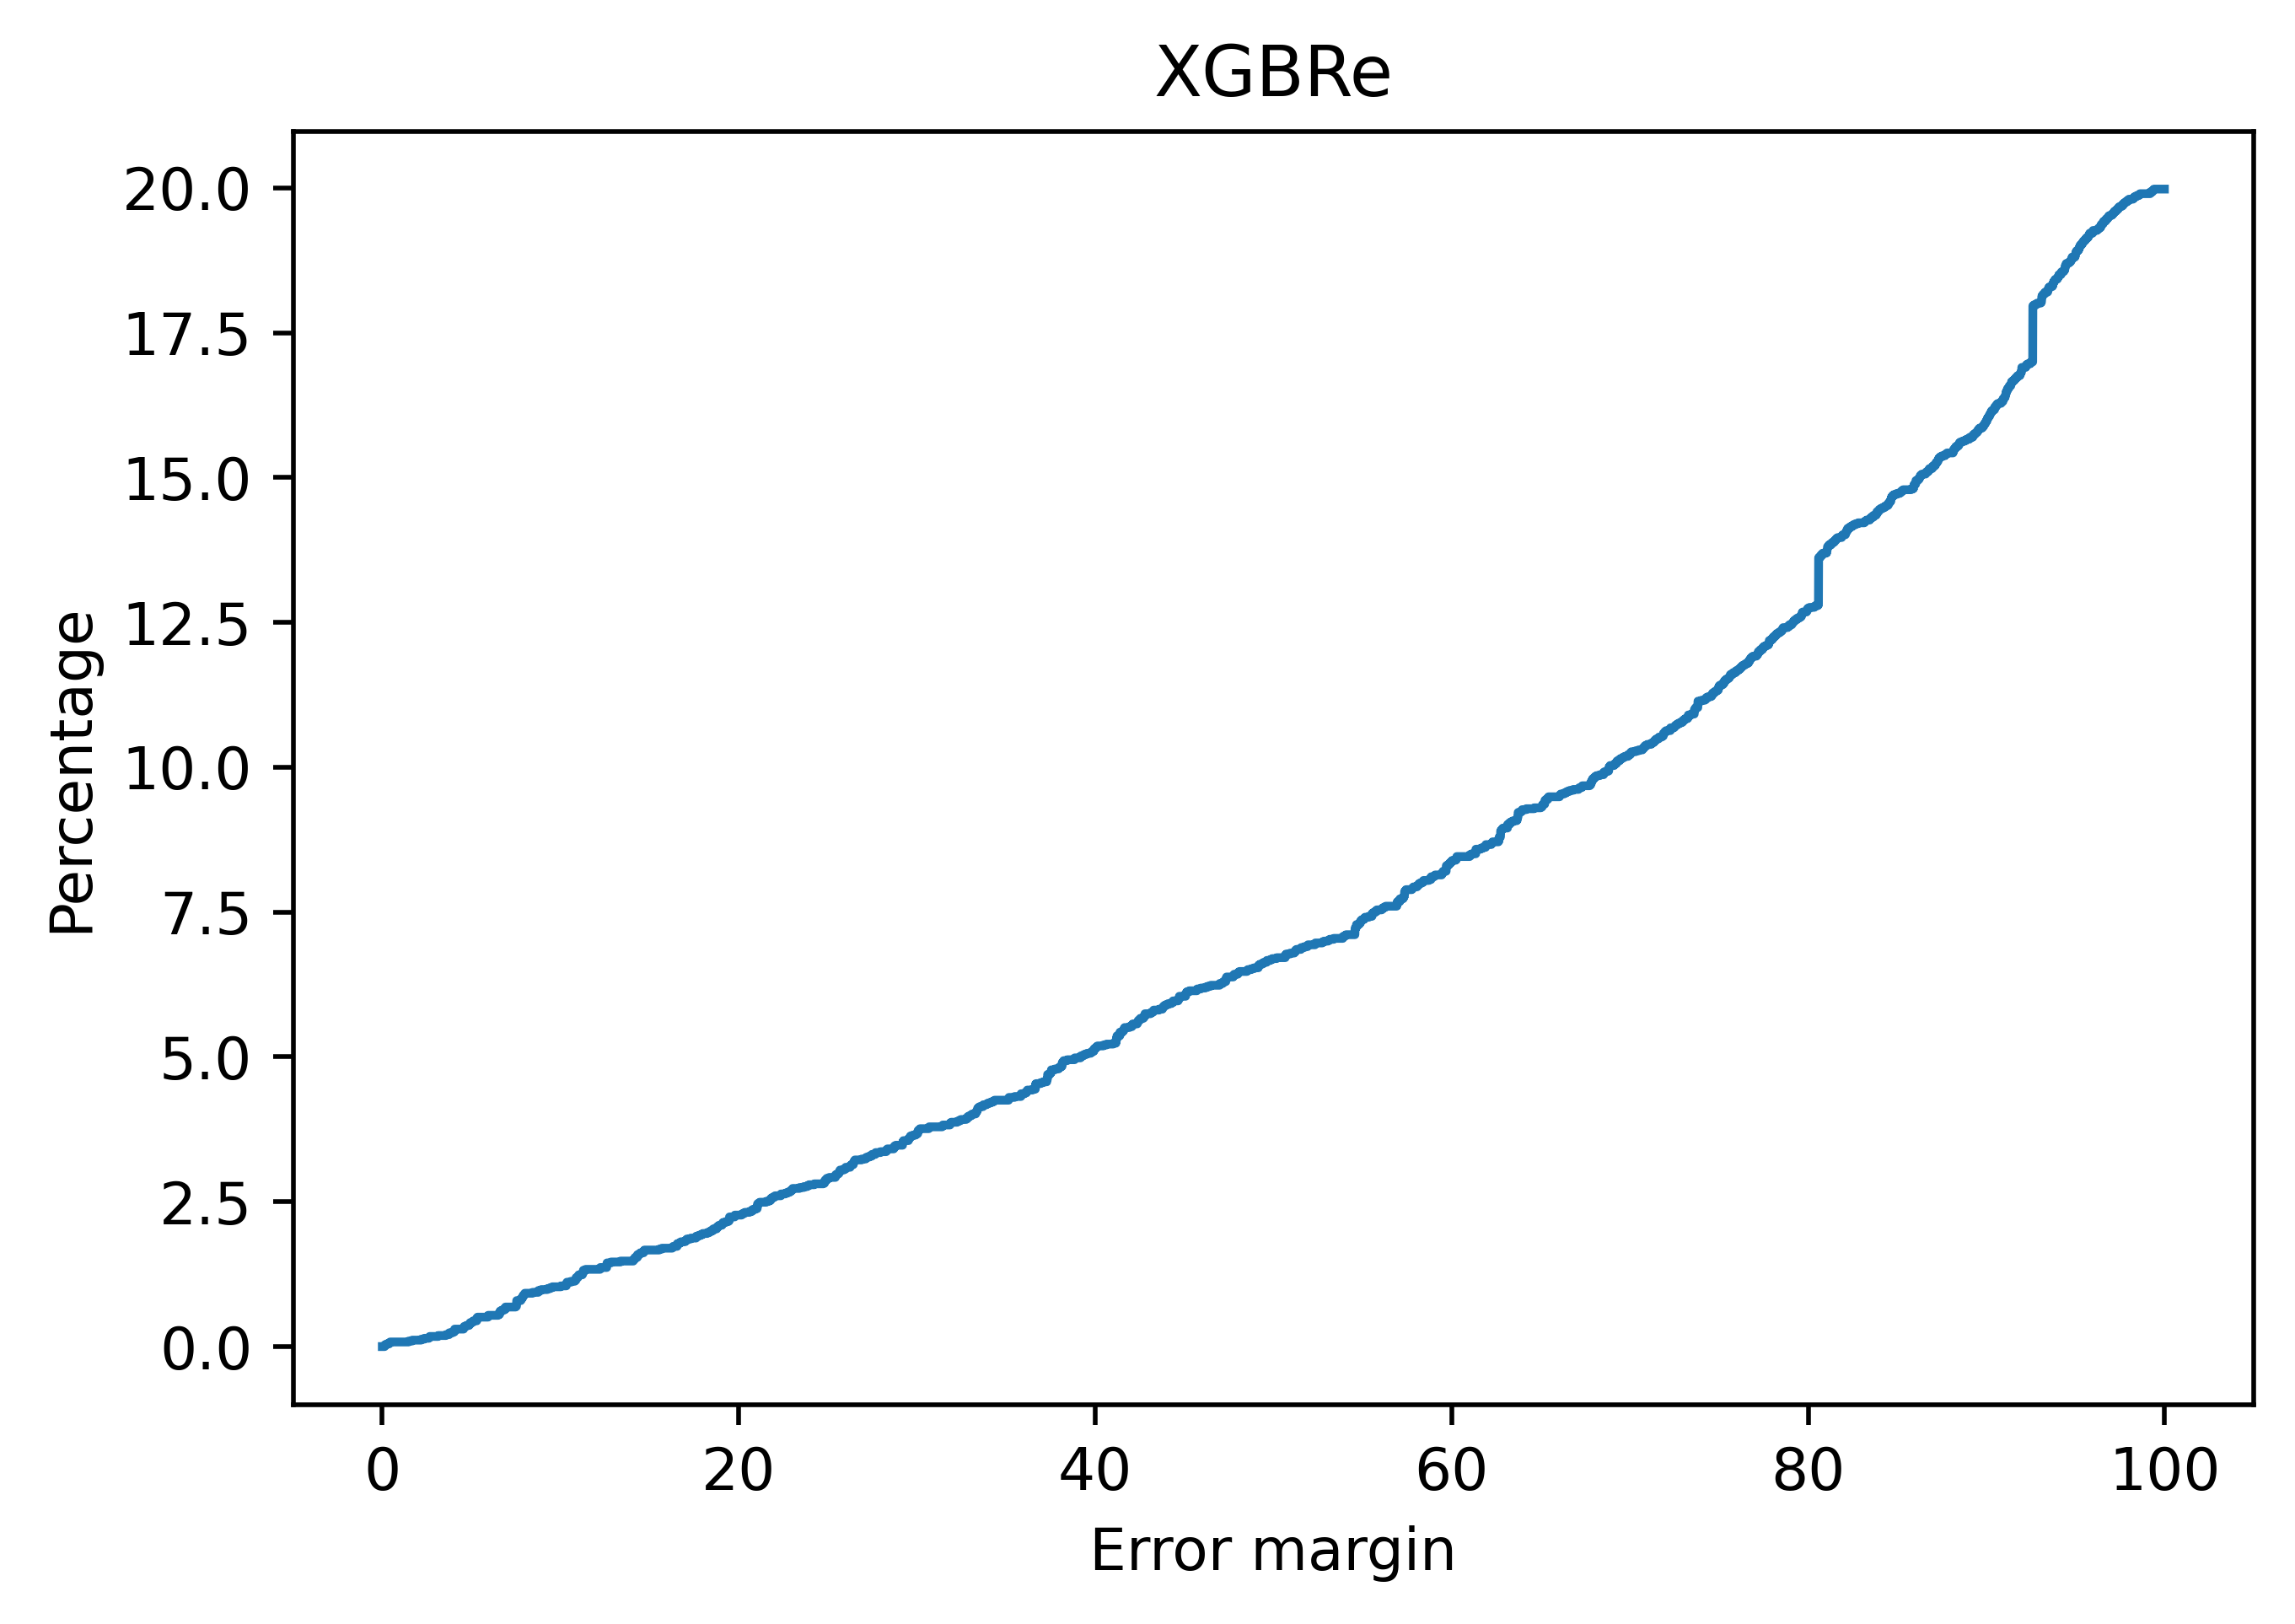

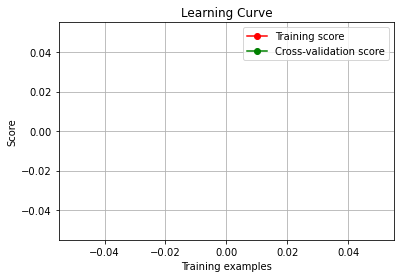









KNR
<class 'str'>
[ 0  1  1 ...  9 51  1]
[162.    0.2   1.2 ...   0.4   0.    1. ] 

r2_score:  0.12741189698914857


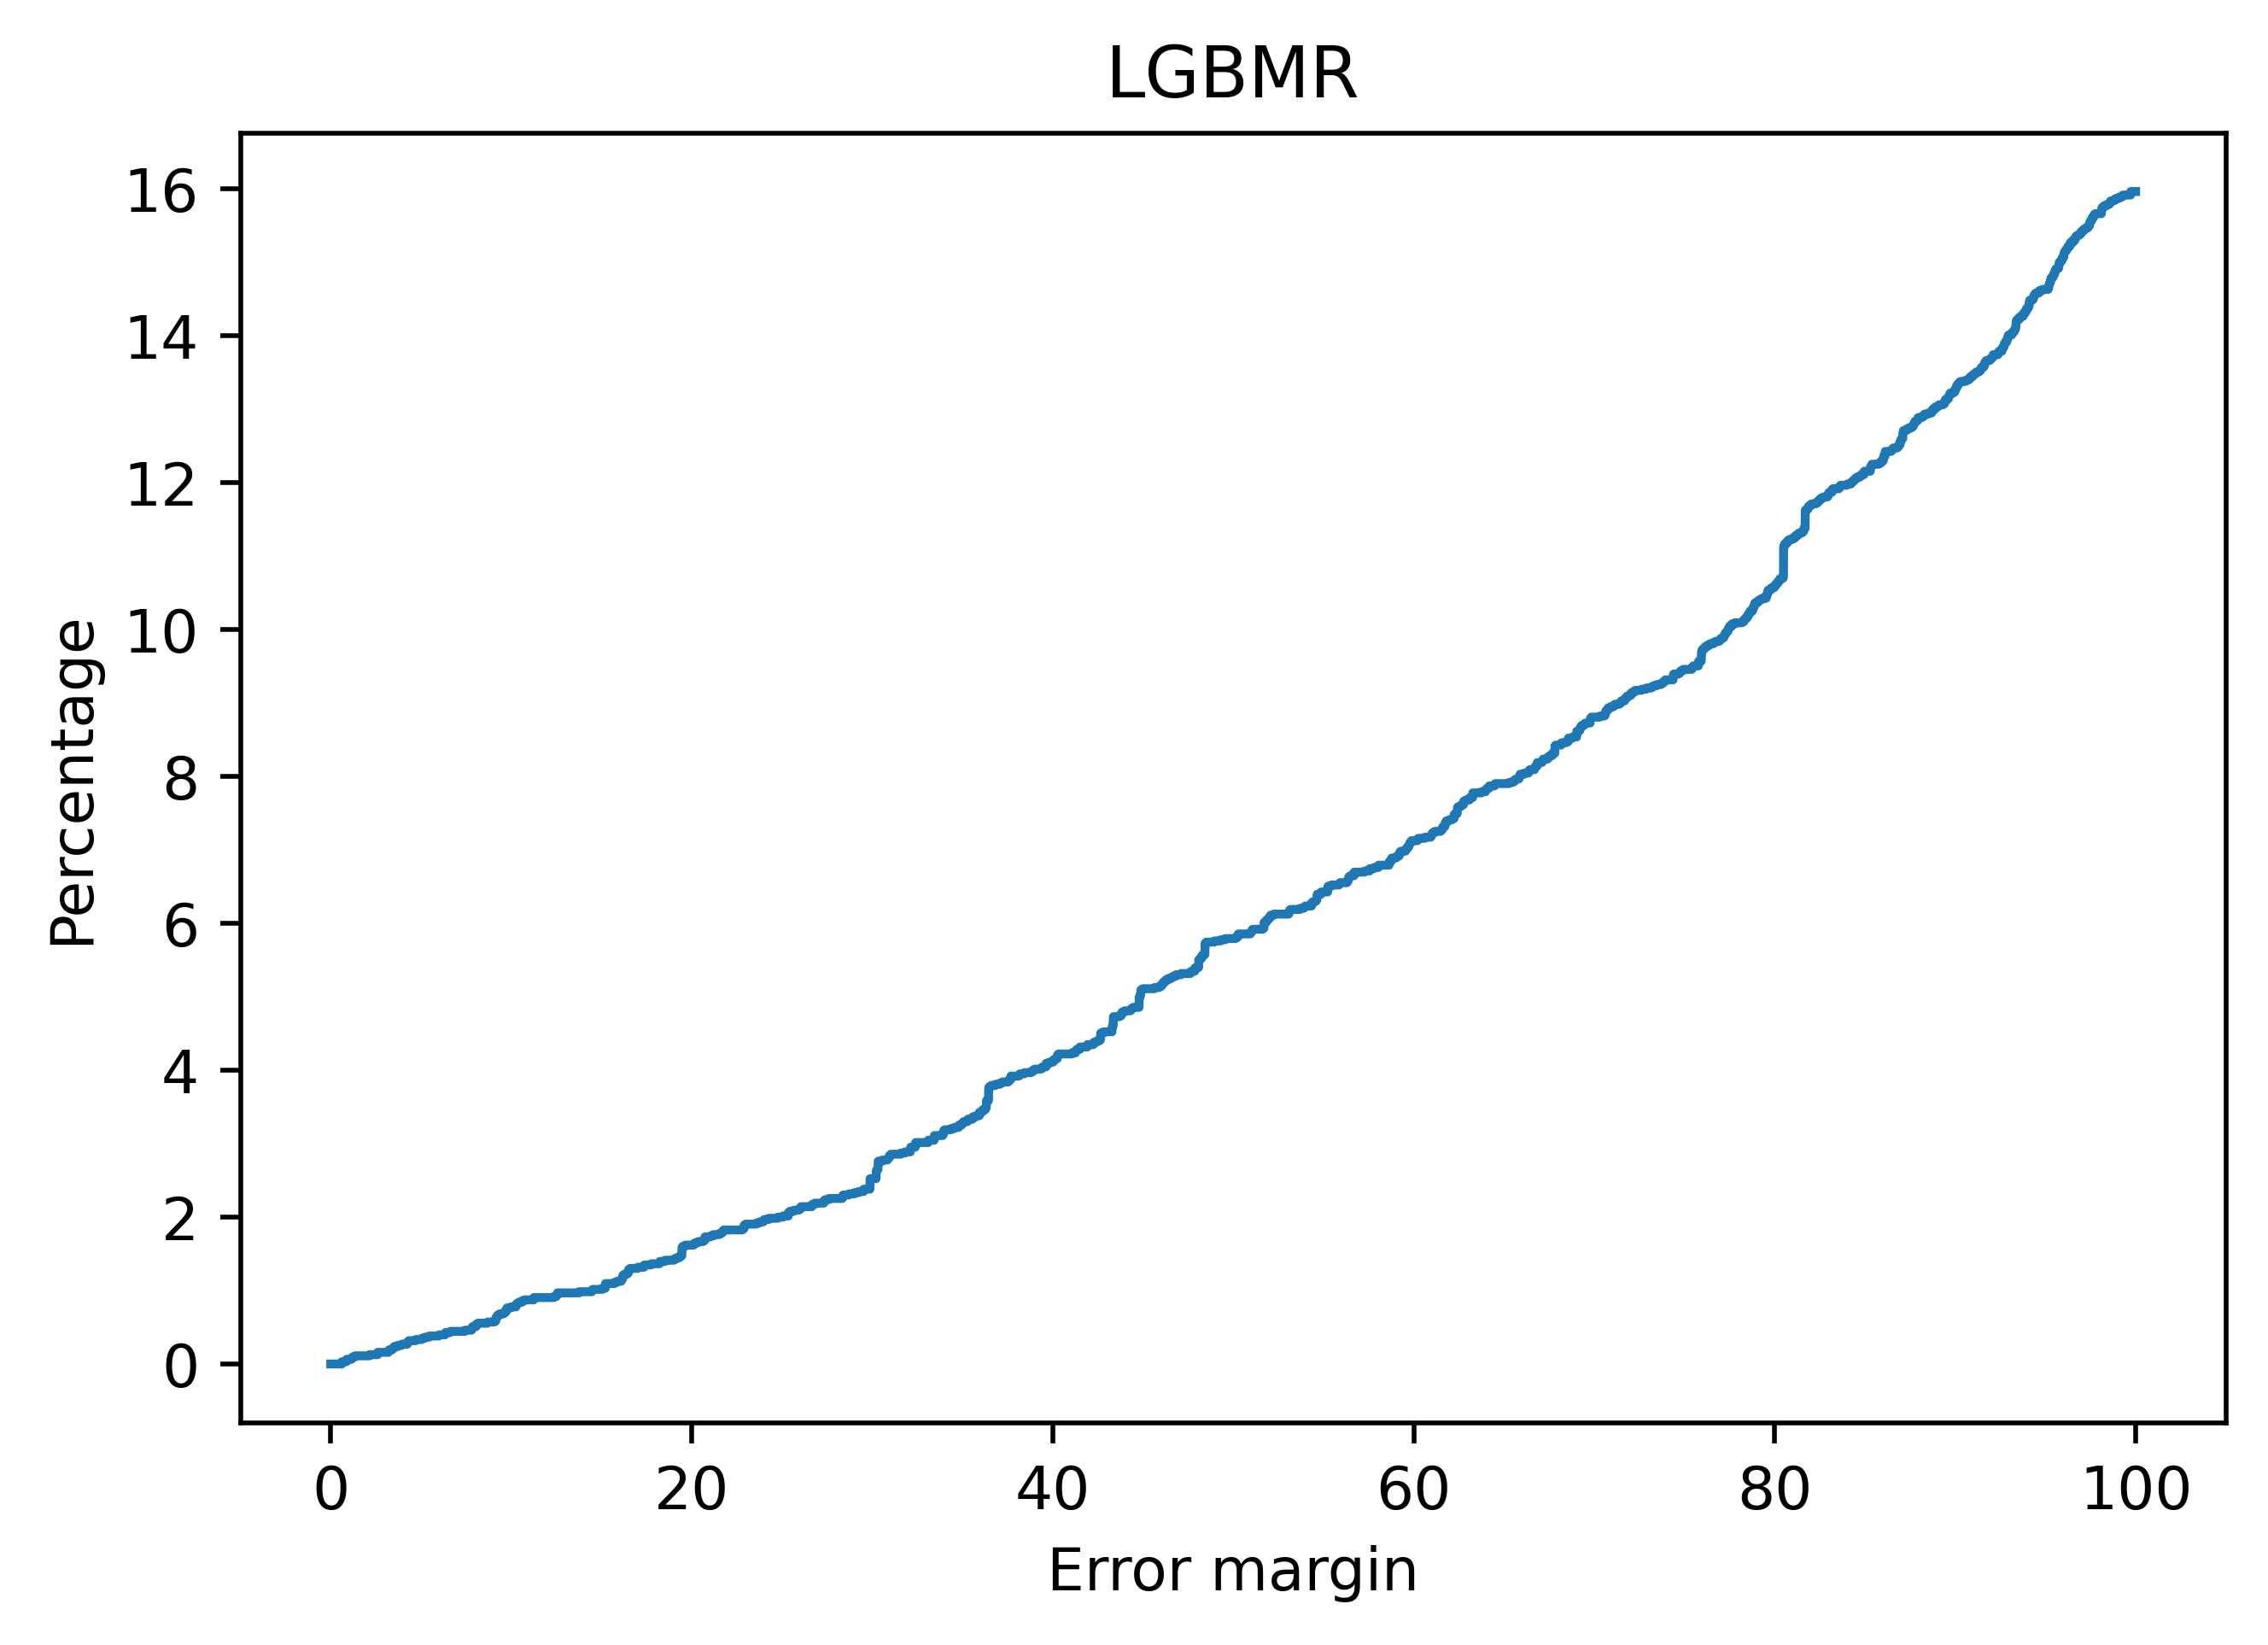

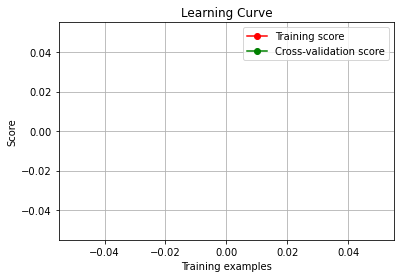









GBR
<class 'str'>
[  0   1   0 ...   1   1 329]
[ 2.86066802 13.1643134  12.02456696 ...  2.86066802  9.61201584
  4.98625767] 

r2_score:  0.21406859975135872


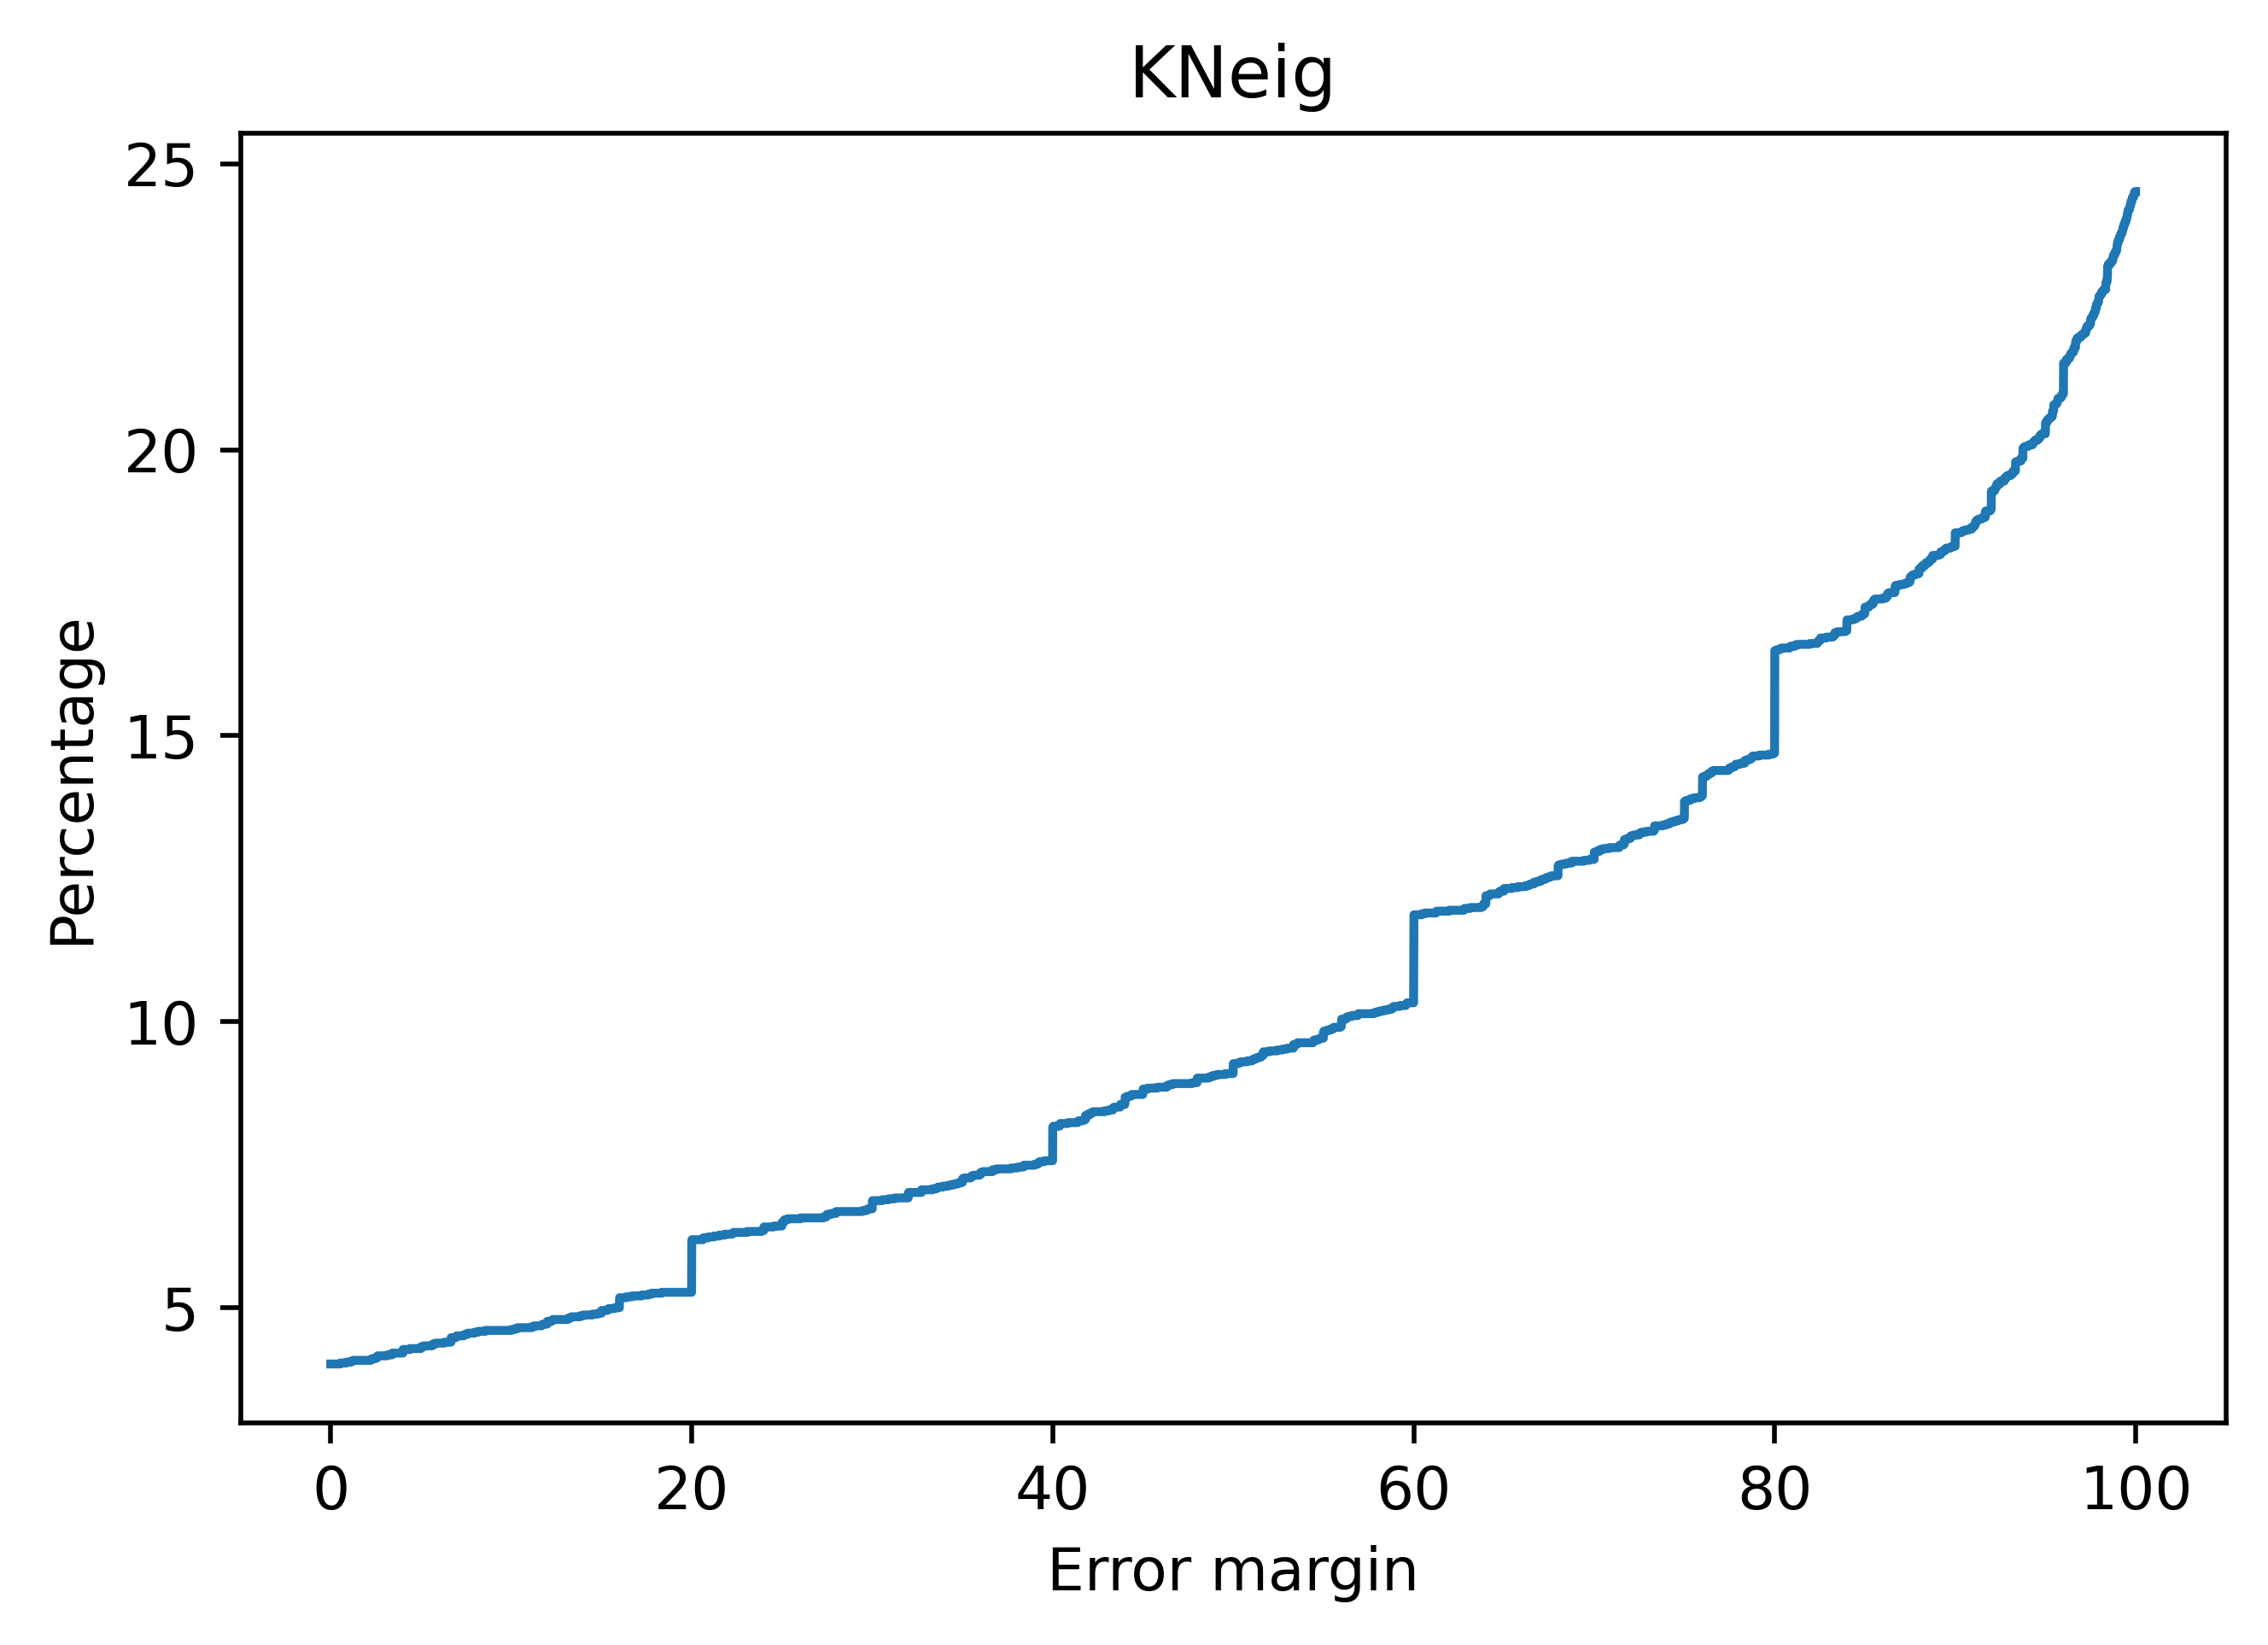

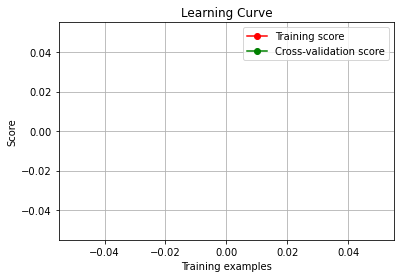









LSVC
<class 'str'>
[0 1 2 ... 3 0 0]
[0 0 0 ... 0 0 0] 

r2_score:  -1.481897526175696


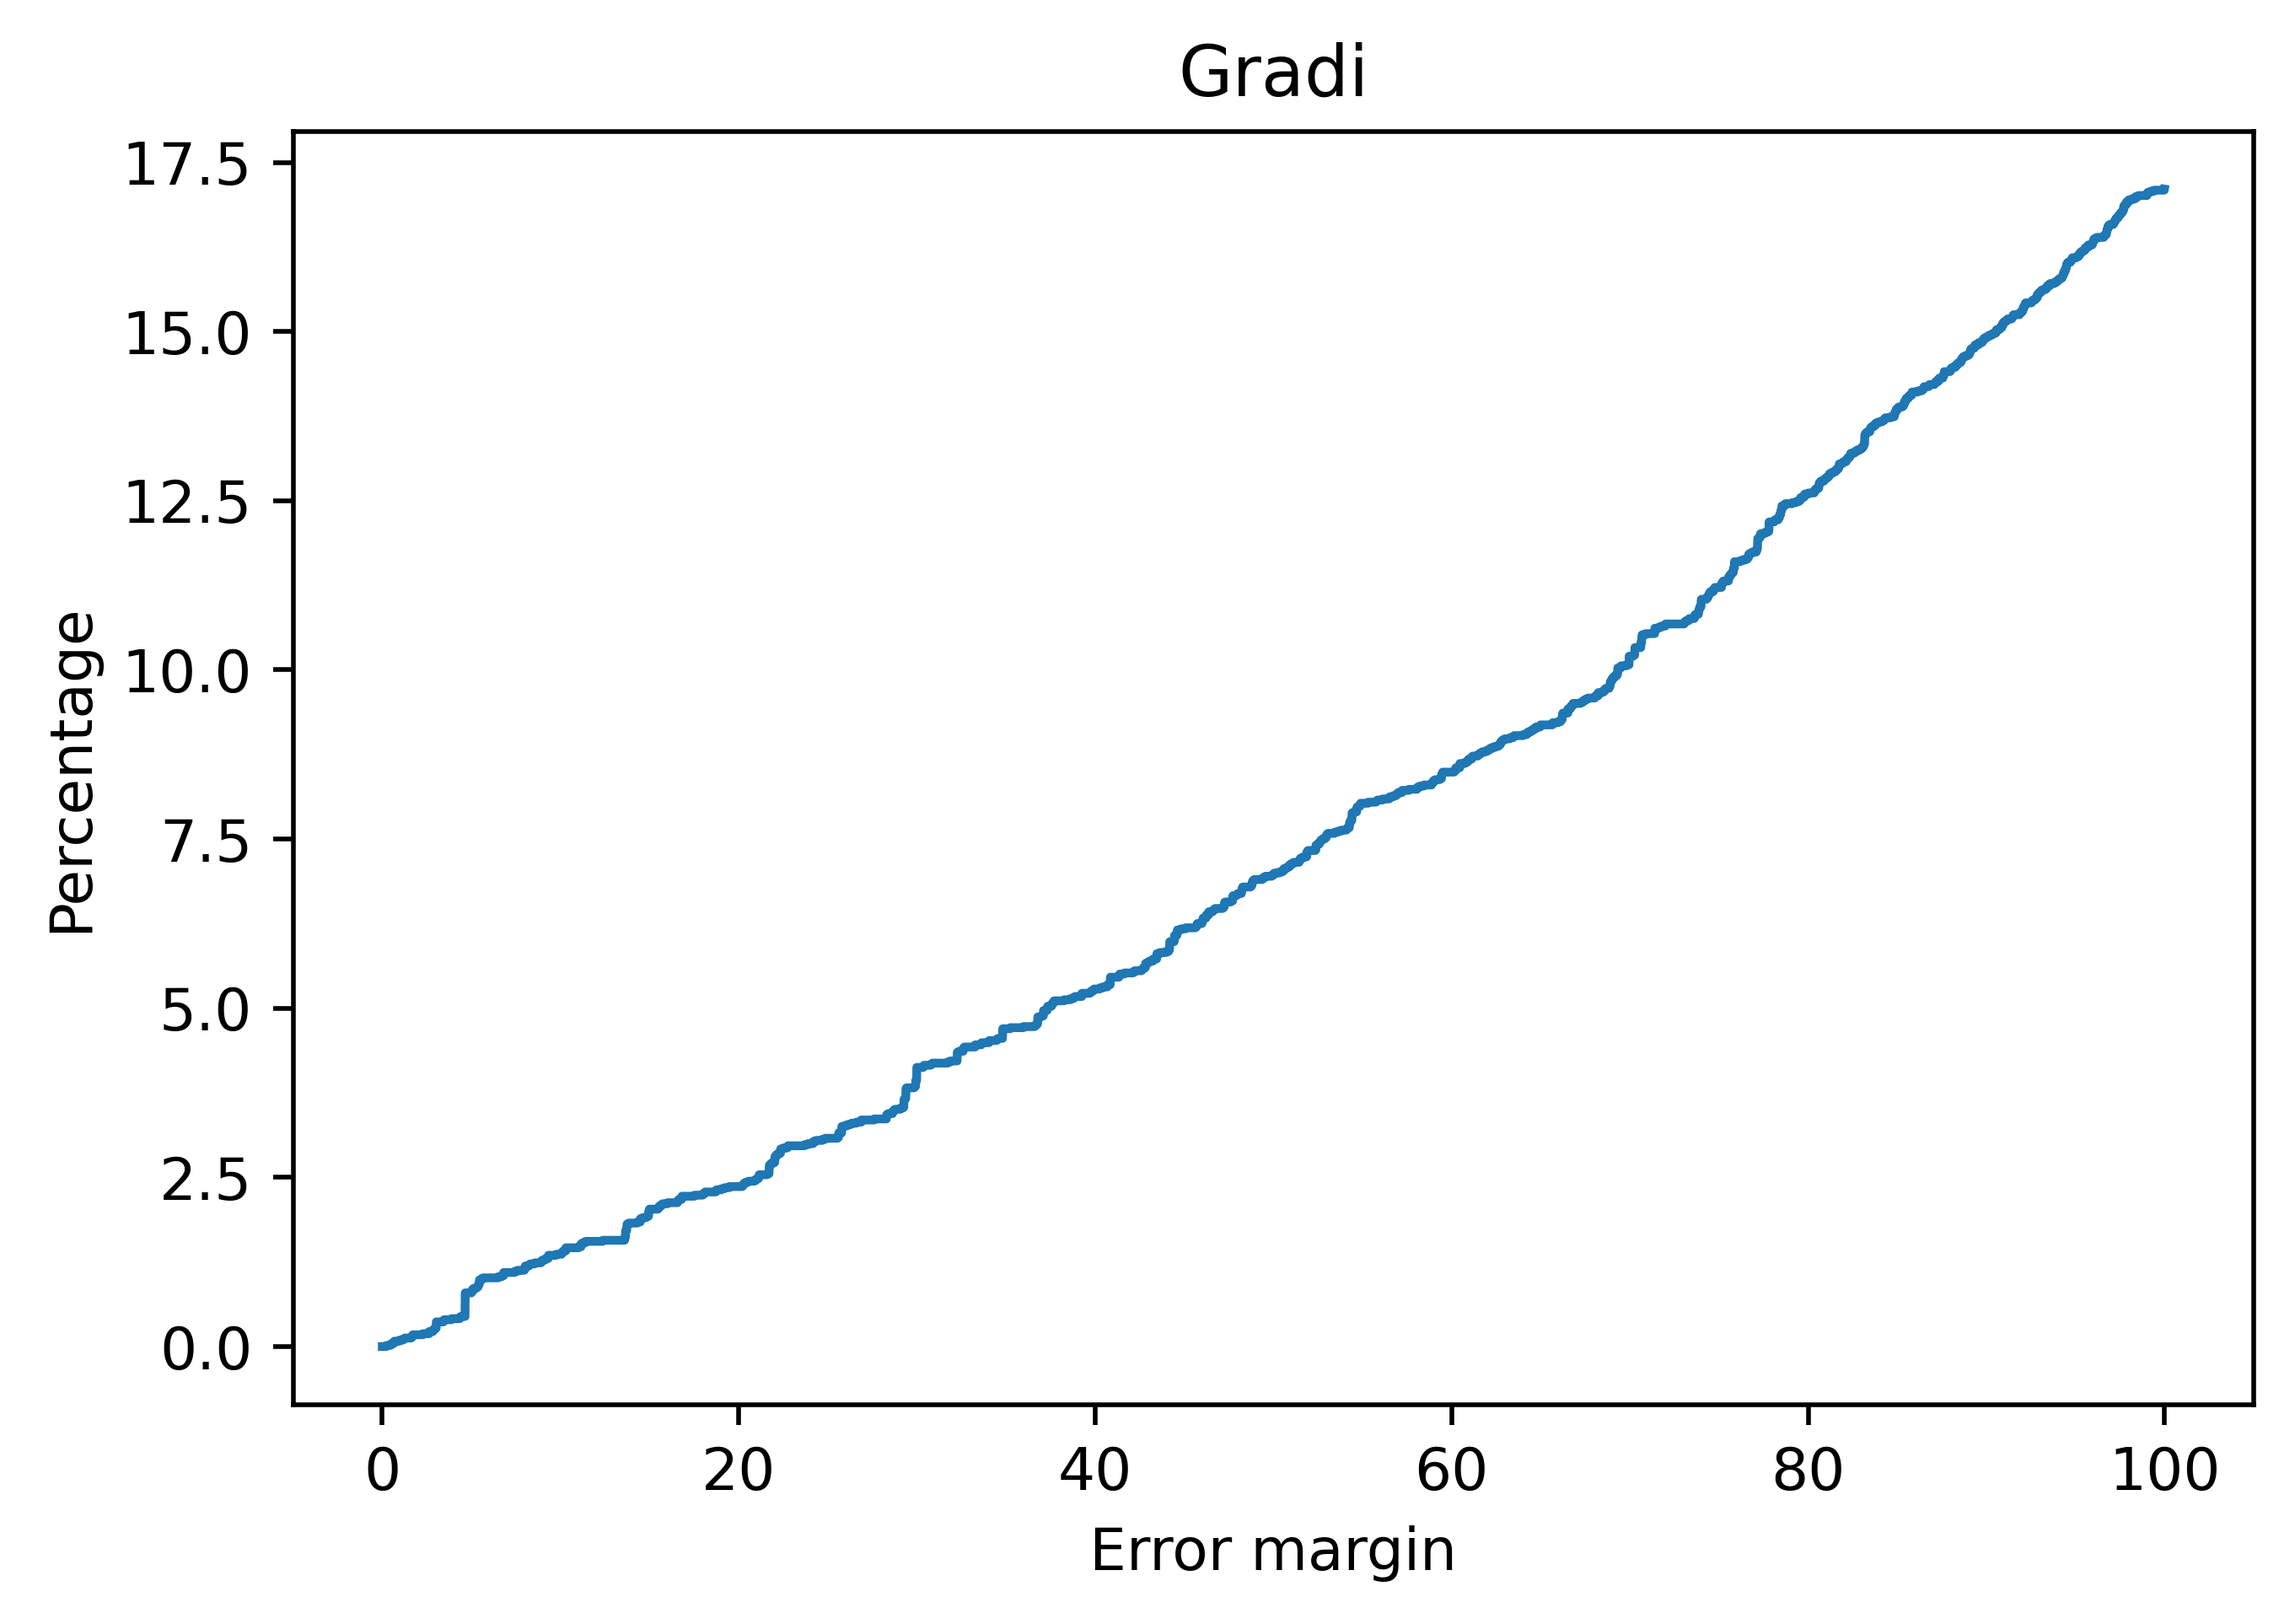

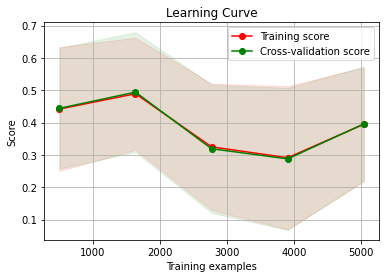

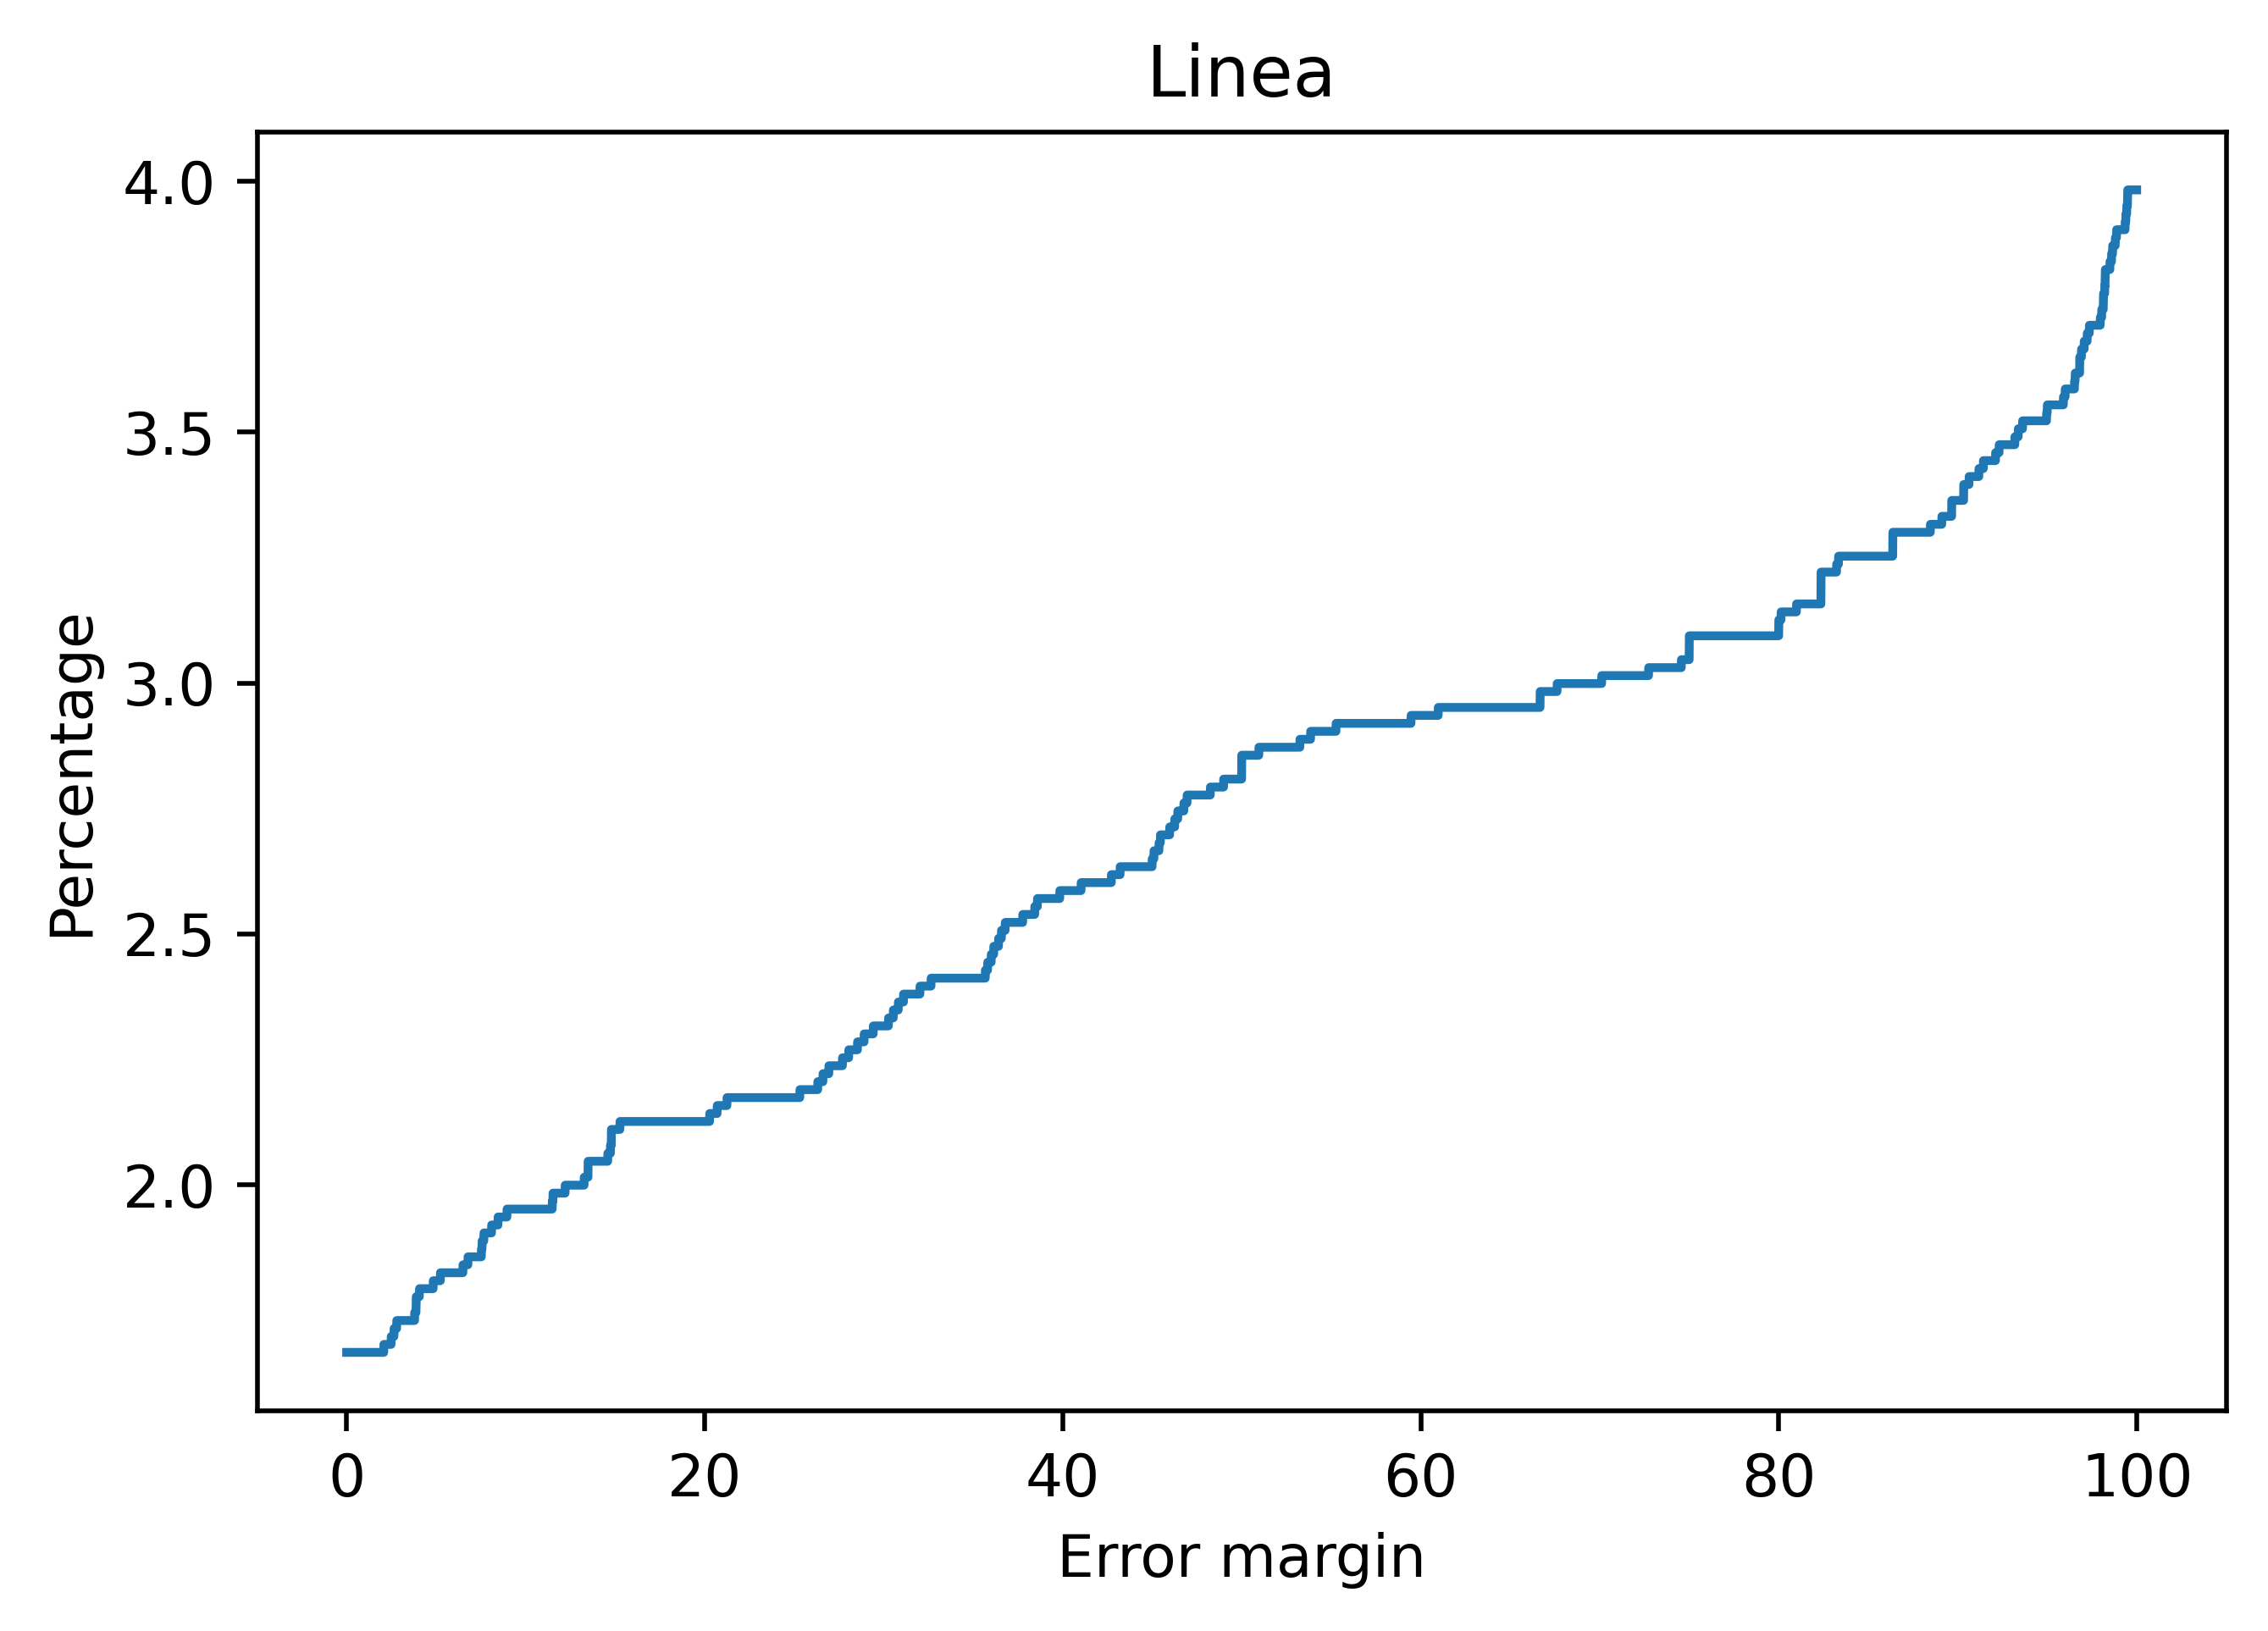

In [56]:
for model in models.items():
    s = str(model[0])
    print((str(model[0]))[:19])
    print(type(s))
    #print(s[:6])
    run_model(model[1],ApplePyt4,metrics['f1_score'])

In [3]:
WindowsPhoneUsers = pd.read_csv("WindowsPhoneUsers.csv")
AppleUsers = pd.read_csv("AppleUsers.csv")
AndroidUsers = pd.read_csv("AndroidUsers.csv")
WindowsPhonePosts = pd.read_csv("WindowsPhonePosts.csv")
ApplePosts = pd.read_csv("ApplePosts.csv")
AndroidPosts = pd.read_csv("AndroidPosts.csv")
WindowsPhonePostLinks = pd.read_csv("WindowsPhonePostLinks.csv")
ApplePostLinks = pd.read_csv("ApplePostLinks.csv")
AndroidPostLinks = pd.read_csv("AndroidPostLinks.csv")
WindowsPhoneComments = pd.read_csv("WindowsPhoneComments.csv")
AppleComments = pd.read_csv("AppleComments.csv")
AndroidComments = pd.read_csv("AndroidComments.csv")

In [4]:
def usr_count(df):
    return df.size
def posts_count(df):
    return df.size
def comms_count(df):
    return df.size
def plinks_count(df):
    return df.size

In [8]:
pd.DataFrame({'OS':['WindowsPhone','Apple','Android'],'users':[usr_count(WindowsPhoneUsers),usr_count(AppleUsers),usr_count(AndroidUsers)],'posts':[posts_count(WindowsPhonePosts),posts_count(ApplePosts),posts_count(AndroidPosts)],'comments':[comms_count(WindowsPhoneComments),comms_count(AppleComments),comms_count(AndroidComments)],'post links':[plinks_count(WindowsPhonePostLinks),plinks_count(ApplePostLinks),plinks_count(AndroidPostLinks)]})

,OS,users,posts,comments,post links
0,WindowsPhone,216580,184932,75744,4865
1,Apple,4096144,6277722,3106608,172235
2,Android,3124927,2682108,1304624,138400
